# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Command to display values up to 2 decimal places
pd.set_option("display.float_format", lambda x: "%.4f" % x) 

# Command to prevent the printing of warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [4]:
data = pd.read_csv("used_device_data.csv")

# makin g a copy of the data
df = data.copy()

## Data Overview

- Observations
- Sanity checks

In [5]:
# examining the first 5 rows of the data

df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android      14.5000  yes   no         13.0000   
1      Honor  Android      17.3000  yes  yes         13.0000   
2      Honor  Android      16.6900  yes  yes         13.0000   
3      Honor  Android      25.5000  yes  yes         13.0000   
4      Honor  Android      15.3200  yes   no         13.0000   

   selfie_camera_mp  int_memory    ram   battery   weight  release_year  \
0            5.0000     64.0000 3.0000 3020.0000 146.0000          2020   
1           16.0000    128.0000 8.0000 4300.0000 213.0000          2020   
2            8.0000    128.0000 8.0000 4200.0000 213.0000          2020   
3            8.0000     64.0000 6.0000 7250.0000 480.0000          2020   
4            8.0000     64.0000 3.0000 5000.0000 185.0000          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127                 4.3076                4.7151  
1        325                 5.1621                5.5190  
2        162                 5.1111                5.8846  
3        345                 5.1354                5.6310  
4        293                 4.3900                4.9478

In [6]:
# examining the last 5 rows of the data
df.tail()

brand_name       os  screen_size   4g  5g  main_camera_mp  \
3449       Asus  Android      15.3400  yes  no             NaN   
3450       Asus  Android      15.2400  yes  no         13.0000   
3451    Alcatel  Android      15.8000  yes  no         13.0000   
3452    Alcatel  Android      15.8000  yes  no         13.0000   
3453    Alcatel  Android      12.8300  yes  no         13.0000   

      selfie_camera_mp  int_memory    ram   battery   weight  release_year  \
3449            8.0000     64.0000 6.0000 5000.0000 190.0000          2019   
3450            8.0000    128.0000 8.0000 4000.0000 200.0000          2018   
3451            5.0000     32.0000 3.0000 4000.0000 165.0000          2020   
3452            5.0000     32.0000 2.0000 4000.0000 160.0000          2020   
3453            5.0000     16.0000 2.0000 4000.0000 168.0000          2020   

      days_used  normalized_used_price  normalized_new_price  
3449        232                 4.4923                6.4839  
3450        541                 5.0377                6.2515  
3451        201                 4.3573                4.5288  
3452        149                 4.3498                4.6242  
3453        176                 4.1321                4.2800

#### Observations

The dataset loaded properly

In [7]:
# checking the number of rows and columns
df.shape

(3454, 15)

#### Observations

*  There are 3454 rows and 15 columns (attributes) in the dataset

In [8]:
# checking the datatypes in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

##### Observations

*  There are 4 non-numeric data types
*  There are 11 numeric data types - 9 float and 2 integer
*  The target variable (dependent variable), normalized_used_price, is type float

In [9]:
#  checking the statistical summary of the data

df.describe(include = "all").T

count unique      top  freq      mean       std  \
brand_name                 3454     34   Others   502       NaN       NaN   
os                         3454      4  Android  3214       NaN       NaN   
screen_size           3454.0000    NaN      NaN   NaN   13.7131    3.8053   
4g                         3454      2      yes  2335       NaN       NaN   
5g                         3454      2       no  3302       NaN       NaN   
main_camera_mp        3275.0000    NaN      NaN   NaN    9.4602    4.8155   
selfie_camera_mp      3452.0000    NaN      NaN   NaN    6.5542    6.9704   
int_memory            3450.0000    NaN      NaN   NaN   54.5731   84.9724   
ram                   3450.0000    NaN      NaN   NaN    4.0361    1.3651   
battery               3448.0000    NaN      NaN   NaN 3133.4027 1299.6828   
weight                3447.0000    NaN      NaN   NaN  182.7519   88.4132   
release_year          3454.0000    NaN      NaN   NaN 2015.9653    2.2985   
days_used             3454.0000    NaN      NaN   NaN  674.8697  248.5802   
normalized_used_price 3454.0000    NaN      NaN   NaN    4.3647    0.5889   
normalized_new_price  3454.0000    NaN      NaN   NaN    5.2331    0.6836   

                            min       25%       50%       75%       max  
brand_name                  NaN       NaN       NaN       NaN       NaN  
os                          NaN       NaN       NaN       NaN       NaN  
screen_size              5.0800   12.7000   12.8300   15.3400   30.7100  
4g                          NaN       NaN       NaN       NaN       NaN  
5g                          NaN       NaN       NaN       NaN       NaN  
main_camera_mp           0.0800    5.0000    8.0000   13.0000   48.0000  
selfie_camera_mp         0.0000    2.0000    5.0000    8.0000   32.0000  
int_memory               0.0100   16.0000   32.0000   64.0000 1024.0000  
ram                      0.0200    4.0000    4.0000    4.0000   12.0000  
battery                500.0000 2100.0000 3000.0000 4000.0000 9720.0000  
weight                  69.0000  142.0000  160.0000  185.0000  855.0000  
release_year          2013.0000 2014.0000 2015.5000 2018.0000 2020.0000  
days_used               91.0000  533.5000  690.5000  868.7500 1094.0000  
normalized_used_price    1.5369    4.0339    4.4051    4.7557    6.6194  
normalized_new_price     2.9014    4.7903    5.2459    5.6737    7.8478

##### Observations
1.  The most common brand name is "Others", with 502 devices
1.  The most common operating system in the dataset is Android, with 3214 of the 3454 devices being Android
1.  The average screen size is 13.7 cm.  The smallest screen size is 5.08cm and the largets is 30.71cm
1.  There are 2335 4G devices
1.  3302 of the devices are not 5G
1.  The mean main camera size in megapixels is 9.46.  There appears to be skewness to the right in this variable.  There also appears to be missing data.  The minimum main camera size is 0.08, this needs further investigation. 
1.  The mean selfie camera size is 6.55 megapixels.  This variable also appears to be skewed to the right.  There also appears to be missing data.  The minimum selfie camera size is 0.  This need to be further explored as it could mean there was no selfie camera or an error in data entry.  
1.  The mean internal memory size is 54.57GB with skewness to the right.  It is noted that the minimum internal memory size is 0.01, this also need further investigation
1.  The mean RAM size is 4.03.  The minimum RAM is 0.02, this also needs further investigation
1.  The mean battery size is 3133.40.  There appears to be missing data
1.  The mean weight is 182.75.  This variable appears to be skewed to the right amd data appears to be missing
1.  The mean release year is 2015.  The devices in the dataset are from 2013 to 2020
1.  The mean number of days used is 675 days.  The dataset contains devices which was used from 91 to 1094 days. 
1.  The mean normalizedd used price is 4.36, with a minimum of 1.53 and a maximum of 6.61
1.  The mean normalized new price is 5.23, with a minimum of 2.90 and a maximum of 7.84 

Furhter investigations are needed for main_camera_mp, selfie_camera_mp, int_memory and RAM

In [10]:
#  checking for duplicated values

In [11]:
df.duplicated().sum()

0

#### Observations
*  There are no duplicated data

In [12]:
#  checking for missing data

df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

##### Observations
1.  There are missing values in the dataset in the followwing variables: main_camera_mp (179), selfie_camera_mp (2), int_memory (4), ram (4), battery (6) and weight (7).

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:
*The analysis for these questions can be found in the code below under univariate and bivariabe analysis.*
1. What does the distribution of normalized used device prices look like?
>The normalized used prices have a normal distribution with slight skeweness to the right
3. What percentage of the used device market is dominated by Android devices?
>The percentage of Android devices in the used market is 93.052 %, as represented by the sample dataset
4. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
>Most of the brands had very little variation in the RAM sizes compared to the other brands.  OnePlus devices was above average in RAM i.e 4GB and more.  Celkon devices was below average in RAM ie.e 4gb and less.  Most of the nokia devices was 4gb and below in RAM. As RAM size increases, the normalized_used_price also increases, this is generally the case for normalized_new_price, except for ram size 1.5GB 
5. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
>There are 241 devices with large batteries i.e. battries greater than 4500 mAh.  The weight for the large batteries devices is multi-modal and right skewed, with an average of 300 grams.  The weight ranges from approxs 125g to 870g.  Samsung have the largest range in weight for the large battery devices. Acatel, Google, HTC, Micromax, Nokia, Panasonic, Spice and Oppo have the least variation in weight.  From the scatter plot and heat map we can see there is a positive correlation between battery and weight
6. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
>There are 1099 out of 3454 devices with a screen size greater than 6cm, that is approx 32% of the devices.  Huawei (13.6%), Samsung (10.8%) and Others (9%).  Microsoft (0.01%), Spice (0.2%) and Panasonic (0.2%) have the smallest
7. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
>There are 655 out of 3454 devices with a selfie camera size greater than 8 mega pixels, i.e. approx 19% of the devices.  Huawei (13.3%), Vivo (11.9%) and Oppo (11.5%) have the largest selfie camera sizes.  Acer (0.2%), Panasonic (0.3%), Micromax (0.3%) and Blackberry (0.3%) have the smallest selfie camera sizes
8. Which attributes are highly correlated with the normalized price of a used device?
>Following the general guidelines for assessing the degree of correlation provided in the project AI help:
> normalized_new_price: has a strong correlation (0.83) and both main_camera_mp (0.54) and ram (0.53) have moderate correaltions
> normalized_used_price: has a strong correlations with normalized_new_price (0.83), screen_size(0.61), selfie_camera_mp (0.61) and battery (0.61).  There is moderate correaltions with main_camera_mp (0.59), ram (0.52) and release_year (0.51)

## Univariate Analysis

In [13]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### brand_name

In [15]:
# finding out the number of unique brands in the dataset

df["brand_name"].nunique()

34

##### Observations
1.  There are 34 different brands in the dataset

In [16]:
#  calculating the number of devices for each brand in the dataset

df["brand_name"].value_counts().sort_values(ascending=True)

Infinix        10
Google         15
Microsoft      22
BlackBerry     22
Coolpad        22
OnePlus        22
Karbonn        29
Spice          30
Celkon         33
Lava           36
Apple          39
Realme         41
Panasonic      47
XOLO           49
Acer           51
Gionee         56
Meizu          62
Sony           86
Nokia         106
Motorola      106
HTC           110
Honor         116
Vivo          117
Micromax      117
Alcatel       121
Asus          122
Oppo          129
Xiaomi        132
ZTE           140
Lenovo        171
LG            201
Huawei        251
Samsung       341
Others        502
Name: brand_name, dtype: int64

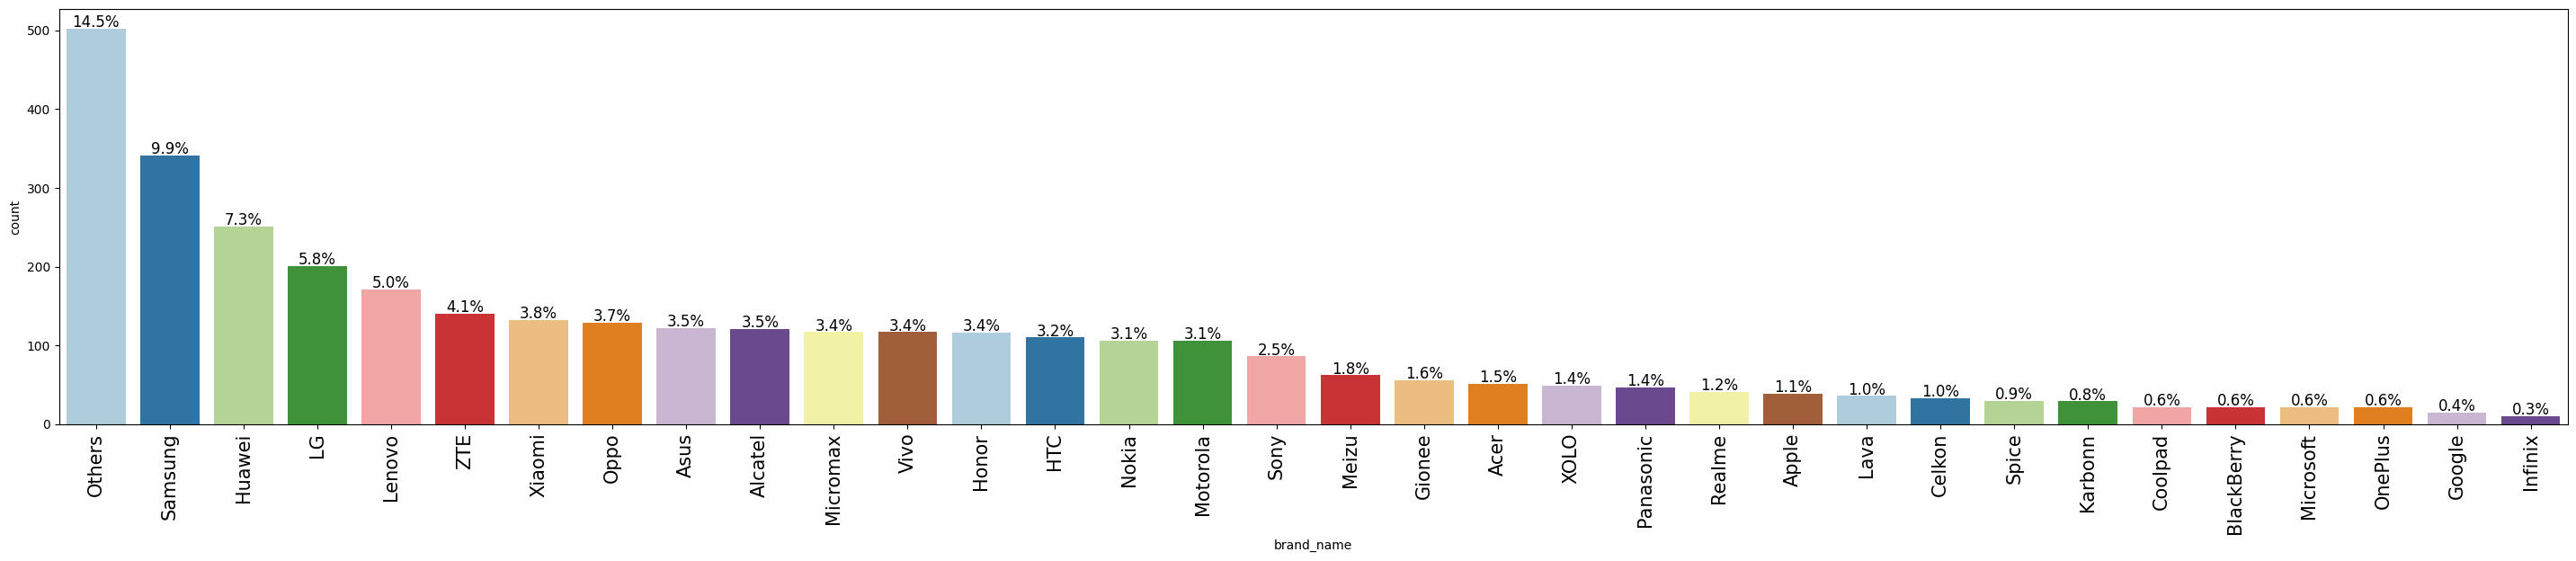

In [17]:
# checking the percentage of devices in each brand in the dataset
labeled_barplot(df, "brand_name", perc=True)

#### Observations
1.  There are 34 unique brand names
1.  The "Others" brand_name have the most devices from the dataset
1.  Samsung is the most popular brand with 341 devices
1.  Infinix is the least popular with 10 devices

### os

In [18]:
# checking the numer of unique operating systems
df["os"].nunique()

4

In [19]:
#  checking the number of devices in each os type

df["os"].value_counts()

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

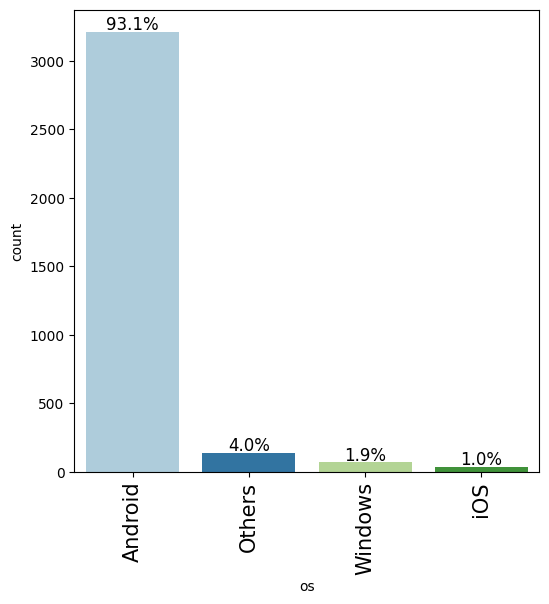

In [20]:
labeled_barplot(df, "os", perc=True)

In [21]:
#  checking the percentage of Android devices in the dataset
percentage_android = (df[df["os"] == "Android"].shape[0]/df.shape[0]) * 100
print ("The percentage of Android devices in the dataset is", round (percentage_android, 3), "%")

The percentage of Android devices in the dataset is 93.052 %


##### Description
1.  There are 4 unique os types, Android, Others, Windows, iOS
1.  Android is by far the most popular in the dataset.  with 3214 of the 3454 devices having an Android operating system.
1.  The others catogery is the second largest with 137 of the remaining 240 devices.
1.  The least amount of devices are  those with iOS 

### screen_size

In [22]:
df["screen_size"].nunique()

142

In [23]:
df["screen_size"].value_counts(ascending=False).reset_index()

index  screen_size
0   12.7000          575
1   12.8300          409
2   10.2900          219
3   10.1600          188
4   15.2400          129
..      ...          ...
137 17.4000            1
138 15.8200            1
139 14.5300            1
140 16.1500            1
141 14.8100            1

[142 rows x 2 columns]

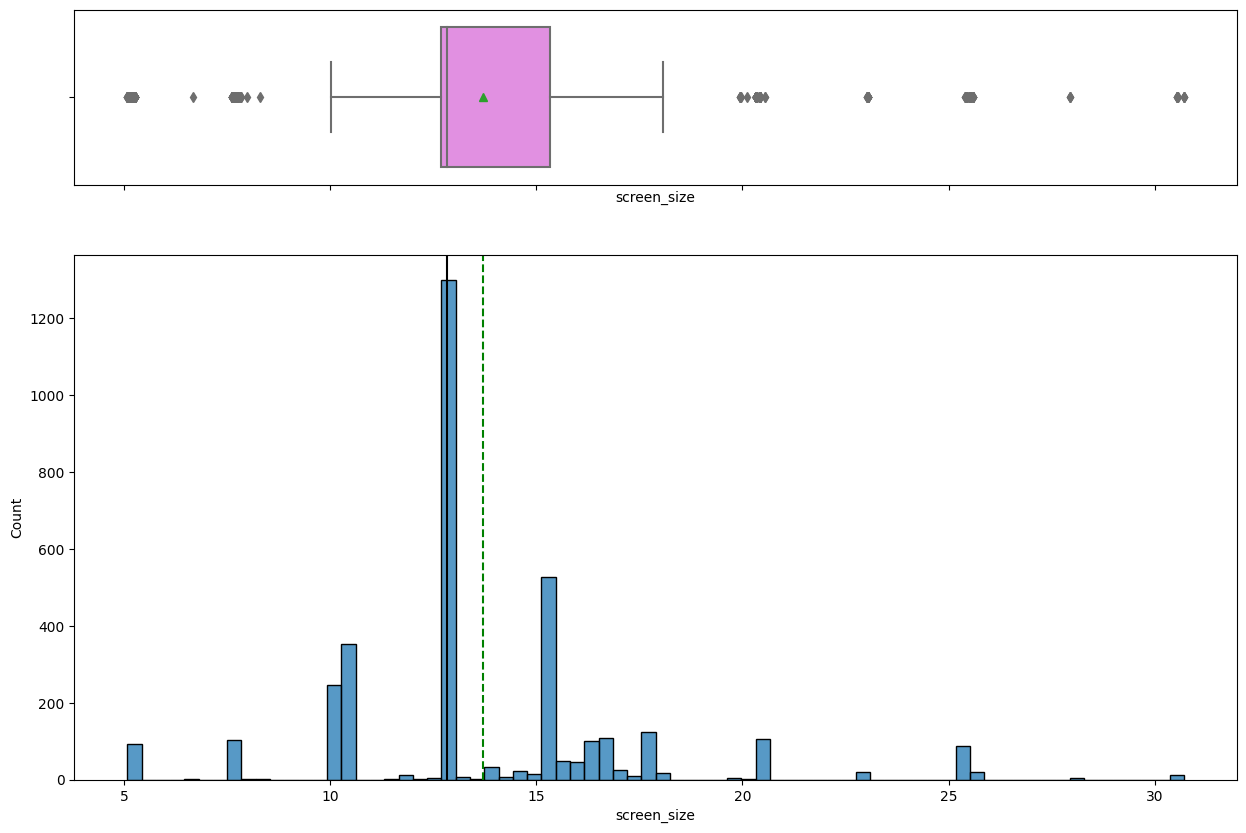

In [24]:
histogram_boxplot(df, "screen_size")

##### Observations
1.  There are 142 unique screen sizes
1.  Screen size of 12.7 cm have the most amount of devices (575 out of 3454), followed by a screen size of 12.83 cm (409 devices)
1.  The least popular  screen sizes are the bigger and smaller screen sizes.  
1.  There are outliers for the larger and smaller screen sizes. 

#### 4g

In [25]:
df["4g"].nunique()

2

In [26]:
df["4g"].value_counts()

yes    2335
no     1119
Name: 4g, dtype: int64

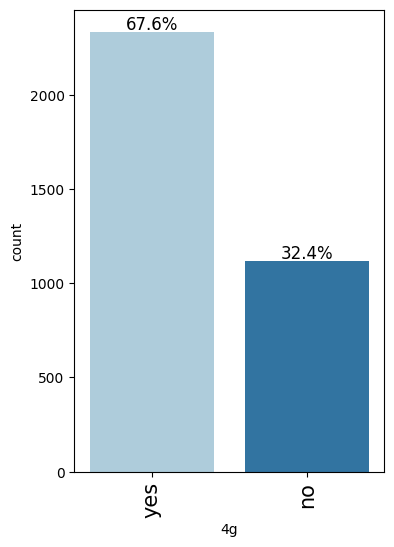

In [27]:
labeled_barplot(df, "4g", perc=True)

##### Observations

1.  There are about twice as many devices with 4g than those without 4g  (2335 devices have 4g)

5g

In [28]:
df["5g"].nunique()

2

In [29]:
df["5g"].value_counts()

no     3302
yes     152
Name: 5g, dtype: int64

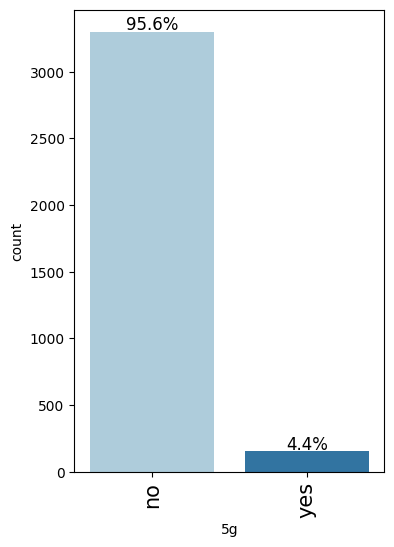

In [30]:
labeled_barplot(df, "5g", perc=True)

##### Observations

1.  The majority of devices are 5G.  3302 out of 3454 devices are 5G.  

The results of the 4g and 5g devices indicates that some devices are both 4g and 5g

### main_camera_mp

In [31]:
df["main_camera_mp"].nunique()

41

In [32]:
df["main_camera_mp"].value_counts().reset_index()

index  main_camera_mp
0  13.0000            1035
1   8.0000             755
2   5.0000             546
3  12.0000             189
4   2.0000             171
5  16.0000             154
6   3.1500             122
7   0.3000              69
8  10.5000              30
9   1.3000              26
10 23.0000              19
11 21.0000              19
12 20.7000              16
13 20.0000              13
14 14.5000              13
15 12.2000              12
16  4.0000              10
17 12.3000               9
18 19.0000               8
19  8.1000               7
20 13.1000               6
21 10.0000               6
22 24.0000               5
23  3.0000               5
24 12.5000               4
25 48.0000               4
26  6.5000               4
27  6.7000               4
28 21.2000               2
29 21.5000               1
30  1.2000               1
31 16.3000               1
32 22.6000               1
33 18.0000               1
34 12.6000               1
35 20.1000               1
36 41.0000               1
37 20.2000               1
38  1.0000               1
39  0.0800               1
40 22.5000               1

In [33]:
# calcualting the number of devices with a main_camera_mp of less than 1 megapixels
df[df['main_camera_mp']<1].sort_values("release_year").reset_index()

index brand_name       os  screen_size   4g  5g  main_camera_mp  \
0     613     Others  Android      17.7800   no  no          0.3000   
1     467       Acer  Android      17.7800   no  no          0.3000   
2     466       Acer  Android      17.7800   no  no          0.3000   
3     615     Others  Android      17.7800   no  no          0.3000   
4     414    Alcatel  Android      17.7800   no  no          0.3000   
..    ...        ...      ...          ...  ...  ..             ...   
65    112      Nokia  Android      13.8400  yes  no          0.3000   
66    111      Nokia  Android      13.8400  yes  no          0.3000   
67    110      Nokia  Android      16.5600  yes  no          0.3000   
68    329      Nokia  Android      16.5600  yes  no          0.3000   
69    330      Nokia  Android      13.8400  yes  no          0.3000   

    selfie_camera_mp  int_memory    ram   battery   weight  release_year  \
0             0.3000     32.0000 4.0000 3000.0000 282.0000          2013   
1             0.3000     32.0000 4.0000 2710.0000 320.0000          2013   
2             0.3000     32.0000 4.0000 2640.0000 339.9000          2013   
3             0.3000     32.0000 4.0000 3000.0000 289.0000          2013   
4             0.3000      4.0000 1.0000 3240.0000 350.0000          2013   
..               ...         ...    ...       ...      ...           ...   
65            5.0000     16.0000 2.0000 3000.0000 180.0000          2020   
66            5.0000     16.0000 2.0000 3000.0000 180.0000          2020   
67            8.0000     64.0000 3.0000 4000.0000 200.0000          2020   
68            8.0000     64.0000 3.0000 4000.0000 200.0000          2020   
69            5.0000     16.0000 2.0000 3000.0000 180.0000          2020   

    days_used  normalized_used_price  normalized_new_price  
0         571                 3.8807                4.2426  
1         592                 4.2920                4.5959  
2         558                 4.1260                4.7099  
3         578                 4.1980                4.3953  
4         737                 4.1242                4.6099  
..        ...                    ...                   ...  
65        356                 4.0554                4.5920  
66        193                 3.6163                4.1002  
67        310                 4.1860                5.0049  
68        296                 4.1608                4.9965  
69        293                 3.6906                4.0875  

[70 rows x 16 columns]

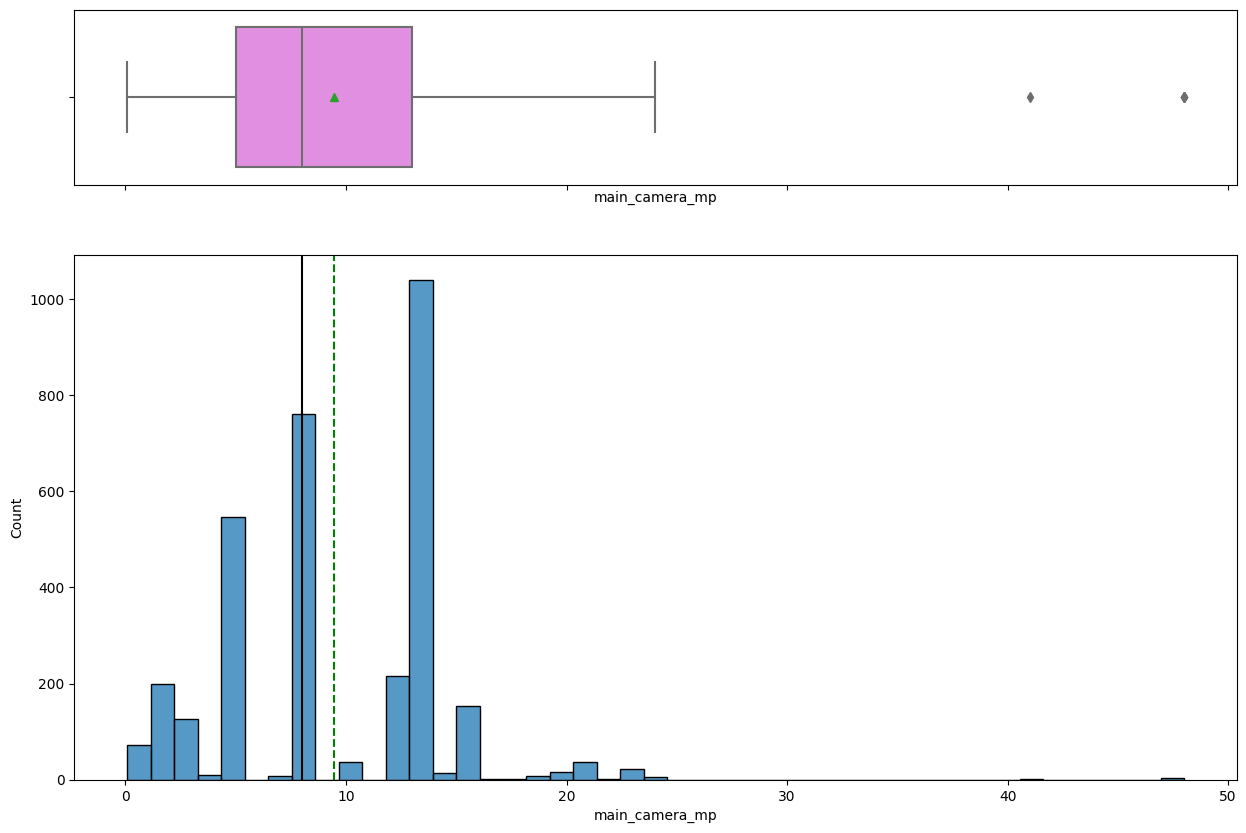

In [34]:
histogram_boxplot(df, "main_camera_mp")


##### Observations

1.  There are 41 uniques values for the main camera size
2.  Most of the camera resolutions are  less than 25mp.
3.  13mp is the most common camera resolution size (1035 devices), followed by 8mp (755), and 5mp(546)
4.  There are 70 devices with camera resolutions less than 1.  The release years for these cameras are from 2013 - 2020 (both old and new devices).  
5.  There are outliers


### selfie_camera_mp

In [35]:
df["selfie_camera_mp"].nunique()

37

In [36]:
df["selfie_camera_mp"].value_counts().sort_values(ascending=False).reset_index()

index  selfie_camera_mp
0   5.0000               791
1   8.0000               549
2   2.0000               538
3   0.3000               492
4  16.0000               298
5   1.3000               148
6  32.0000                94
7  13.0000                90
8  20.0000                67
9   1.2000                43
10  0.0000                39
11  2.1000                37
12  1.0000                34
13  1.6000                31
14 24.0000                30
15 25.0000                28
16 12.0000                21
17  7.0000                21
18  4.0000                20
19  1.9000                12
20  2.2000                11
21 10.0000                10
22  5.1000                 9
23  3.0000                 7
24 14.5000                 5
25  1.1000                 5
26  9.0000                 4
27  3.7000                 3
28 14.0000                 3
29  0.6500                 2
30 18.0000                 2
31  1.2500                 2
32 10.5000                 2
33 16.3000                 1
34  0.9000                 1
35  3.5000                 1
36  1.8000                 1

In [37]:
# calcualting the number of devices with a selfie_camera_mp of less than 1 megapixels
df[df["selfie_camera_mp"]<1].sort_values("release_year").reset_index()

index brand_name       os  screen_size  4g  5g  main_camera_mp  \
0       21     Others  Android      20.3200  no  no          8.0000   
1     1618     Lenovo  Android      12.7000  no  no          8.0000   
2     1617     Lenovo  Android      10.2900  no  no          5.0000   
3     1616     Lenovo  Android      12.8300  no  no          5.0000   
4     1609     Lenovo  Android      10.3400  no  no          8.0000   
..     ...        ...      ...          ...  ..  ..             ...   
529    116      Nokia   Others       5.1800  no  no          0.3000   
530    332      Nokia   Others       5.1800  no  no          0.3000   
531    333      Nokia   Others       5.1800  no  no          0.3000   
532    335      Nokia   Others       5.1800  no  no          0.3000   
533    113      Nokia   Others       5.1800  no  no          0.3000   

     selfie_camera_mp  int_memory    ram   battery   weight  release_year  \
0              0.3000     16.0000 1.0000 5680.0000 453.6000          2013   
1              0.3000     16.0000 4.0000 4000.0000 176.0000          2013   
2              0.3000     16.0000 4.0000 2000.0000 130.0000          2013   
3              0.3000     16.0000 4.0000 2250.0000 184.0000          2013   
4              0.3000     32.0000 4.0000 2000.0000 126.0000          2013   
..                ...         ...    ...       ...      ...           ...   
529            0.0000      0.0600 0.0200 1200.0000  88.2000          2020   
530            0.0000      0.0600 0.0300 1020.0000  90.5000          2020   
531            0.0000      0.1000 0.0300 1020.0000  91.3000          2020   
532            0.0000      0.1000    NaN 1200.0000  88.2000          2020   
533            0.0000      0.1000 0.0300 1020.0000  90.5000          2020   

     days_used  normalized_used_price  normalized_new_price  
0          933                 4.4521                5.4844  
1          630                 4.2048                5.2421  
2          944                 3.9485                5.0205  
3          582                 4.2921                5.0072  
4         1033                 4.2638                5.6045  
..         ...                    ...                   ...  
529        266                 3.3707                3.6991  
530        322                 2.5193                3.3864  
531        148                 2.5649                3.0116  
532        327                 3.0629                3.6891  
533        272                 2.9102                3.3999  

[534 rows x 16 columns]

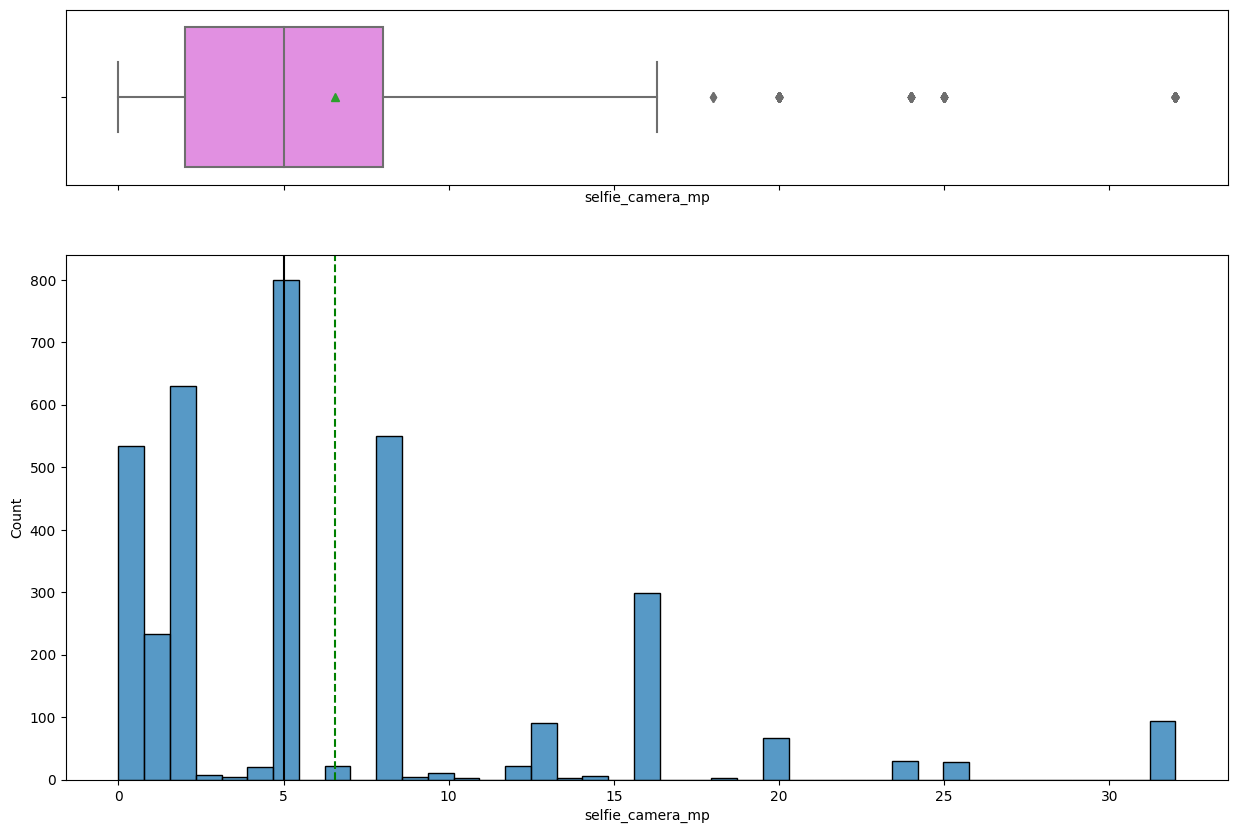

In [38]:
histogram_boxplot(df, "selfie_camera_mp")

##### Observations

1.  There are 37 unique selfie camera resolutions in the dataset
2.  The most common selfie camera resolution is 5mp with 791 cameras
3.  There are 534 devices with camera resolutions less than 1. The release years for these cameras are from 2013 - 2020 (both old and new devices).s
4.  There are outliers

### int_memory

In [39]:
df["int_memory"].nunique()

15

In [40]:
df["int_memory"].value_counts().reset_index()

index  int_memory
0    16.0000        1283
1    32.0000        1083
2    64.0000         509
3   128.0000         372
4   256.0000          86
5   512.0000          44
6     0.0600          18
7     0.1000          17
8     8.0000          12
9     4.0000          10
10 1024.0000           8
11    0.5000           4
12    0.2000           2
13   24.0000           1
14    0.0100           1

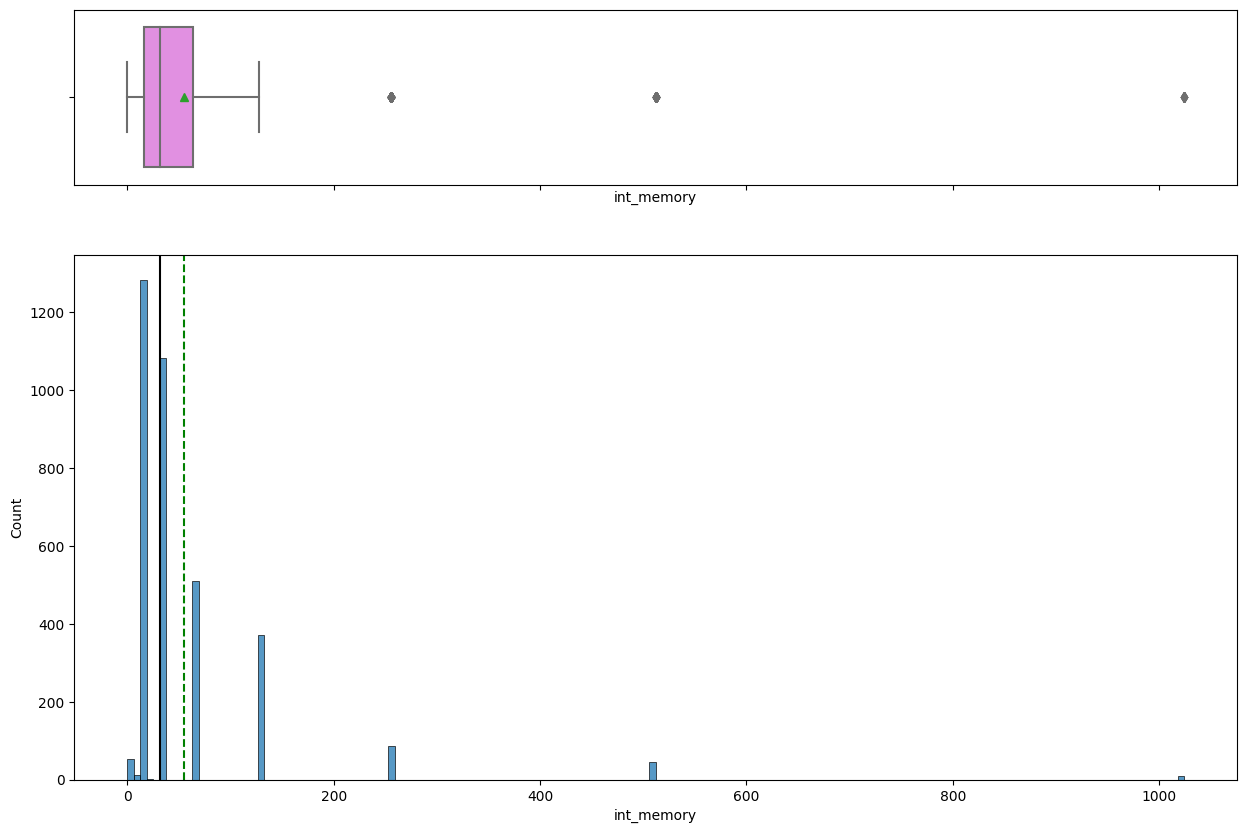

In [41]:
histogram_boxplot(df, "int_memory")

##### Observations
1.  There are 15 unique values for internal memory size
2.  The most common internal memory size is 16GB (1283 devices)
3.  The least common internal memory size is 0.01MB and 24MB with 1 device each
4.  Most of the internal momory sizes are below 200GB
5.  There are outliers
   

### ram

In [42]:
df["ram"].nunique()

12

In [43]:
df["ram"].value_counts().reset_index()

index   ram
0   4.0000  2815
1   6.0000   154
2   8.0000   130
3   2.0000    90
4   0.2500    83
5   3.0000    81
6   1.0000    34
7  12.0000    18
8   0.0200    18
9   0.0300    17
10  0.5000     9
11  1.5000     1

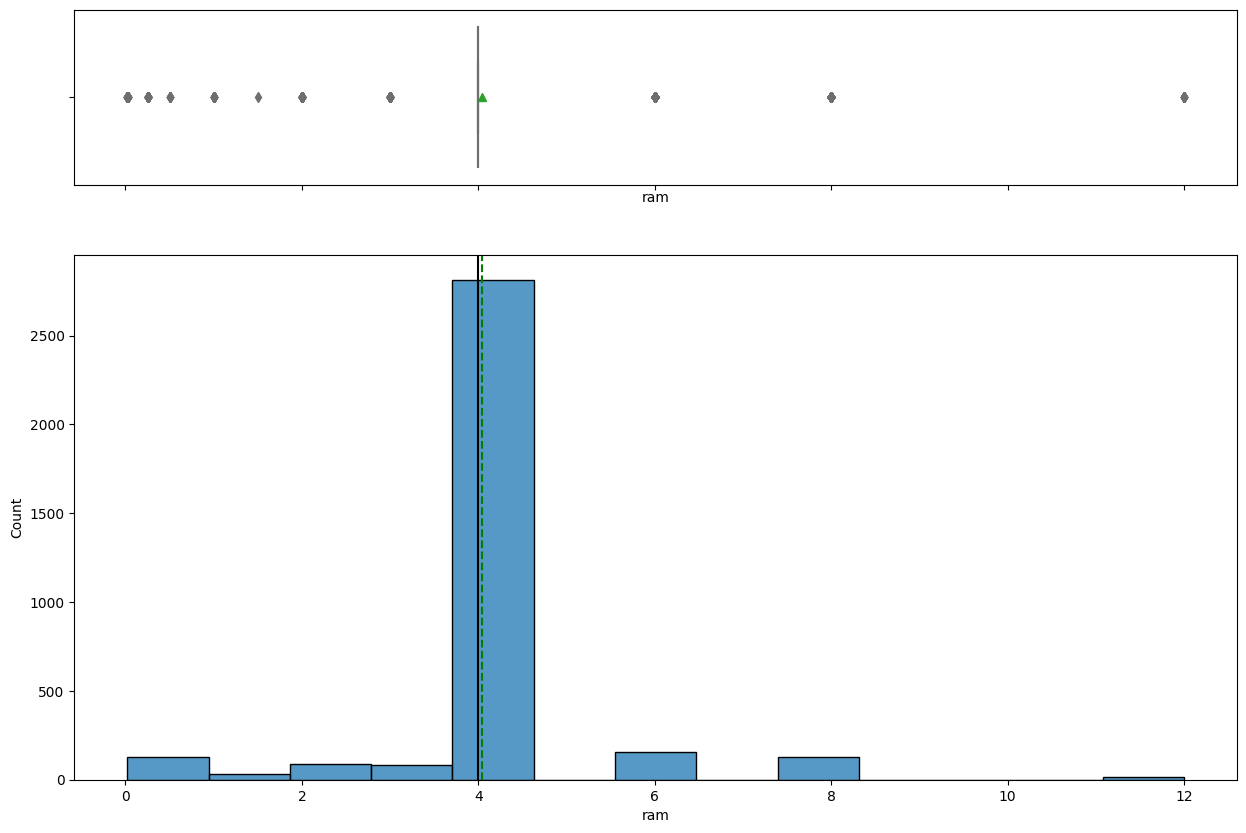

In [44]:
histogram_boxplot(df, "ram")

##### Observations
1.  The most popular RAM size is 4GB with (2815 devices)
2.  The least popular RAM size is 1.5GB with 1 device
3.  There are outliers

### battery

In [45]:
df["battery"].nunique()

324

In [46]:
df["battery"].value_counts().reset_index()

index  battery
0   4000.0000      341
1   3000.0000      314
2   2000.0000      244
3   2500.0000      137
4   2100.0000      121
..        ...      ...
319 6180.0000        1
320 4180.0000        1
321 2180.0000        1
322 2880.0000        1
323 3110.0000        1

[324 rows x 2 columns]

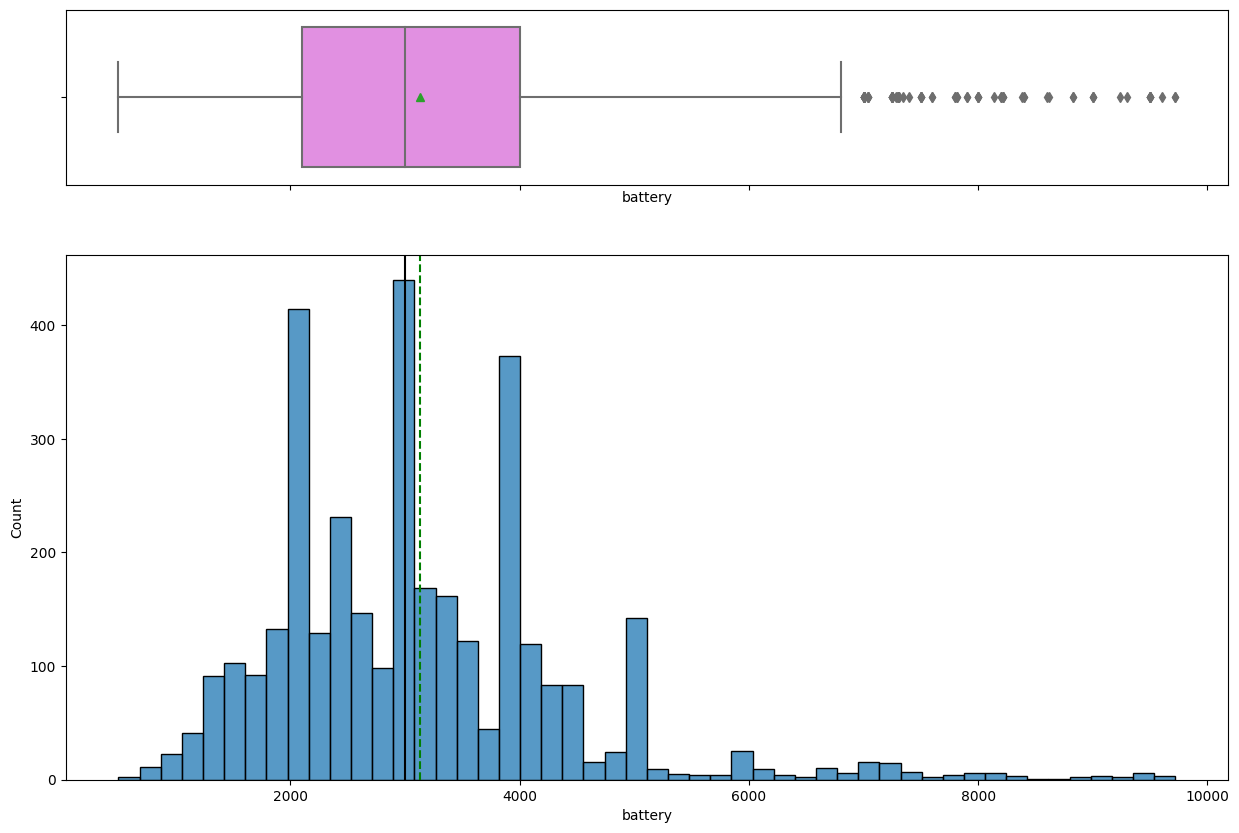

In [47]:
histogram_boxplot(df, "battery", bins=50)

##### Observations
1.  There are 324 unique values for the energy capacity of the battery
2.  4000mAh is the most popular battery energy capacity with 341 devices.
3.  The data is right skewed
4.  There are outliers

### weight

In [48]:
df["weight"].nunique()

555

In [49]:
df["weight"].value_counts().reset_index()

index  weight
0   150.0000     112
1   140.0000      86
2   160.0000      80
3   155.0000      68
4   145.0000      68
..       ...     ...
550 157.5000       1
551 372.0000       1
552 340.2000       1
553 319.8000       1
554 240.0000       1

[555 rows x 2 columns]

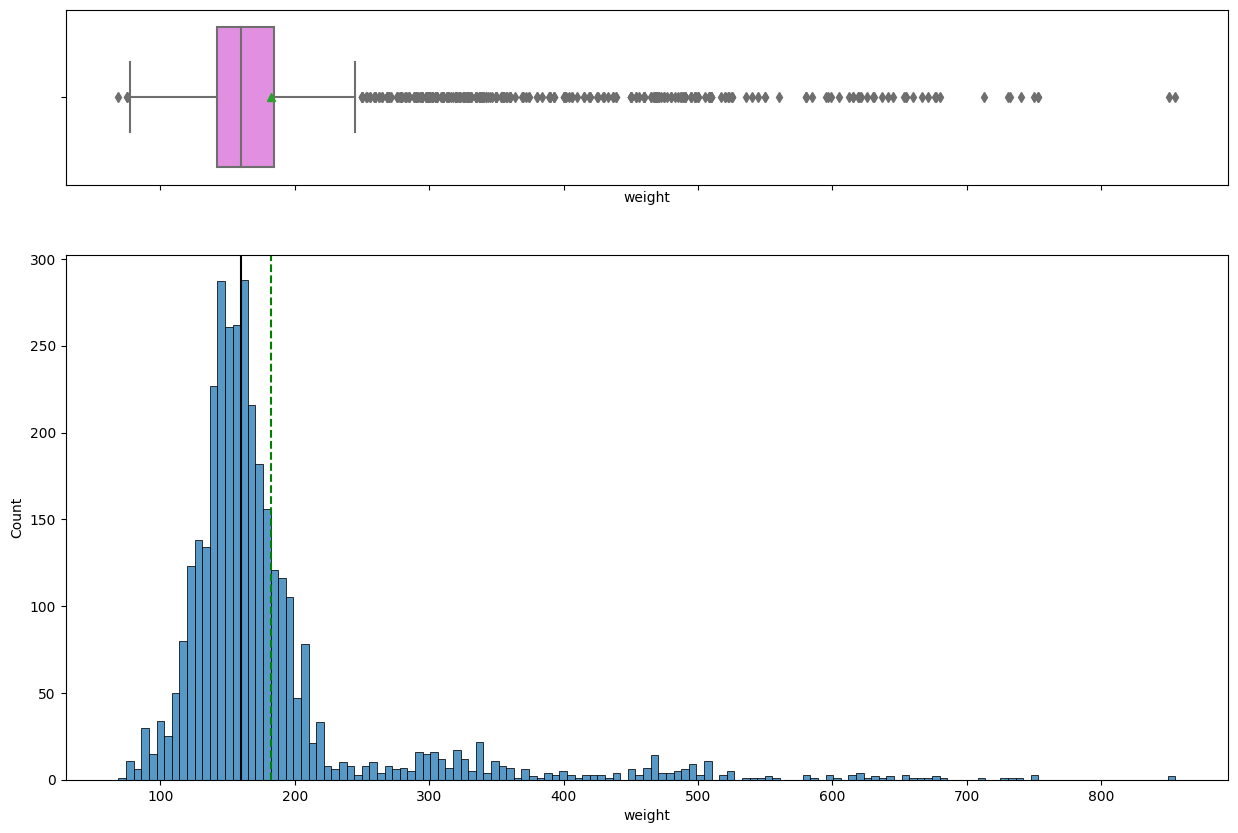

In [50]:
histogram_boxplot(df, "weight")

##### Observations
1.  There are 555 unique weight values
2.  The data set is normally distributed and right skewed.
3.  The most common weights are 150, 140, 160, with 122, 86 and 80 devices respectively
4.  Most of the devices fals between 100 to 200 grams
5.  There are oultiers


### release_year

In [51]:
df["release_year"].nunique()

8

In [52]:
df["release_year"].value_counts().reset_index()

index  release_year
0   2014           642
1   2013           570
2   2015           515
3   2019           446
4   2016           383
5   2018           322
6   2017           299
7   2020           277

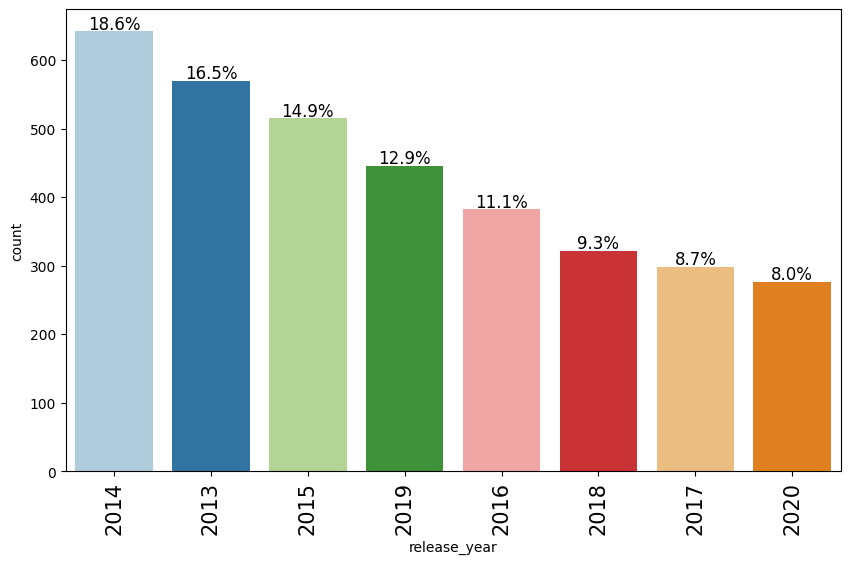

In [53]:
labeled_barplot(df, "release_year", perc=True)

##### Observations

1.  There are 8 unique release years in the dataset
2.  The most common release year is 2014 with 642 devices, the least common is 2020 with 277 devices

### days_used

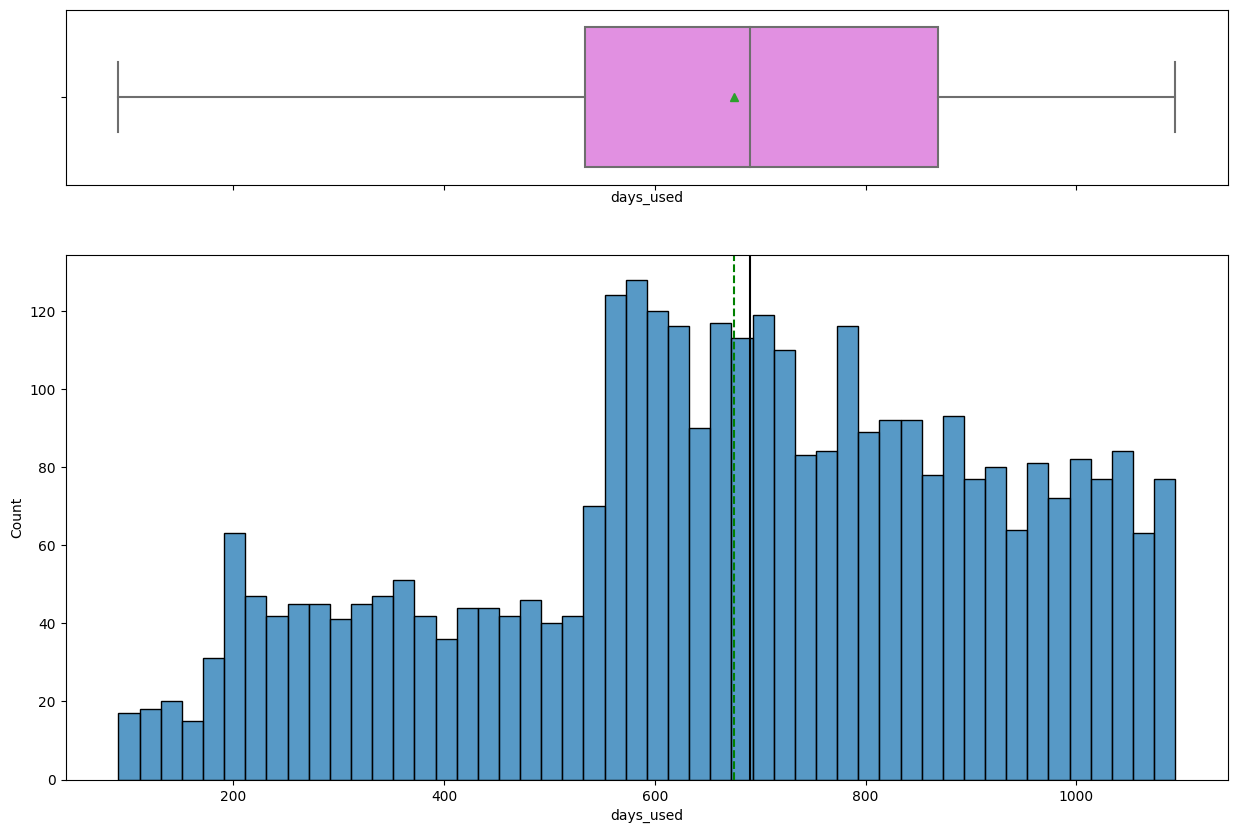

In [54]:
histogram_boxplot(df, "days_used", bins=50)

##### Observations

1.  Most of the devices are more than approx 500 days used
2.  Fewest devices are having the least days used.
3.  there is skewness to the left

### normalized_new-price

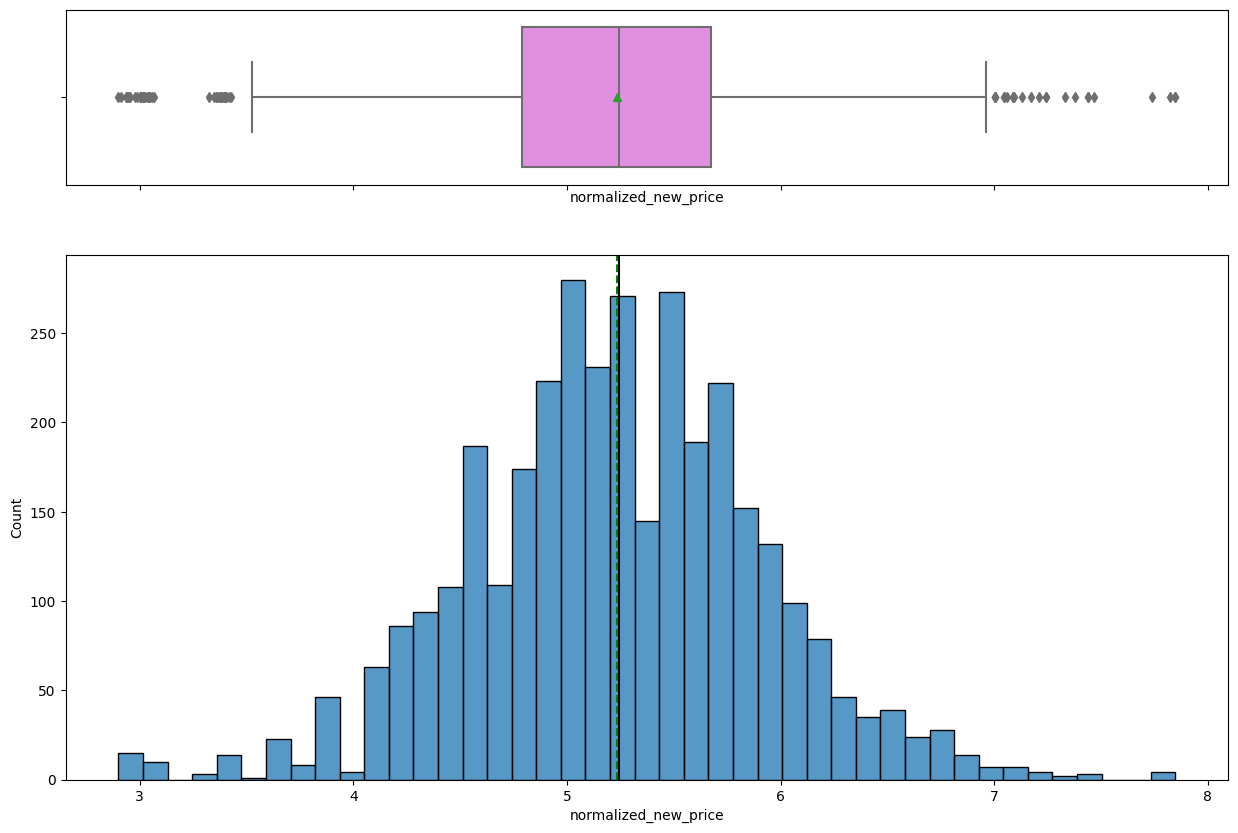

In [55]:
histogram_boxplot(df, "normalized_new_price")

##### Observations
1.  This variale follows a normal distribution
2.  Most of the devies have a normalized new price between 4.5 and 6 euros
3.  There are outliers
4.  The normalized new price ranges from aout 2 to 8 euros

### normalized_used_price

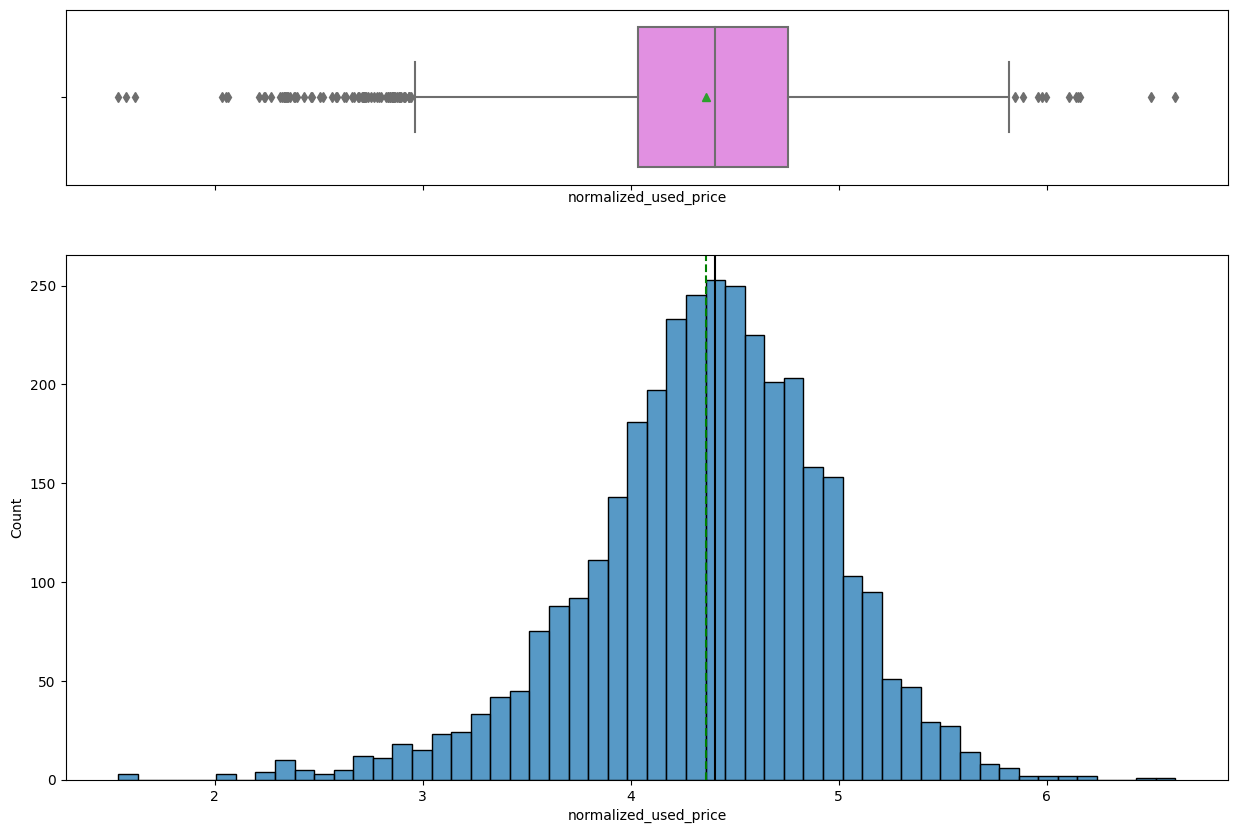

In [56]:
histogram_boxplot(df, "normalized_used_price")

##### Observations

1.  Follows a normal distribution with skight skewness to the left
2.  Most of the normalized used prices ranges between 4 and 5 euros
3.  There are outliers
4.  The normalized used prices ranges from about 0.5 to 7 euros approximately.

## Bivariate and Multivariate  Analysis

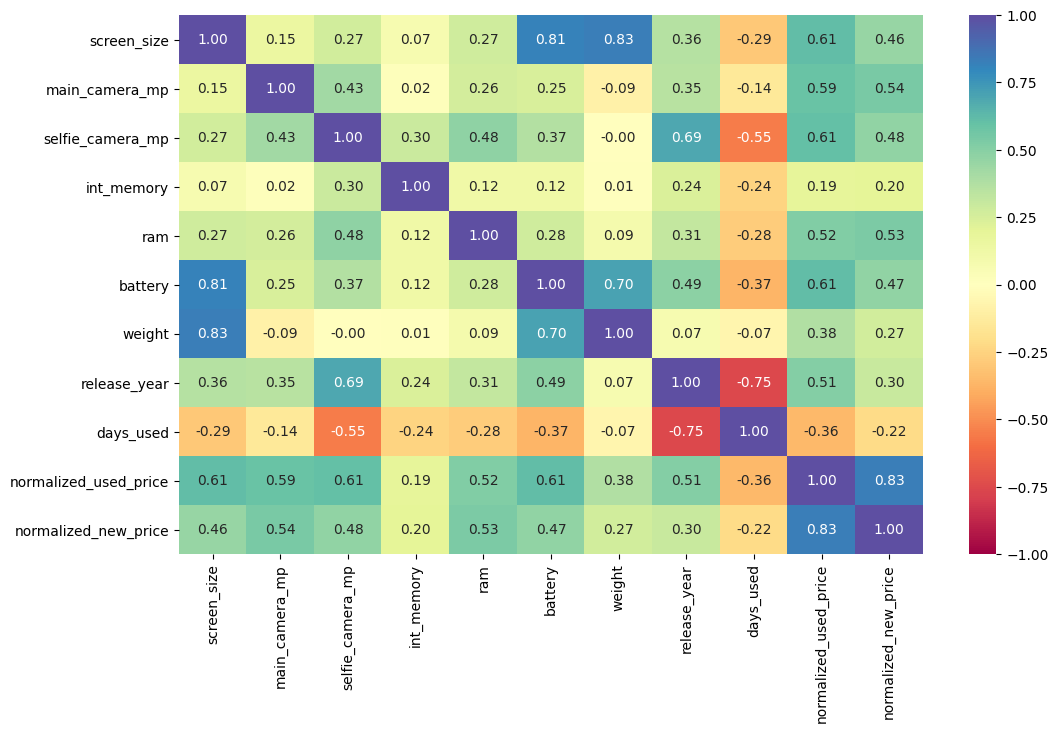

In [57]:
# Examine correaltions

# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# plotting heatmap

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#####
1.  Screen size is strongly correlated with battery and weight.
2.  Screen size is correlted with normalied_used_price
3.  Selfie_camera_mp is correlated with release_year and normalized_used_price and have a negative correlation with days_used.
4.  Battery is correlated with weight and normalized_used_price
5.  Release_year have a strong negative correlation with days_used
6.  Normalized_used_price have a strong correaltion with normalized_new_price

### brand_name vs normalized_used_price

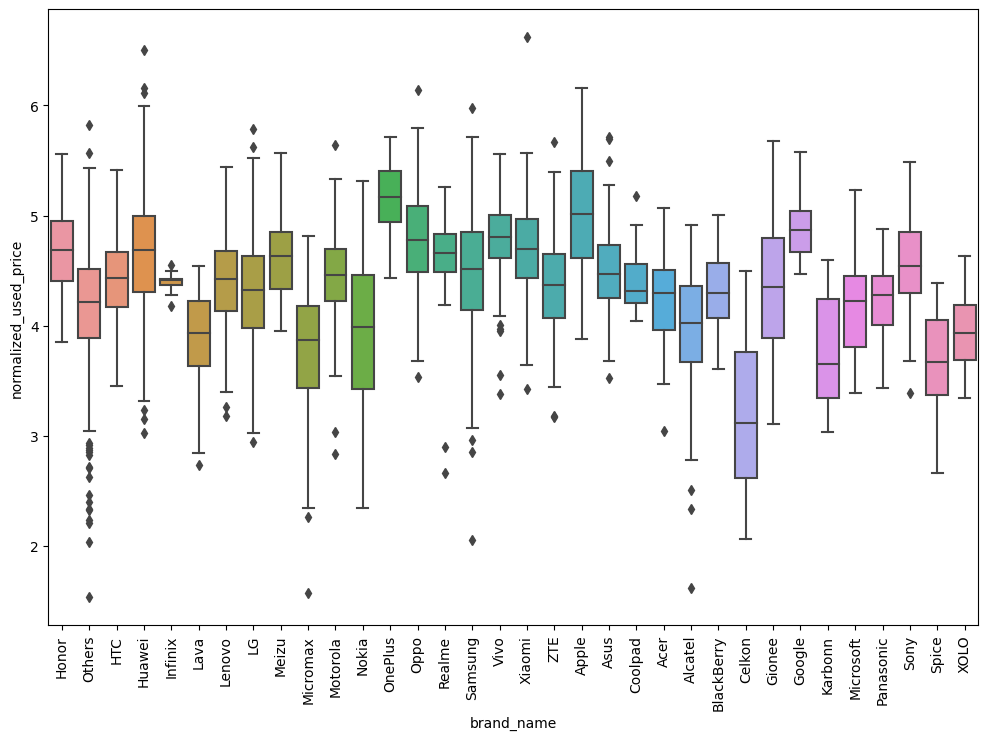

In [58]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="brand_name", y="normalized_used_price")
plt.xticks(rotation=90)
plt.show()

##### Observations
1.  In general, Apple have the highest normalized used price, and Celkin have the lowest.
2.  Most of the prices ranges from 2.6 to 5.5 euros
3.  The newer new devices tend to have higher prices than the older new devices.
4.  There are outliers

### brand_name vs normalized_new_price

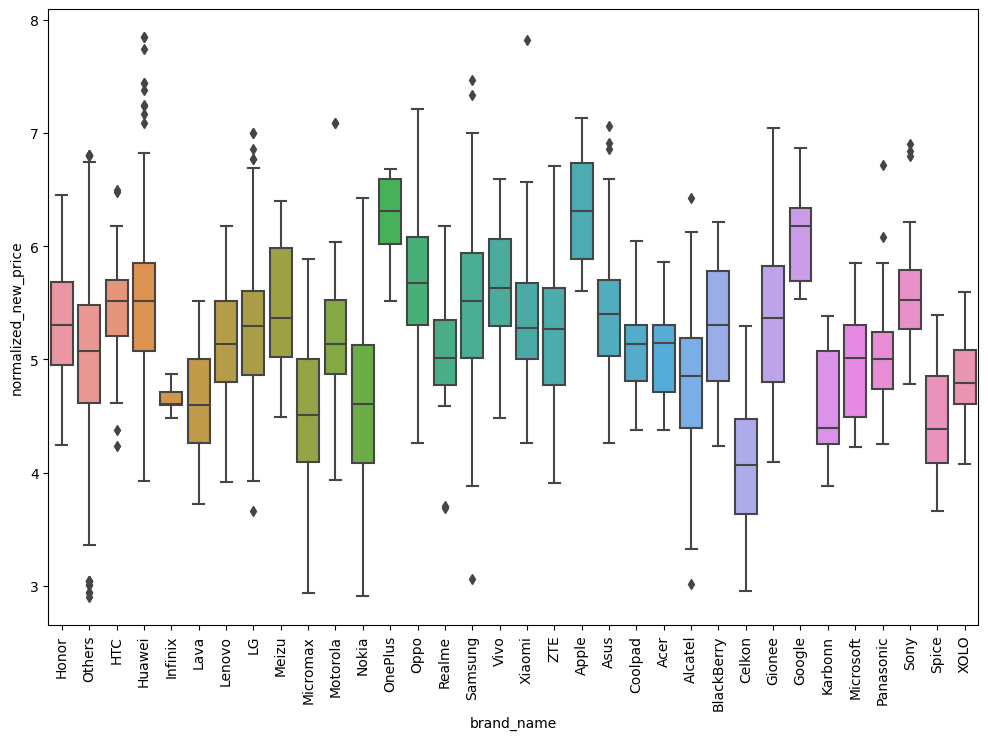

In [59]:
plt.figure(figsize=(12, 8));
sns.boxplot(data=df, x="brand_name", y="normalized_new_price");
plt.xticks(rotation=90);
plt.show();

##### Observations
1.  Similar to the normalised_used_price, Apple tend to have the highest prices and Celkon the lowest
2.  Prices ranges from approx 3.5 to 6.5 euros
3.  There are outliers

### normalized_used_price vs normalised_used_price

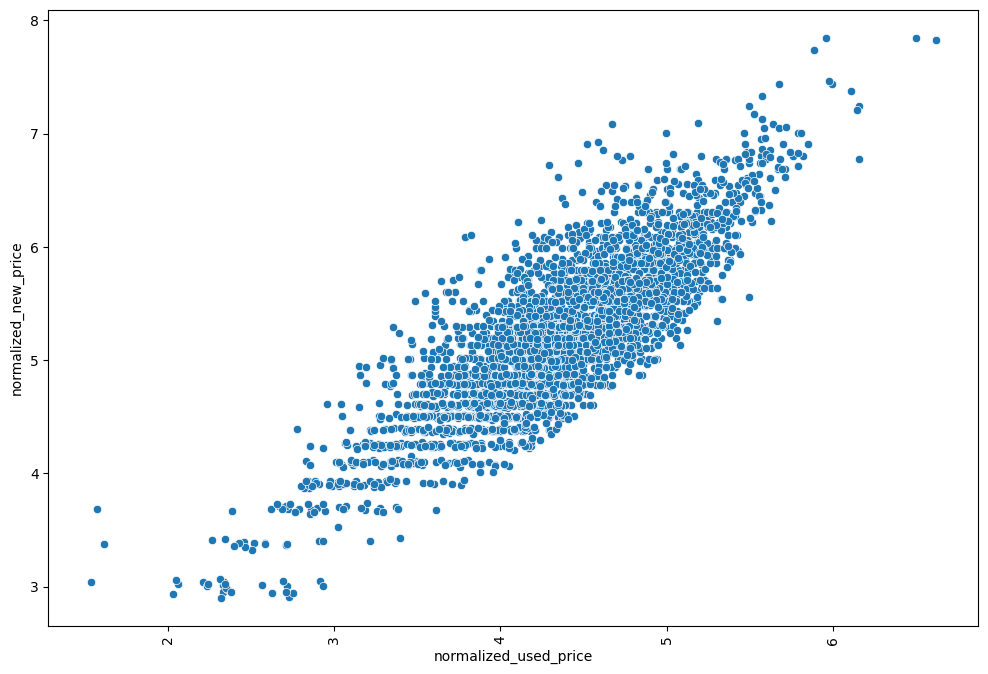

In [60]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,x = 'normalized_used_price' , y = 'normalized_new_price');
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  There is a strong positive correlation between the normalised used price and the normalized new price.

### brand_name vs os

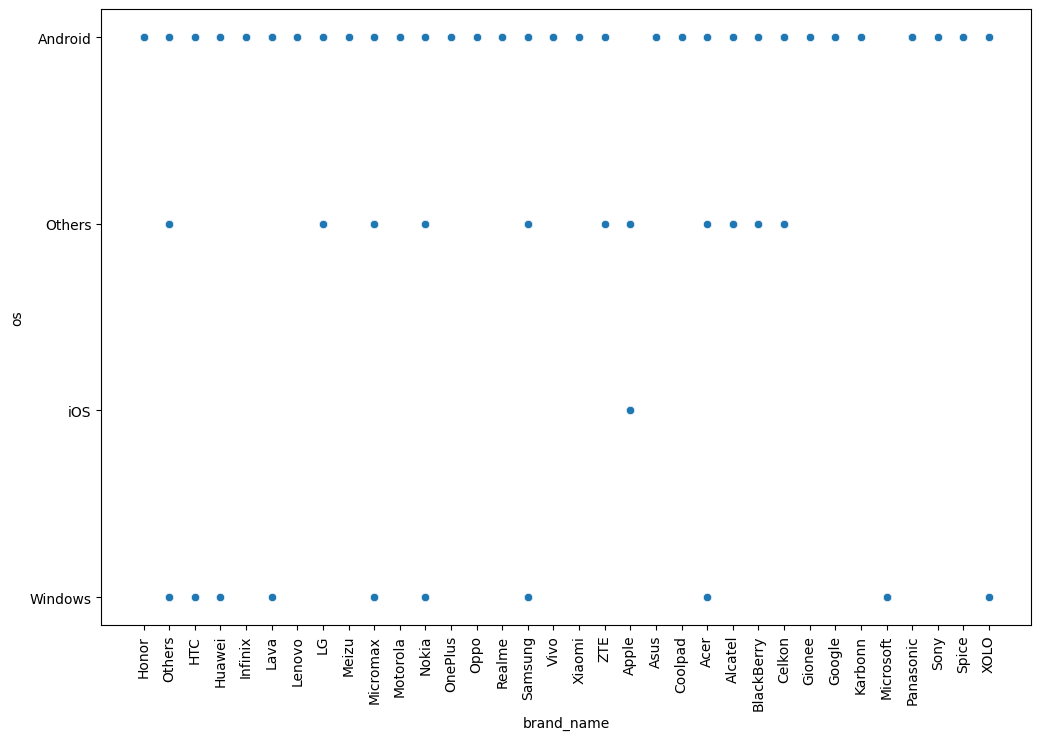

In [61]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,x = 'brand_name' , y = 'os');
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  Android is the most common operating system amongst the brand names
2.  iOS is the least commom and can be found only in Apple products

### brand_name vs days_used

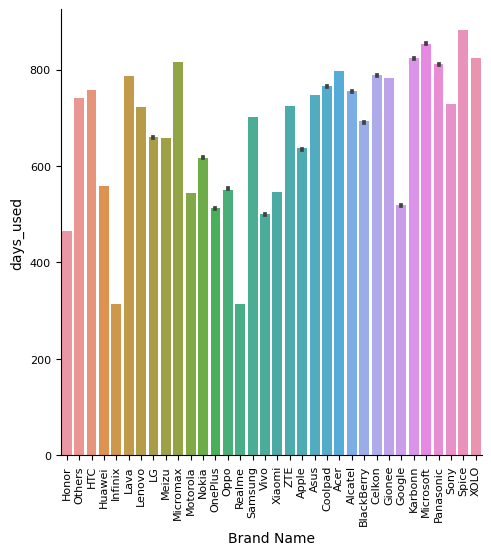

In [62]:
# plotting brand_name vs days_used

sns.catplot(data=df,x= 'brand_name', y='days_used',kind="bar", ci=True)
plt.xlabel("Brand Name",fontsize=10)
plt.ylabel("days_used", fontsize=10)
plt.xticks(fontsize = 8);
plt.yticks(fontsize = 8);
plt.xticks(rotation=90);

##### Observations
1.  Realme and Infinix have the least number of days used, approx 300 days
2.  Spice, Microsoft, Micromax, have the most days used, more than 800 days
3.  Samsung, the most popular devices in the database have approx 700 days used

### brand_name vs weight

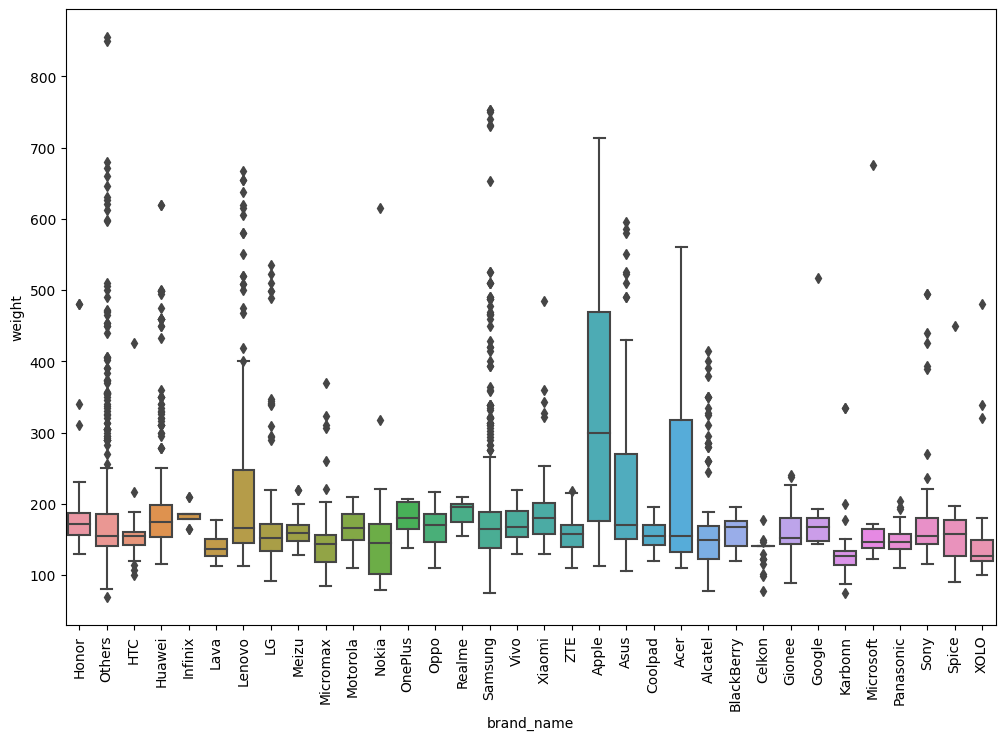

In [63]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

##### Observations
1.  Apple have the heaviest devices in the dataset, with a median value of approx 300g
2.  Apple also have the largest range in weight in the dataset
3.  The remaining brands have an average weight of in the range of 150 to 200 approx.
4.  Clekon have very little variance in its weight compared to the other brands
5.  There are outliers in the dataset

### brand_name vs screen_size

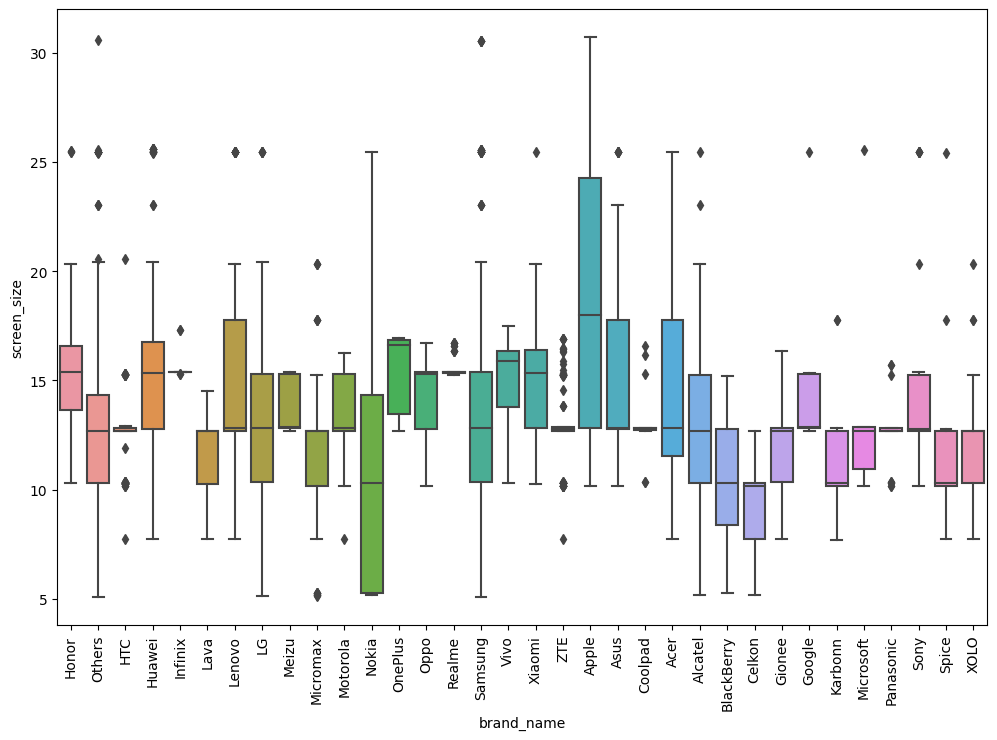

In [64]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="brand_name", y="screen_size")
plt.xticks(rotation=90)
plt.show()

##### Observations
1.  Apple tends to have the biggest screen sizes, while Nokia have the smallest
2.  Panasonic, Coolpad, ZTE, Realme, Infinix and HTC all have very little variance in their weight
3.  There are outliers

### Question 5
Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [65]:
large_screen = df[df["screen_size"]> (6*2.54)]
large_screen.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
1      Honor  Android      17.3000  yes  yes         13.0000   
2      Honor  Android      16.6900  yes  yes         13.0000   
3      Honor  Android      25.5000  yes  yes         13.0000   
4      Honor  Android      15.3200  yes   no         13.0000   
5      Honor  Android      16.2300  yes   no         13.0000   

   selfie_camera_mp  int_memory    ram   battery   weight  release_year  \
1           16.0000    128.0000 8.0000 4300.0000 213.0000          2020   
2            8.0000    128.0000 8.0000 4200.0000 213.0000          2020   
3            8.0000     64.0000 6.0000 7250.0000 480.0000          2020   
4            8.0000     64.0000 3.0000 5000.0000 185.0000          2020   
5            8.0000     64.0000 4.0000 4000.0000 176.0000          2020   

   days_used  normalized_used_price  normalized_new_price  
1        325                 5.1621                5.5190  
2        162                 5.1111                5.8846  
3        345                 5.1354                5.6310  
4        293                 4.3900                4.9478  
5        223                 4.4139                5.0607

In [66]:
large_screen.shape

(1099, 15)

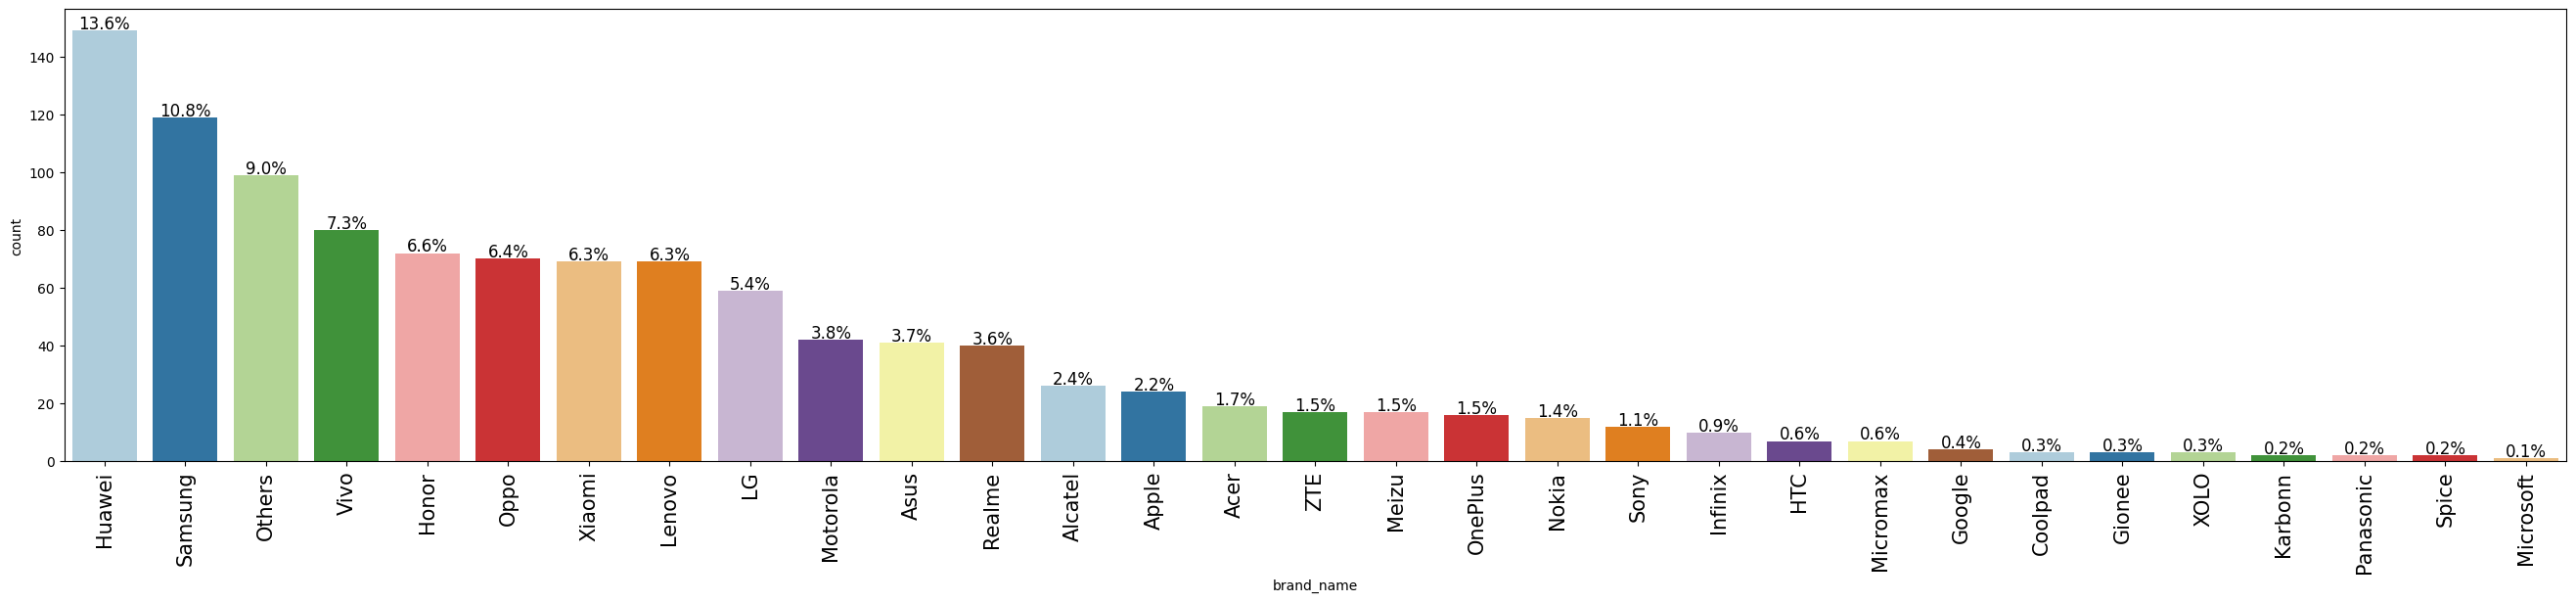

In [67]:
labeled_barplot(large_screen, "brand_name", perc=True, n=None)

**There are 1099 out of 3454 devices with a screen size greater than 6cm, that is approx 32% of the devices.  Huawei (13.6%), Samsung (10.8%) and Others (9%).  Microsoft (0.01%), Spice (0.2%) and Panasonic (0.2%) have the smallest.**

### brand_name vs 4G

<Figure size 1200x900 with 0 Axes>

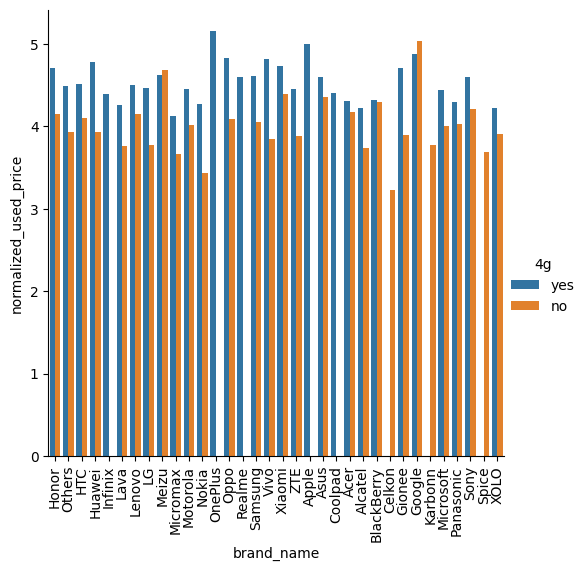

In [68]:

plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'brand_name' , y = 'normalized_used_price', kind = "bar" ,hue='4g', ci = False); 
plt.xticks( rotation=90);
plt.show()


##### Oservations
1.Normalised_used_prices ranges from 3 to 5 euros approximately
2.  The devices with 4g tend to have higher normalised_used_prices compared to the devices with no 4g
3.  Many brands have both 4g and no 4g devices

### brand_name vs 5G

<Figure size 1200x900 with 0 Axes>

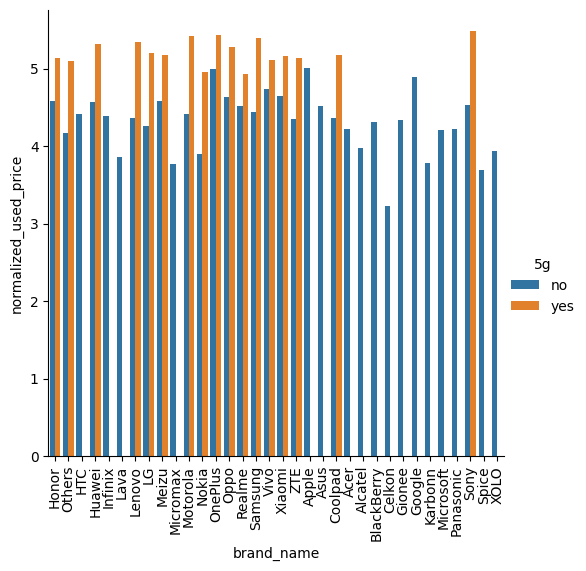

In [69]:
plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'brand_name' , y = 'normalized_used_price', kind = "bar" ,hue='5g', ci = False); 
plt.xticks( rotation=90);
plt.show()


In [70]:
df[(df['5g']=="no") & (df['4g']=="no") ].reset_index().shape[0]


1119

##### Observations
1.  There are more devices without 5g then without 4g
2.  Devices with no 5g tend to be lower in normalized_used_price than those with 5g
3.  Sony 5g have the highest normalized_used_price
4.  There are 1119 devices with no 4g and no 5g

### brand_name vs main_camera_mp

<Figure size 1200x900 with 0 Axes>

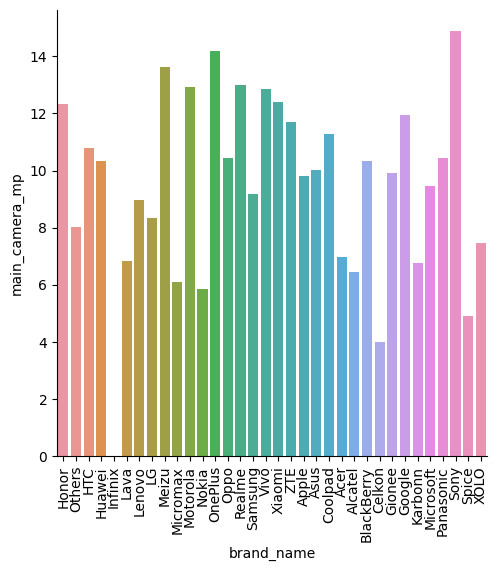

In [71]:
plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'brand_name' , y = 'main_camera_mp', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

In [72]:
# checking how many devices belong to the Infinix brand
df[df["brand_name"]=="Infinix"].reset_index()

index brand_name       os  screen_size   4g  5g  main_camera_mp  \
0     59    Infinix  Android      17.3200  yes  no             NaN   
1     60    Infinix  Android      15.3900  yes  no             NaN   
2     61    Infinix  Android      15.3900  yes  no             NaN   
3     62    Infinix  Android      15.3900  yes  no             NaN   
4     63    Infinix  Android      15.2900  yes  no             NaN   
5    278    Infinix  Android      17.3200  yes  no             NaN   
6    279    Infinix  Android      15.3900  yes  no             NaN   
7    280    Infinix  Android      15.3900  yes  no             NaN   
8    281    Infinix  Android      15.3900  yes  no             NaN   
9    282    Infinix  Android      15.2900  yes  no             NaN   

   selfie_camera_mp  int_memory    ram   battery   weight  release_year  \
0            8.0000     32.0000 2.0000 6000.0000 209.0000          2020   
1            8.0000     64.0000 4.0000 5000.0000 185.0000          2020   
2            8.0000     32.0000 2.0000 5000.0000 185.0000          2020   
3           16.0000     32.0000 3.0000 4000.0000 178.0000          2019   
4           16.0000     32.0000 2.0000 4000.0000 165.0000          2019   
5            8.0000     32.0000 2.0000 6000.0000 209.0000          2020   
6            8.0000     64.0000 4.0000 5000.0000 185.0000          2020   
7            8.0000     32.0000 2.0000 5000.0000 185.0000          2020   
8           16.0000     32.0000 3.0000 4000.0000 178.0000          2019   
9           16.0000     32.0000 2.0000 4000.0000 165.0000          2019   

   days_used  normalized_used_price  normalized_new_price  
0        245                 4.2821                4.5976  
1        173                 4.3636                4.7118  
2        256                 4.1814                4.5055  
3        316                 4.5552                4.6022  
4        468                 4.4167                4.8713  
5        320                 4.4051                4.6054  
6        173                 4.4959                4.7021  
7        329                 4.3707                4.4873  
8        356                 4.4180                4.6060  
9        497                 4.4233                4.8661

In [73]:
# checking the mean main_camera_mp for Infinix brnd
df[df["brand_name"]=="Infinix"].main_camera_mp.mean()

nan

##### Observations
1.  Sony has the highest resolution for main camera
2.  Infinix devices have missing values for main_camera_mp 
3.  Celkon have the lowest main camera resolution

### brand_name vs selfie_camera_mp

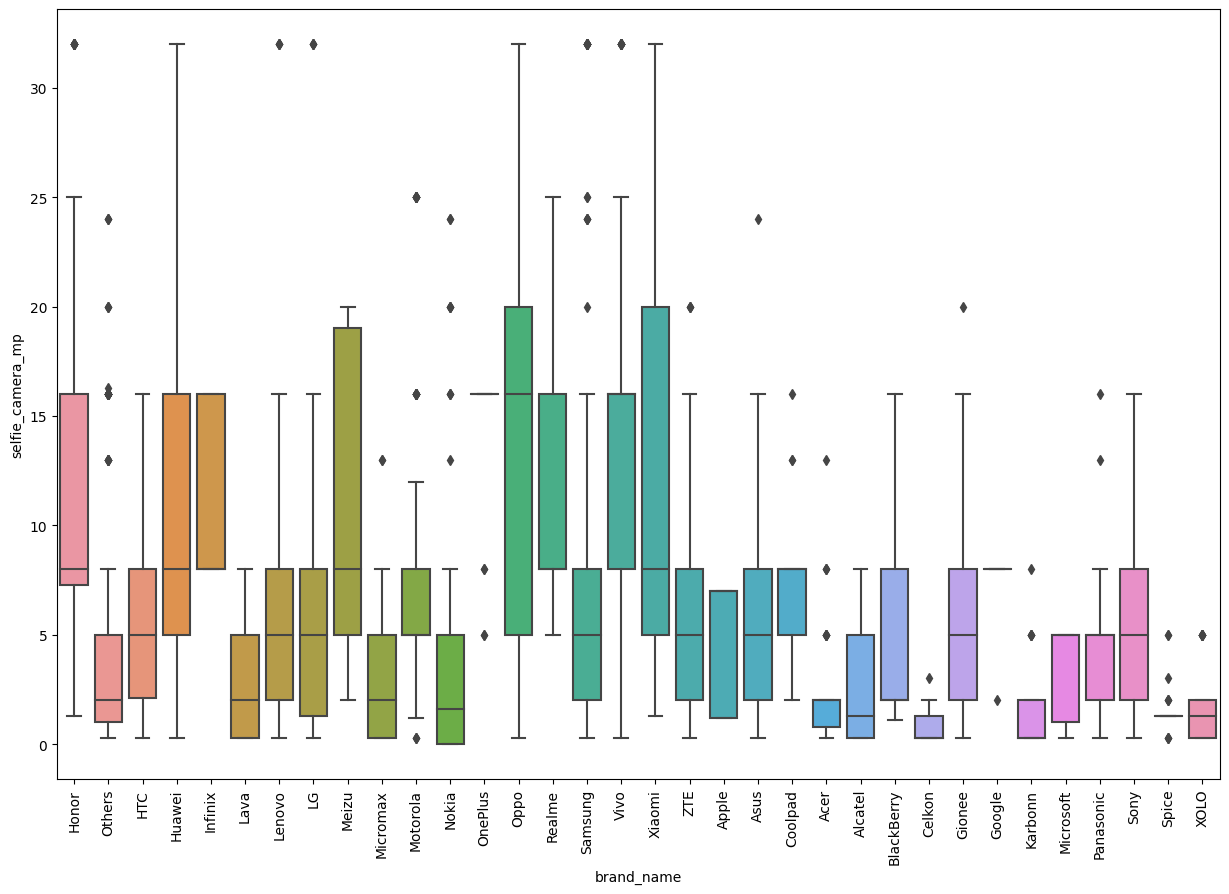

In [74]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="brand_name", y="selfie_camera_mp")
plt.xticks(rotation=90)
plt.show()

##### Observations
1.  All devices have a selfie camera
2.  Spice, OnePlus and Google devives have very little variation in the selfie camera resolution
3.  Meizu, Oppo and Xiaomi have the highest selfie camera resolutions
4.  There are outliers

##### Question 6
A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [75]:
selfie_camera = df[df["selfie_camera_mp"]>8].reset_index()
selfie_camera.head()

index brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      1      Honor  Android      17.3000  yes  yes         13.0000   
1      8      Honor  Android      15.3200  yes   no         13.0000   
2     12      Honor  Android      16.6900  yes  yes         13.0000   
3     13      Honor  Android      15.3200  yes   no         13.0000   
4     16      Honor  Android      15.9000  yes   no         13.0000   

   selfie_camera_mp  int_memory    ram   battery   weight  release_year  \
0           16.0000    128.0000 8.0000 4300.0000 213.0000          2020   
1           16.0000    128.0000 6.0000 4000.0000 165.0000          2020   
2           16.0000    128.0000 8.0000 4100.0000 206.0000          2019   
3           16.0000     64.0000 4.0000 4000.0000 171.5000          2019   
4           32.0000    128.0000 6.0000 3750.0000 172.0000          2019   

   days_used  normalized_used_price  normalized_new_price  
0        325                 5.1621                5.5190  
1        161                 4.8861                5.2999  
2        537                 5.3833                6.2140  
3        336                 4.6176                5.3988  
4        395                 5.0224                5.5179

In [76]:
selfie_camera.shape

(655, 16)

In [77]:
df.shape

(3454, 15)

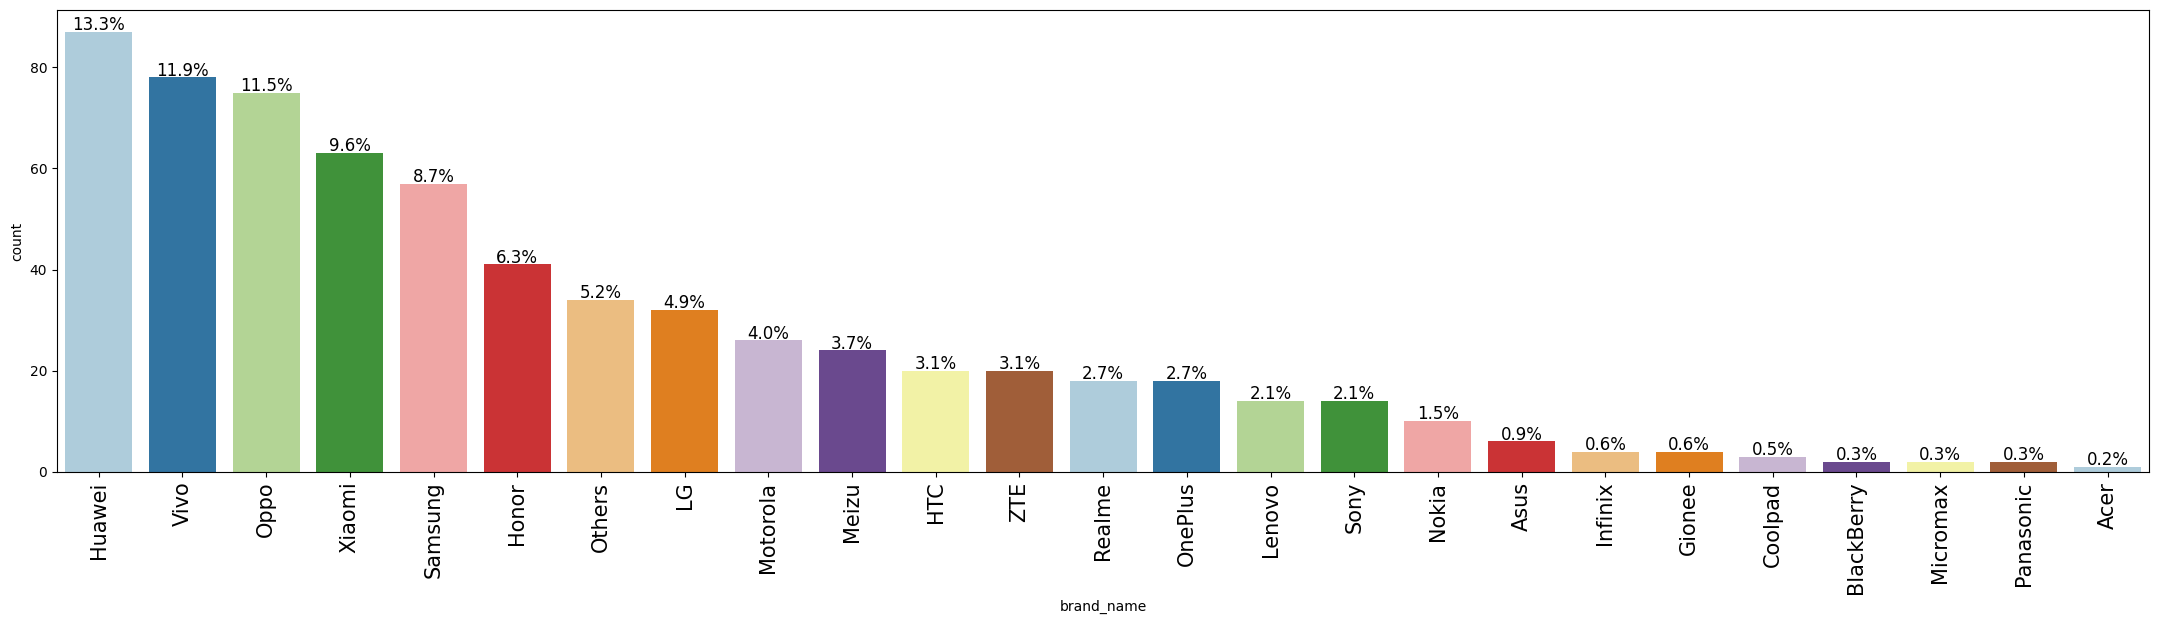

In [78]:
labeled_barplot(selfie_camera, "brand_name", perc=True, n=None)

**There are 655 out of 3454 devices with a selfie camera size greater than 8 mega pixels, i.e. approx 19% of the devices.  Huawei (13.3%), Vivo (11.9%) and Oppo (11.5%) have the largest selfie camera sizes.  Acer (0.2%), Panasonic (0.3%), Micromax (0.3%) and Blackberry (0.3%) have the smallest selfie camera sizes**

### brand_name vs ram

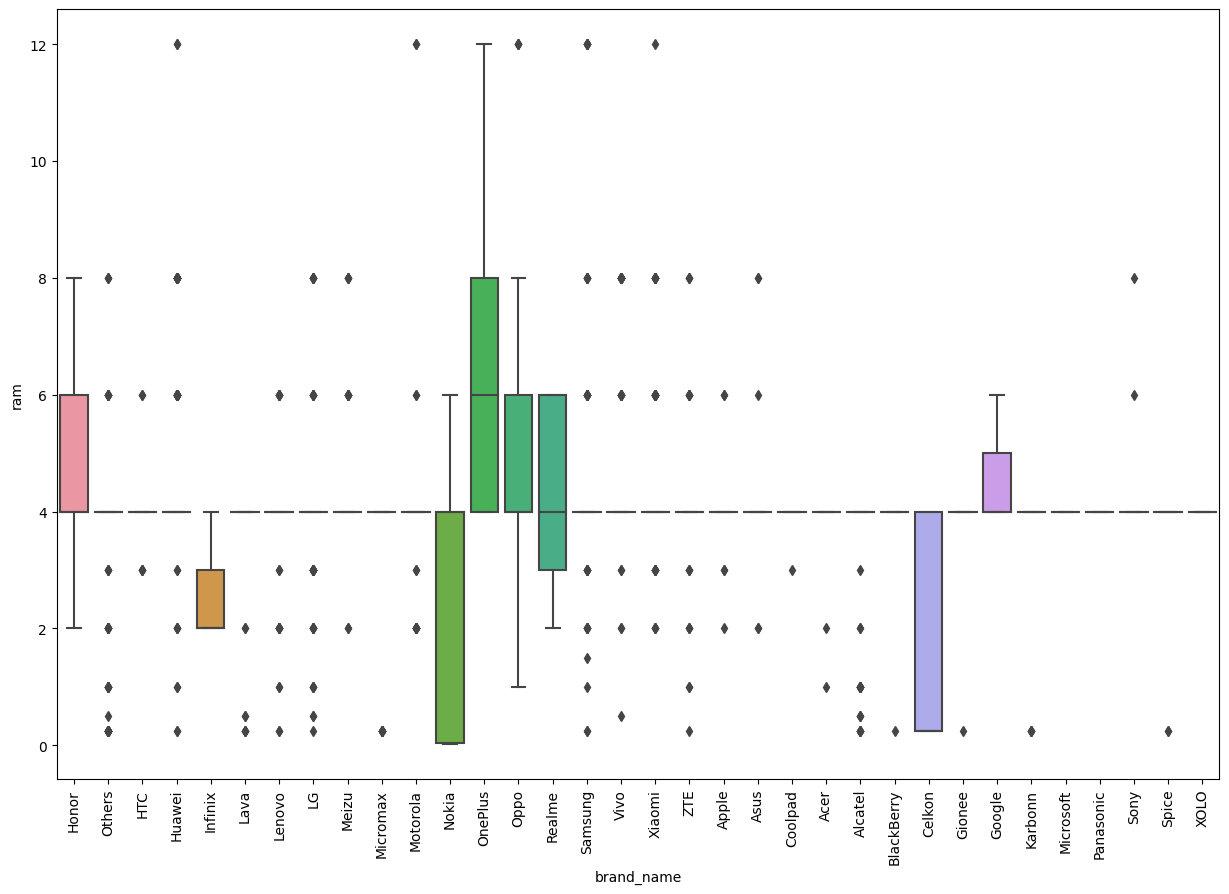

In [79]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x900 with 0 Axes>

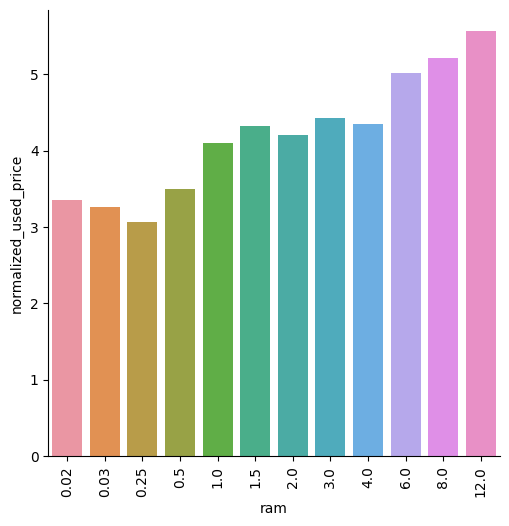

In [80]:
# Comparing RAM and normalized_used_price
plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'ram' , y = 'normalized_used_price', kind = "bar", ci = False); 
plt.xticks( rotation=90);
plt.show()


<Figure size 1200x900 with 0 Axes>

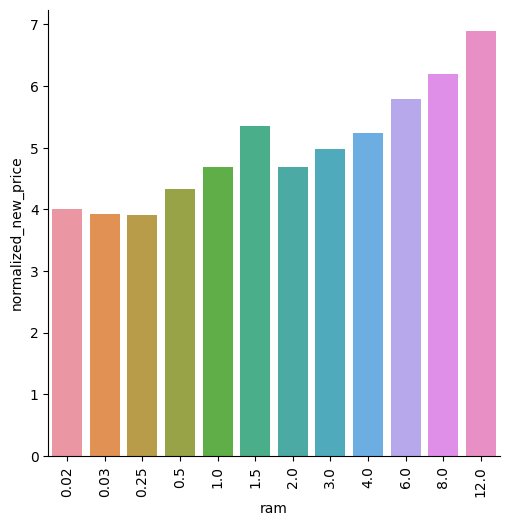

In [81]:
# Comparing RAM and normalized_new_price
plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'ram' , y = 'normalized_new_price', kind = "bar", ci = False); 
plt.xticks( rotation=90);
plt.show()


In [82]:
# calculating the mean ram in the dtaset
df["ram"].mean()

4.036121739130435

##### Observations
1. the averge ram for the devices is 4GB
2. OnePlus devices was above average in ram i.e 4GB and more
3. Celkon devices was below average in ram ie.e 4gb and less
4. Most of the nokia devices was 4gb and below in RAM
5. Most of the brands had very little variation in the RAM sizes compared to the other brands.
6. As RAM size increases, the normalized_used_price also increases, this is generally the case for normalized_new_price, except for ram size 1.5GB


### brand_name vs battery

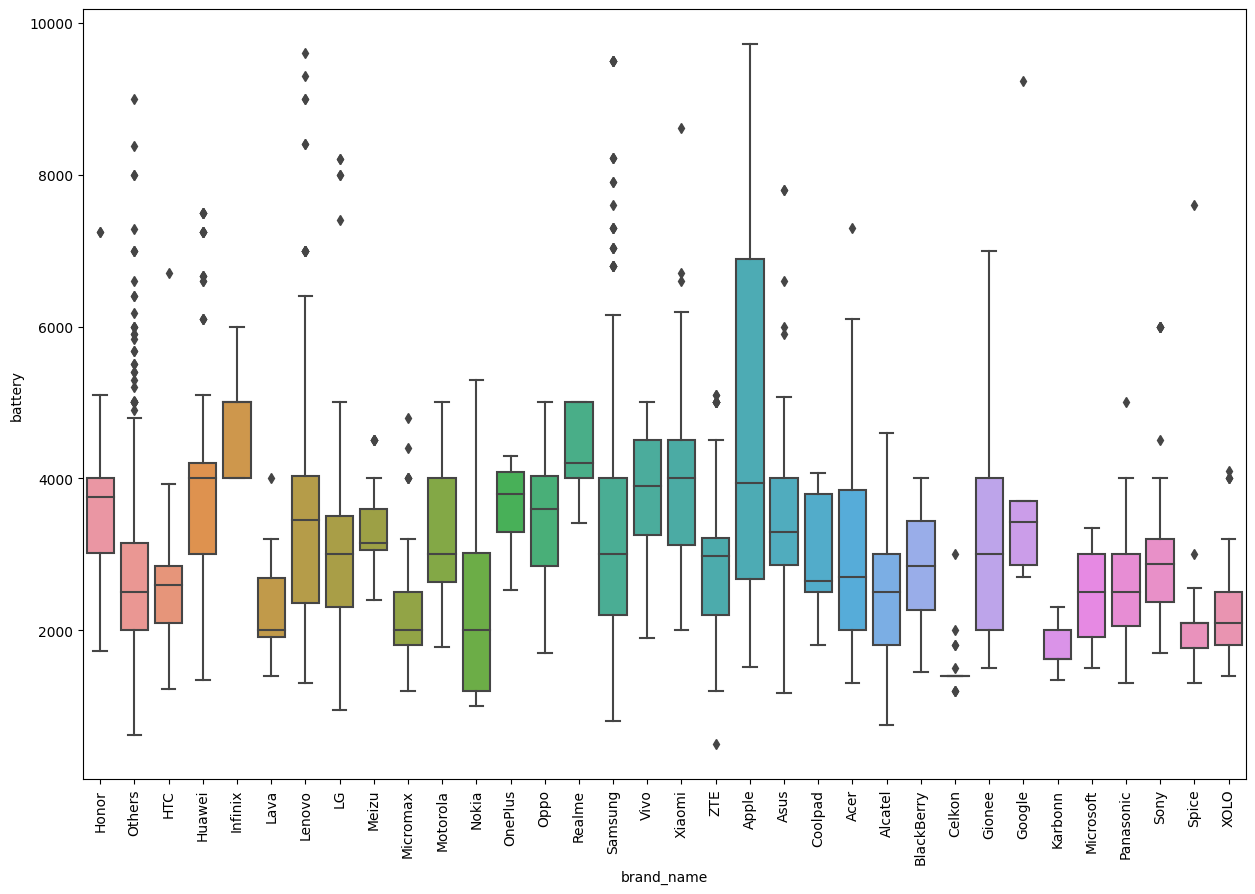

In [83]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="brand_name", y="battery")
plt.xticks(rotation=90)
plt.show()

##### Observations
1.  Apple devices tend to be the heaviest
2.  Spice and Karbonn devices tend to be the lightest devices
3.  Celkon devices have very little variation in weight compared to the other brand names
4.  There are outiers in the dataset

**A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

In [84]:
# creating a new datafram with large batteries i.e > 4500
large_batteries = df[df["battery"]> 4500]
large_batteries.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
3       Honor  Android      25.5000  yes  yes         13.0000   
4       Honor  Android      15.3200  yes   no         13.0000   
11      Honor  Android      15.3200  yes   no         13.0000   
19      Honor  Android      25.4300  yes   no          5.0000   
20      Honor  Android      20.3200  yes   no          8.0000   

    selfie_camera_mp  int_memory    ram   battery   weight  release_year  \
3             8.0000     64.0000 6.0000 7250.0000 480.0000          2020   
4             8.0000     64.0000 3.0000 5000.0000 185.0000          2020   
11            8.0000     64.0000 4.0000 5000.0000 185.0000          2020   
19            2.0000     32.0000 3.0000 5100.0000 173.0000          2019   
20            8.0000     32.0000 3.0000 5100.0000 173.0000          2019   

    days_used  normalized_used_price  normalized_new_price  
3         345                 5.1354                5.6310  
4         293                 4.3900                4.9478  
11        344                 4.6574                4.7702  
19        266                 4.2679                5.5171  
20        321                 4.5563                5.3040

In [85]:
large_batteries.shape


(341, 15)

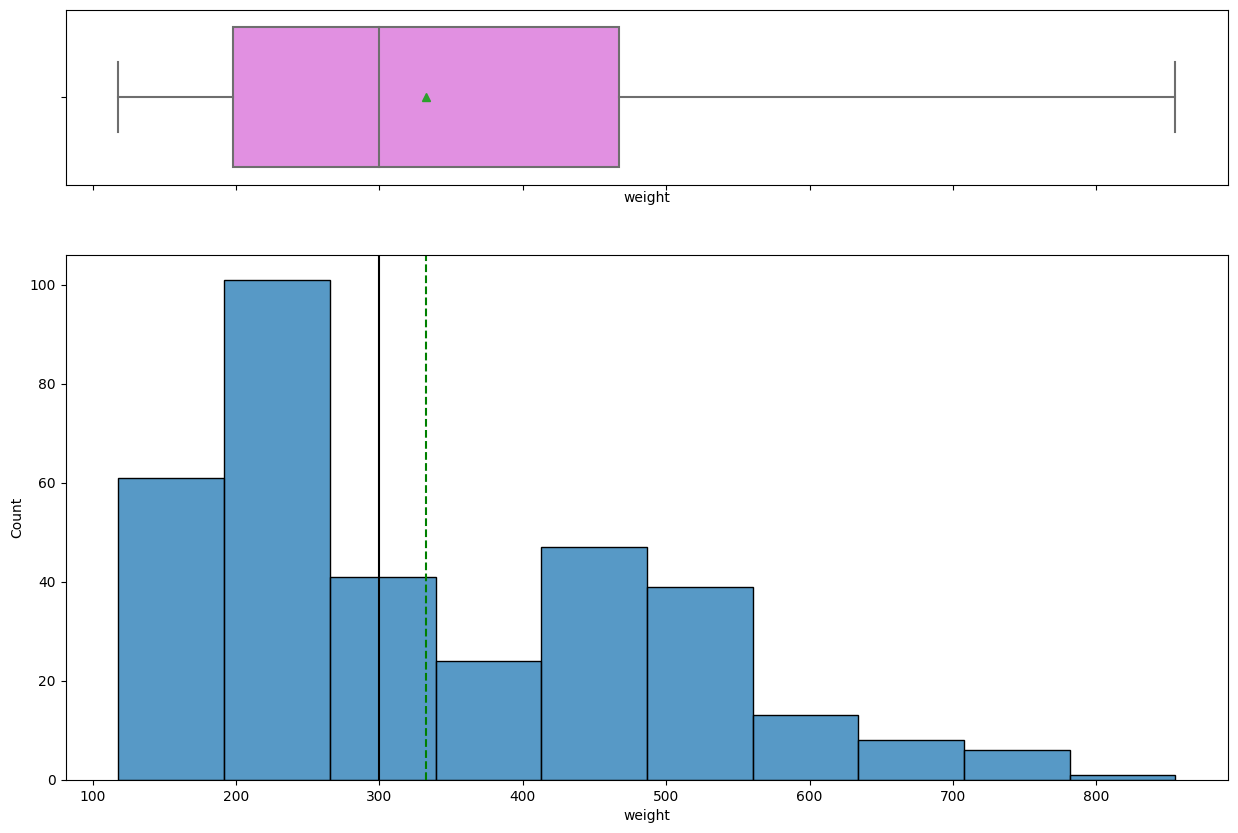

In [86]:
histogram_boxplot(large_batteries, "weight")

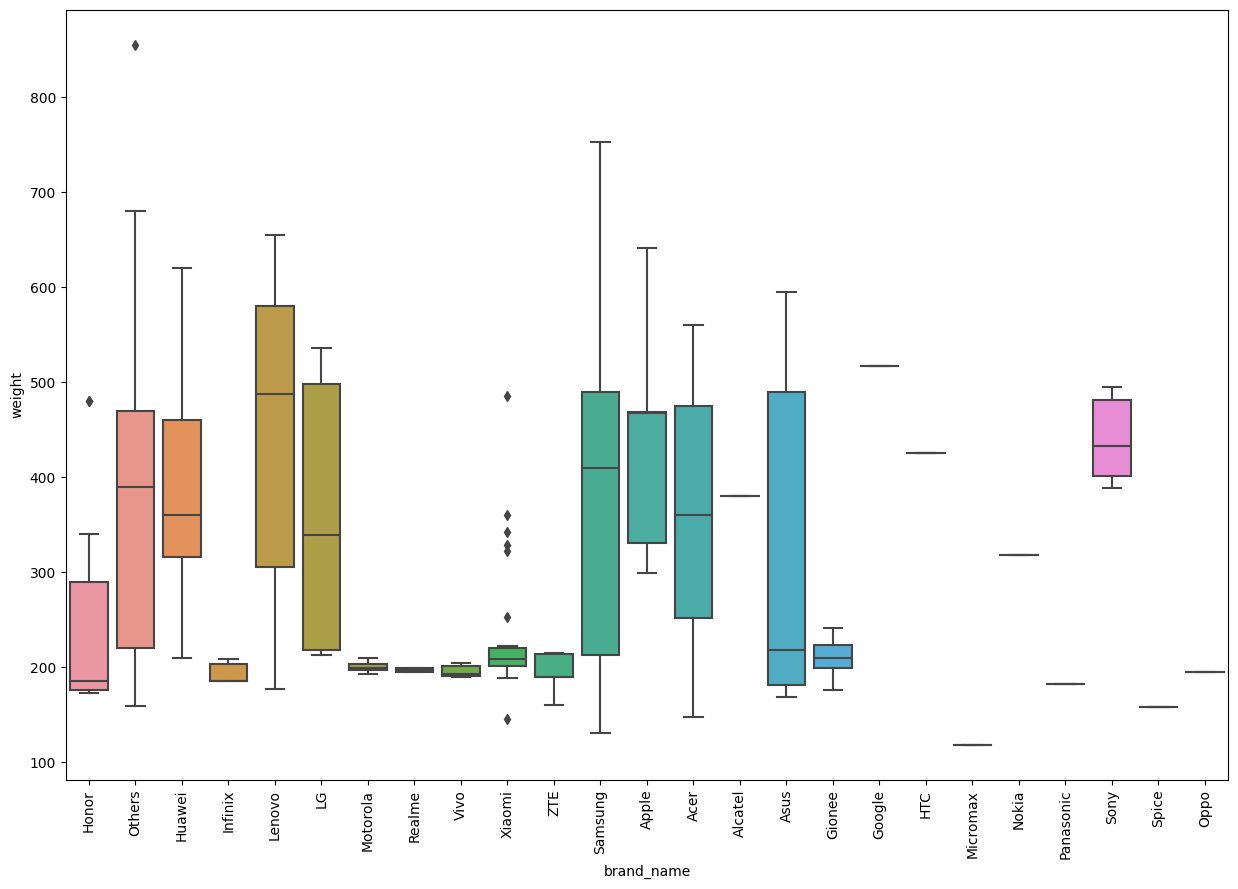

In [87]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=large_batteries, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

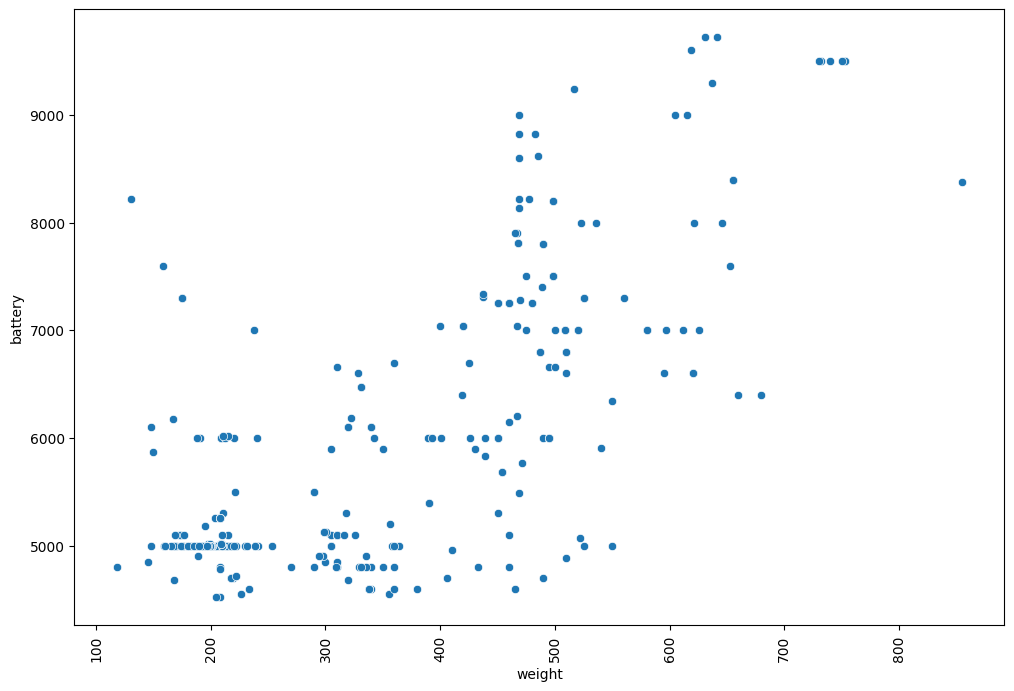

In [88]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=large_batteries,x = 'weight' , y = 'battery');
plt.xticks(rotation=90);
plt.show()

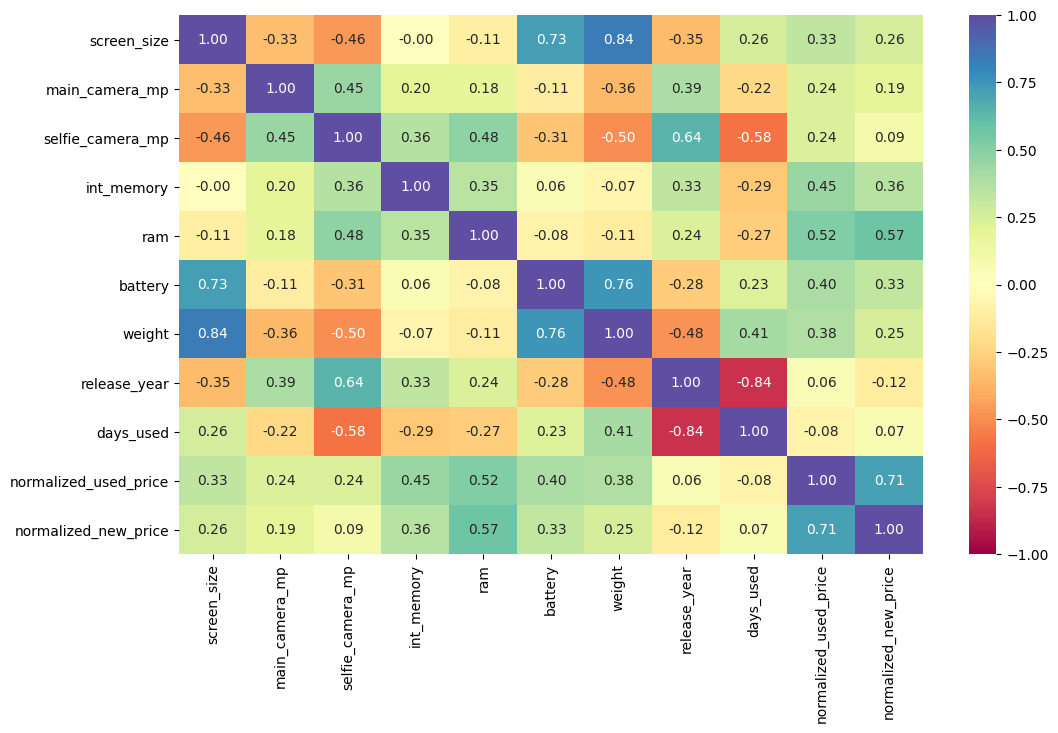

In [89]:
# Examine correaltions of weight and battery for large battery devices

# creating a list of numerical columns
large_num_cols = large_batteries.select_dtypes(include=np.number).columns.tolist()

# plotting heatmap

plt.figure(figsize=(12, 7))
sns.heatmap(
    large_batteries[large_num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Answer:
1.  There are 241 devices with large batteries i.e. battries greater than 4500 mAh
2.  The weight for the large batteries devices is is multi modal and right skewed, with an average of 300 grams.  The weight ranges from approxs 125g to 870g
3.  Samsung have the largest range in weight for the large battery devices
4.  Acatel, Google, HTC, Micromax, Nokia, Panasonic, Spice and Oppo have the least variation in weight
5.  From the scatter plot and heat map we can see there is a positive correlation between battery and weight


### brand_name and int_memory

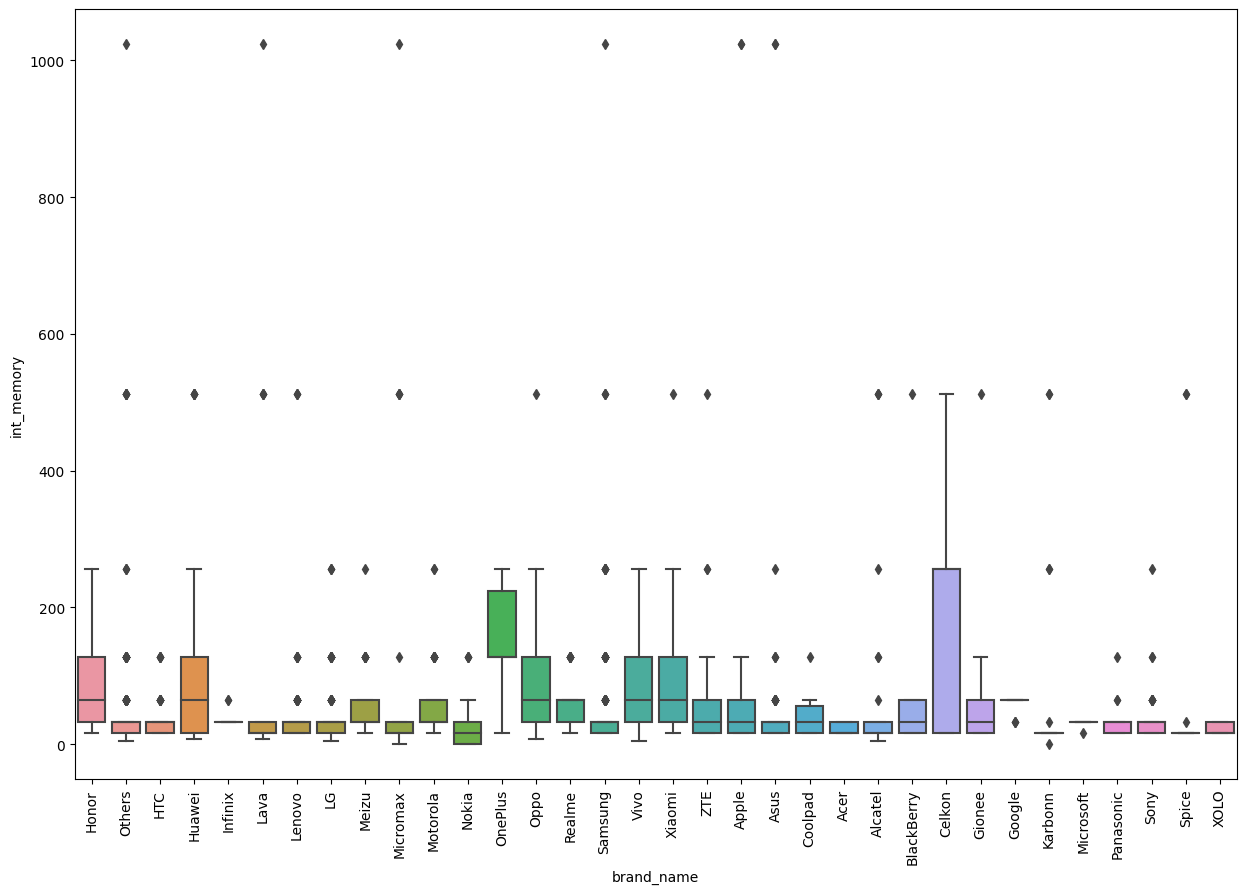

In [90]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="brand_name", y="int_memory")
plt.xticks(rotation=90)
plt.show()

In [91]:
df.loc[df["brand_name"]=="Spice"]["int_memory"].mean()

49.6

##### Observations
1.  Celkon offers the largest internal memory size
2.  Infinix, Google, Karbonn, Microsoft and Spice have very little variation in internal memory size compared to the other devices
3.  Many brands have an internal memory of less than 100GB


### os vs screen_size

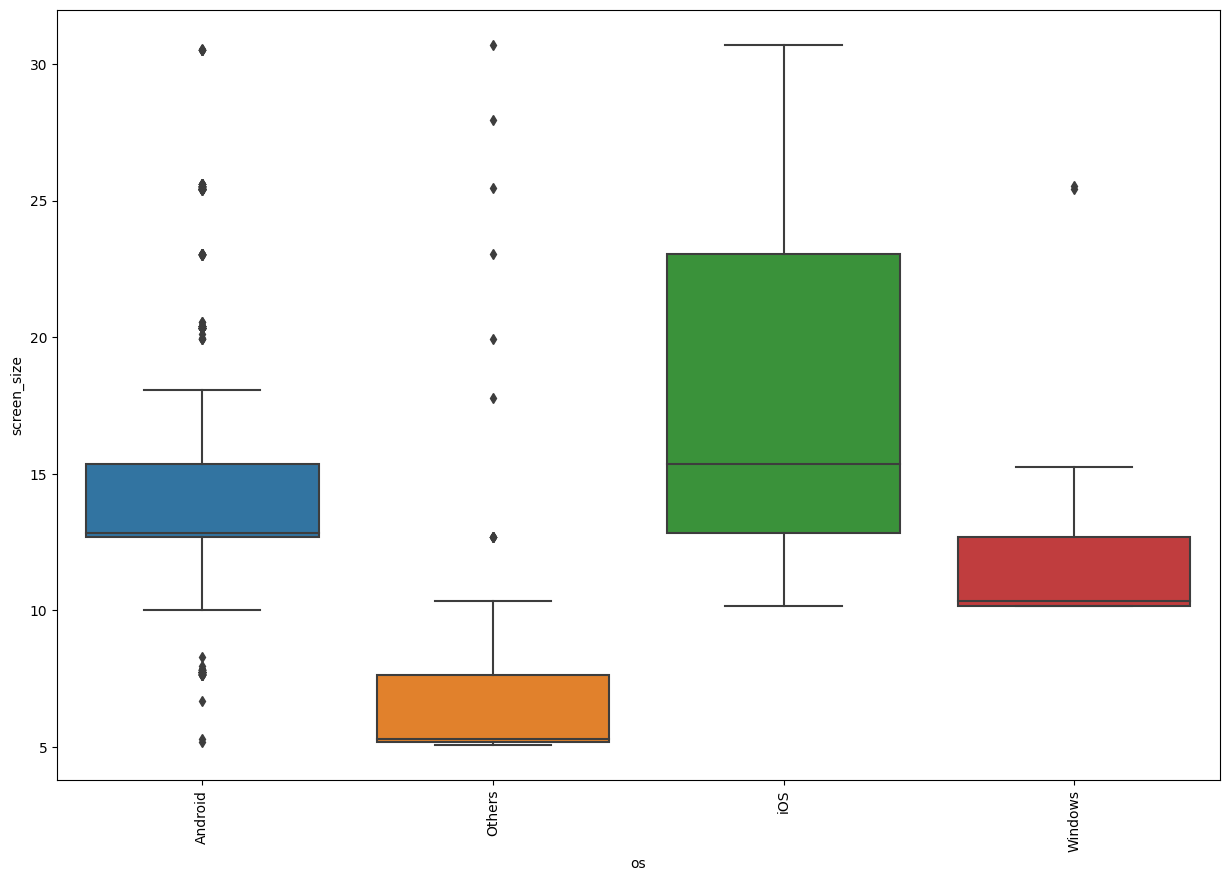

In [92]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="os", y="screen_size")
plt.xticks(rotation=90)
plt.show()

##### Observations
1.  Devices with iOS operating system have the biggest sreeen sizes, ranging from 10cm to 30cm approx
2.  Devices in the others catogery for operating systems have the lowest screen sizes, ranging from 5cm to 10cm approx

### os vs 4g

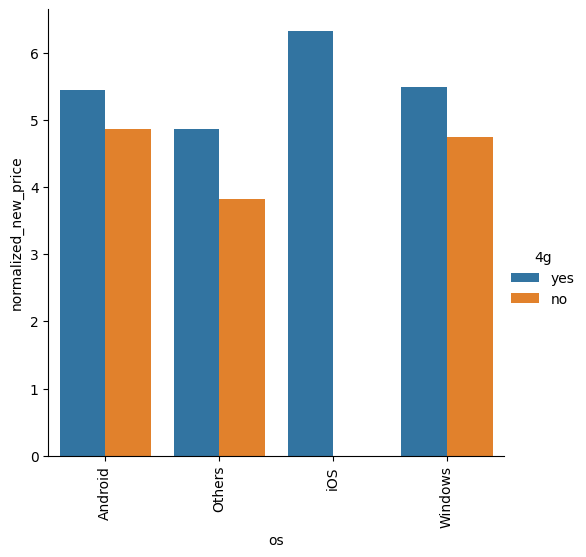

In [93]:
sns.catplot(data=df,x = 'os' , y = 'normalized_new_price', kind = "bar" , hue="4g", ci = False); 
plt.xticks(rotation=90);
plt.show()

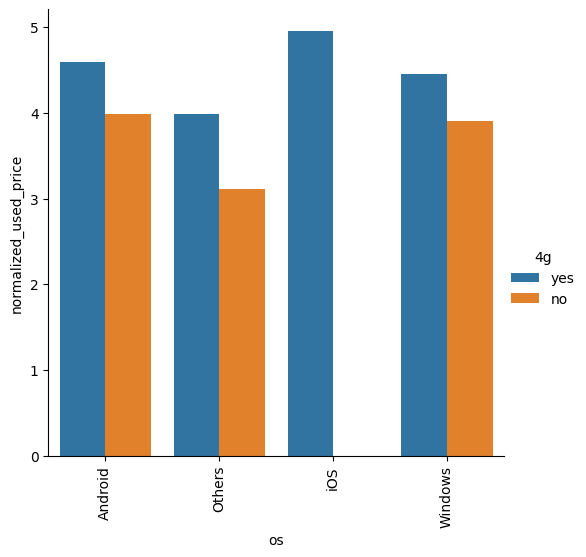

In [94]:
sns.catplot(data=df,x = 'os' , y = 'normalized_used_price', kind = "bar" , hue="4g", ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  All iOS devices are 4g and have the highest normalized_new_price and normalised_used_price (approx 6.4 and 5 euros respectively)
2.  Windows and Android have about the same normalized _new_price and normalised_used_price for 4g devices (approx 5.5 and 4.5 respectively
3.  Others have the lowest prices for 4g devices
   

### os vs 5g

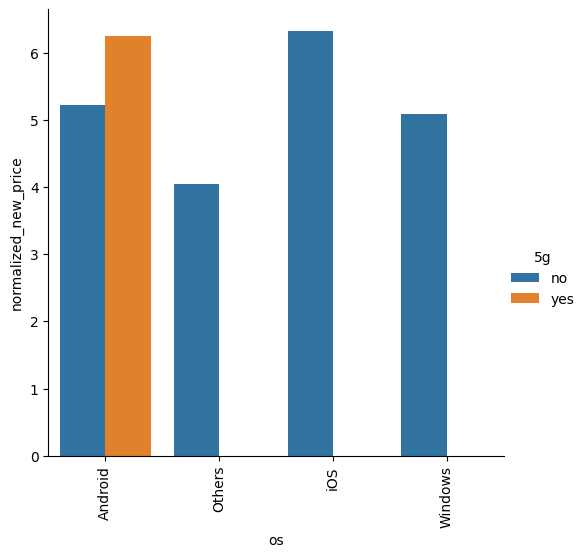

In [95]:
sns.catplot(data=df,x = 'os' , y = 'normalized_new_price', kind = "bar" , hue="5g", ci = False); 
plt.xticks(rotation=90);
plt.show()

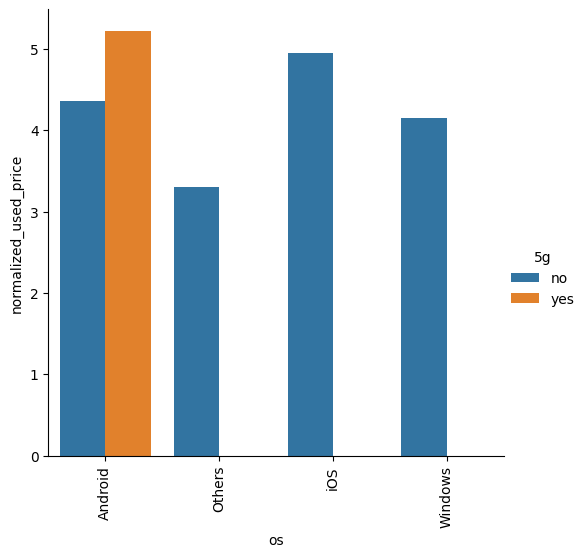

In [96]:
sns.catplot(data=df,x = 'os' , y = 'normalized_used_price', kind = "bar" , hue="5g", ci = False); 
plt.xticks(rotation=90);
plt.show()

In [97]:
# checking which brands have 5g devices
df.loc[df["5g"]=="yes"]["os"].value_counts().reset_index()

index   os
0  Android  152

##### Observations
1.  Only Android devices have 5g
2.  Android 5g normalized_new_price is almost the same as iOS no 5g prices, however the normalized_used prices are slightly different (about 0.5 euros), with the androud 5g prices being higher
3.  Others have the lowest prices and no 5g devices

### os vs main_camera_mp

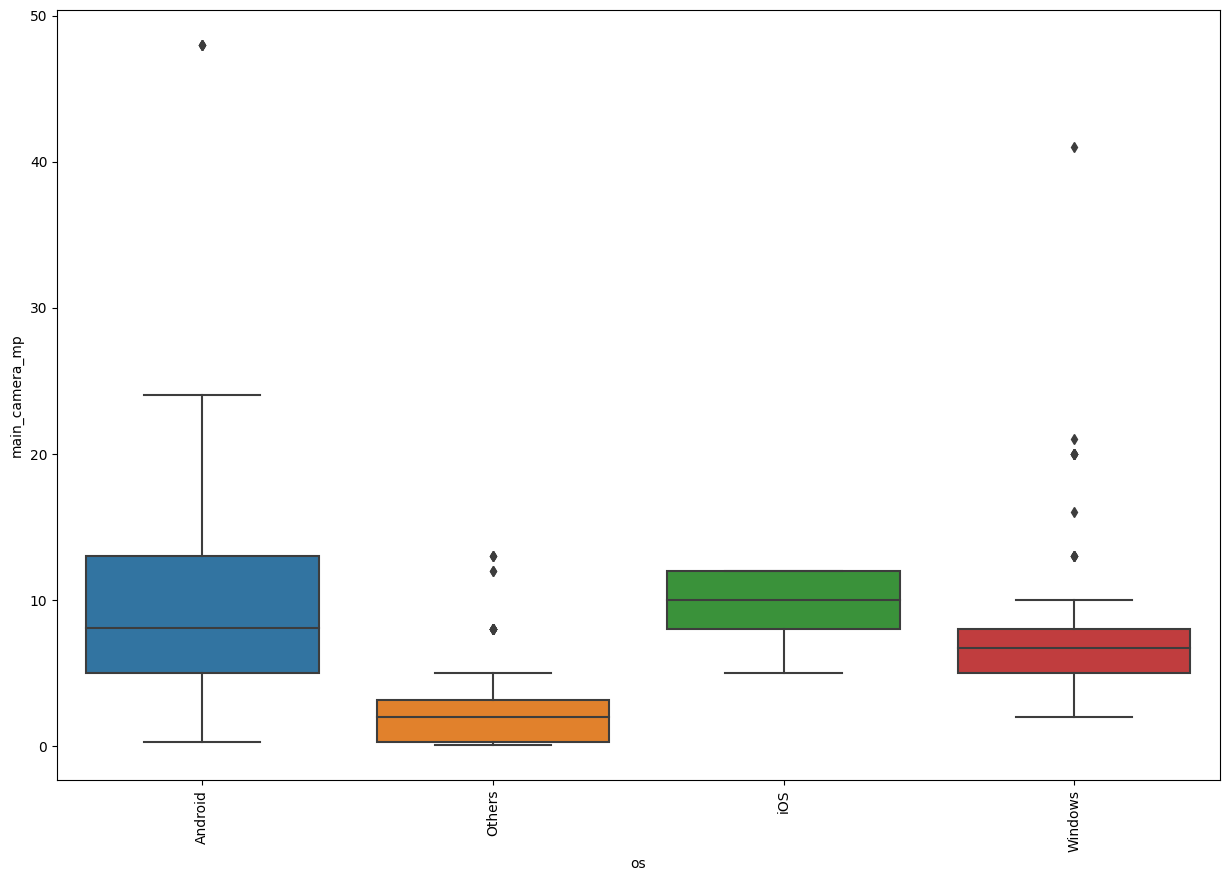

In [98]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="os", y="main_camera_mp")
plt.xticks(rotation=90)
plt.show()

##### Observations
1.  Others have the lowest average main camera resolution approx 3mp
2.  iOS on average have the highest main camera resolution approx 10mp
3.  Android have the biggest range in the main camera resolution approx 0-25

### os vs selfie_camera

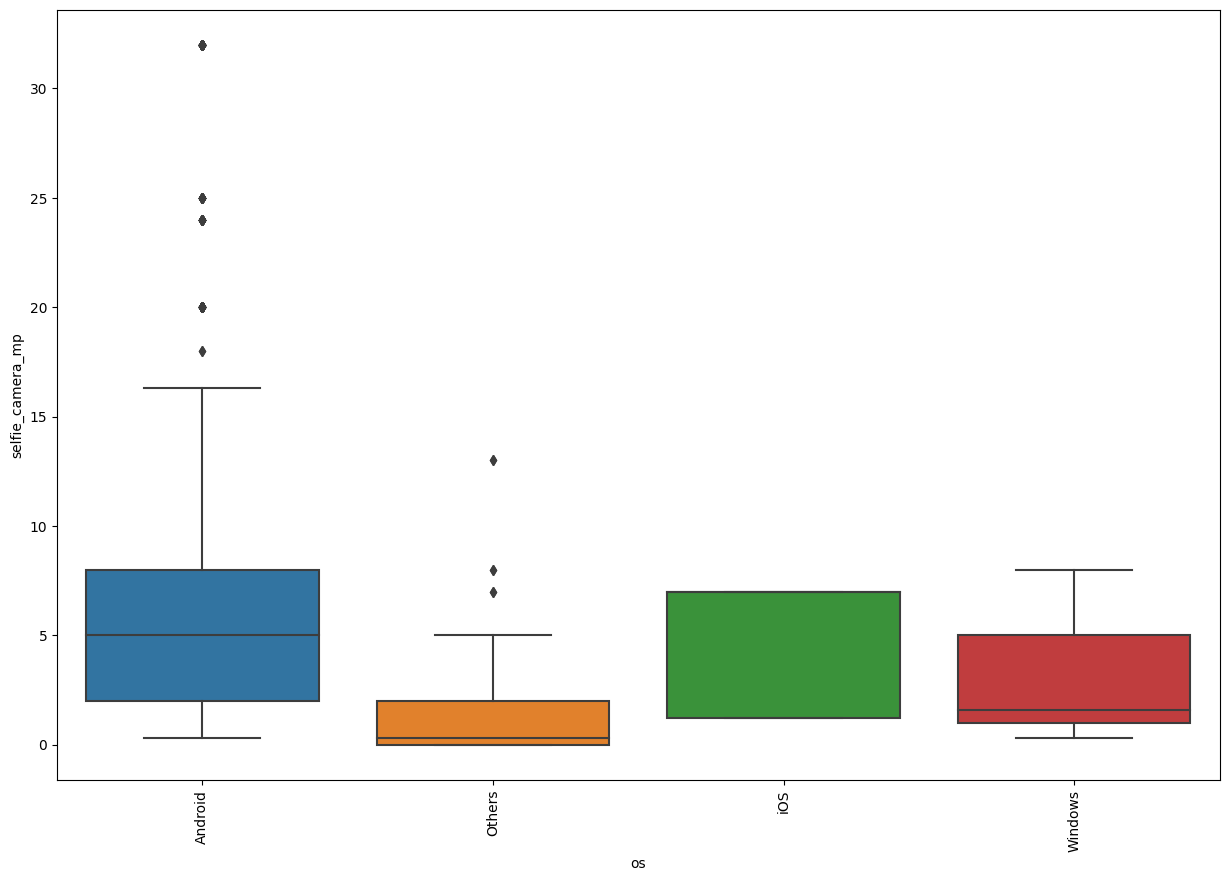

In [99]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="os", y="selfie_camera_mp")
plt.xticks(rotation=90)
plt.show()

##### Observations
1.  Others have the smallest size selfie cameras with a mean of approx 1
2.  Android have the largest range in selfie camera size approx 1 to 17

### os vs int_memory

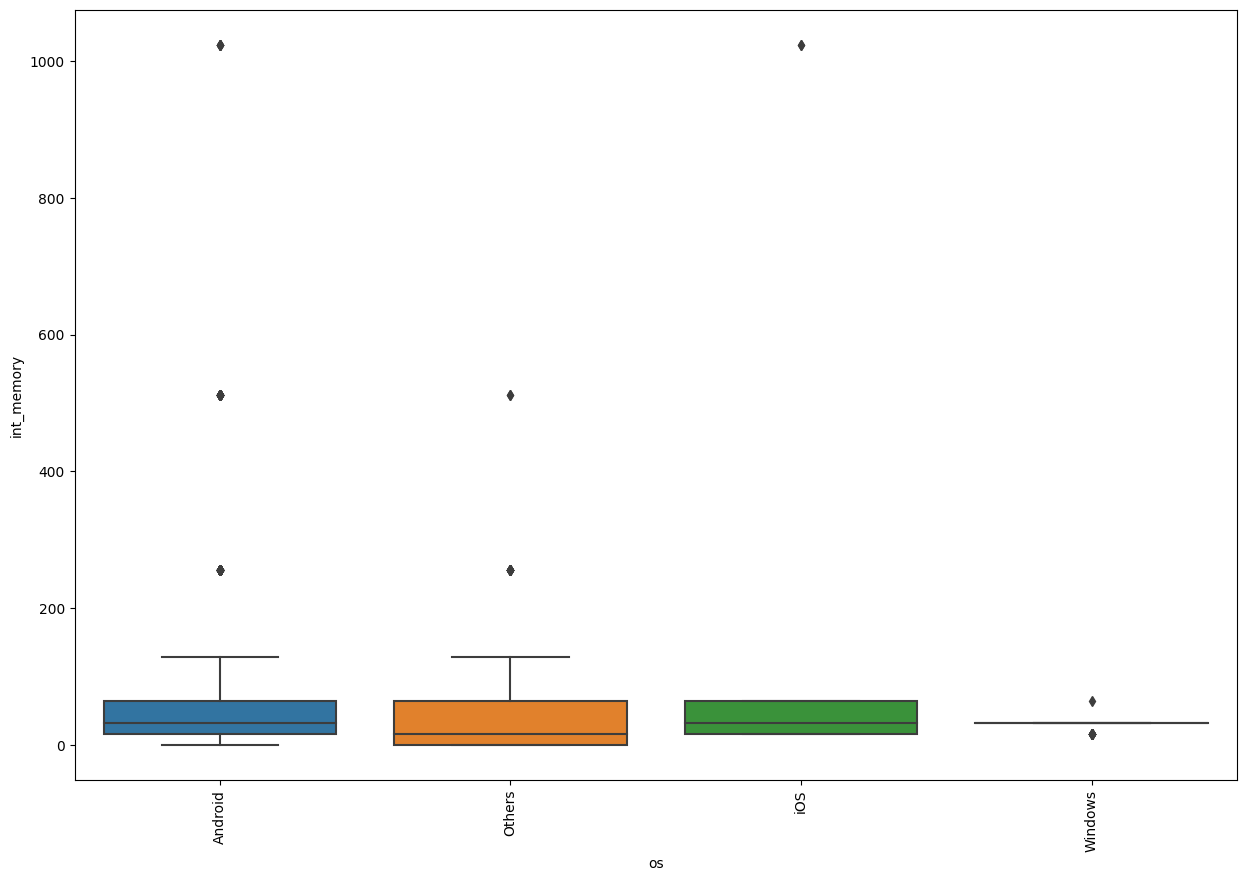

In [100]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="os", y="int_memory")
plt.xticks(rotation=90)
plt.show()

##### Observations
1.  Android, iOS and Windows have have the same mean internal memory sozes
2.  Others have the lowest mean internal memory sizes
3.  Windows have the least variance in internal memory sizes

### os vs ram

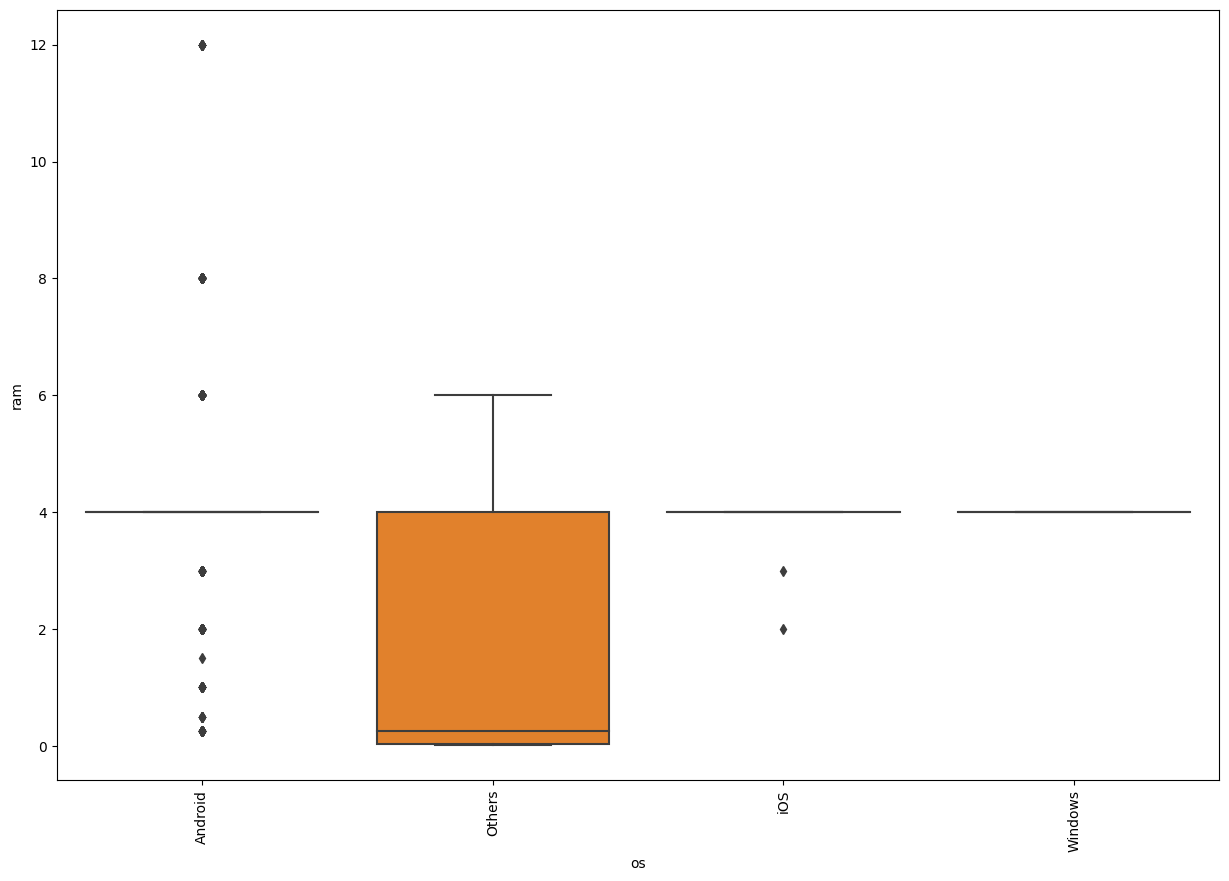

In [101]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="os", y="ram")
plt.xticks(rotation=90)
plt.show()

##### Observations
1.  Android, iOS and Windows have very little variation in internal memory sizes compared to the other devices, they also have the highest average RAM sizes at 4GB
2.  Others have to lowest RAM sizes with approximately 0.25GB

### os vs battery

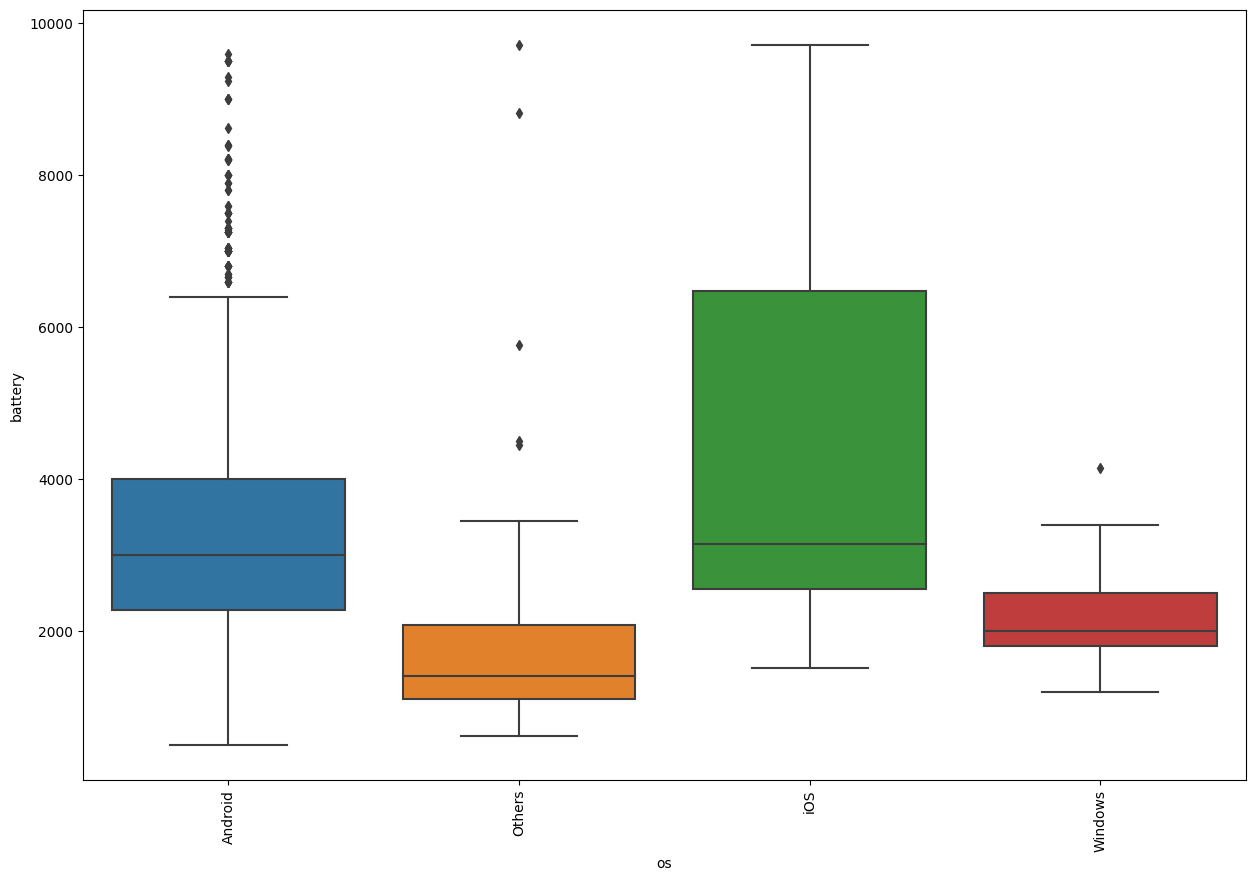

In [102]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="os", y="battery")
plt.xticks(rotation=90)
plt.show()

##### Observations
1.  iOS have the highest mean battery size with approx 3000mAh
2.  Others have the lowest battery size with approx 1000 mAh
3.  Android devices have many outliers

### os vs weight

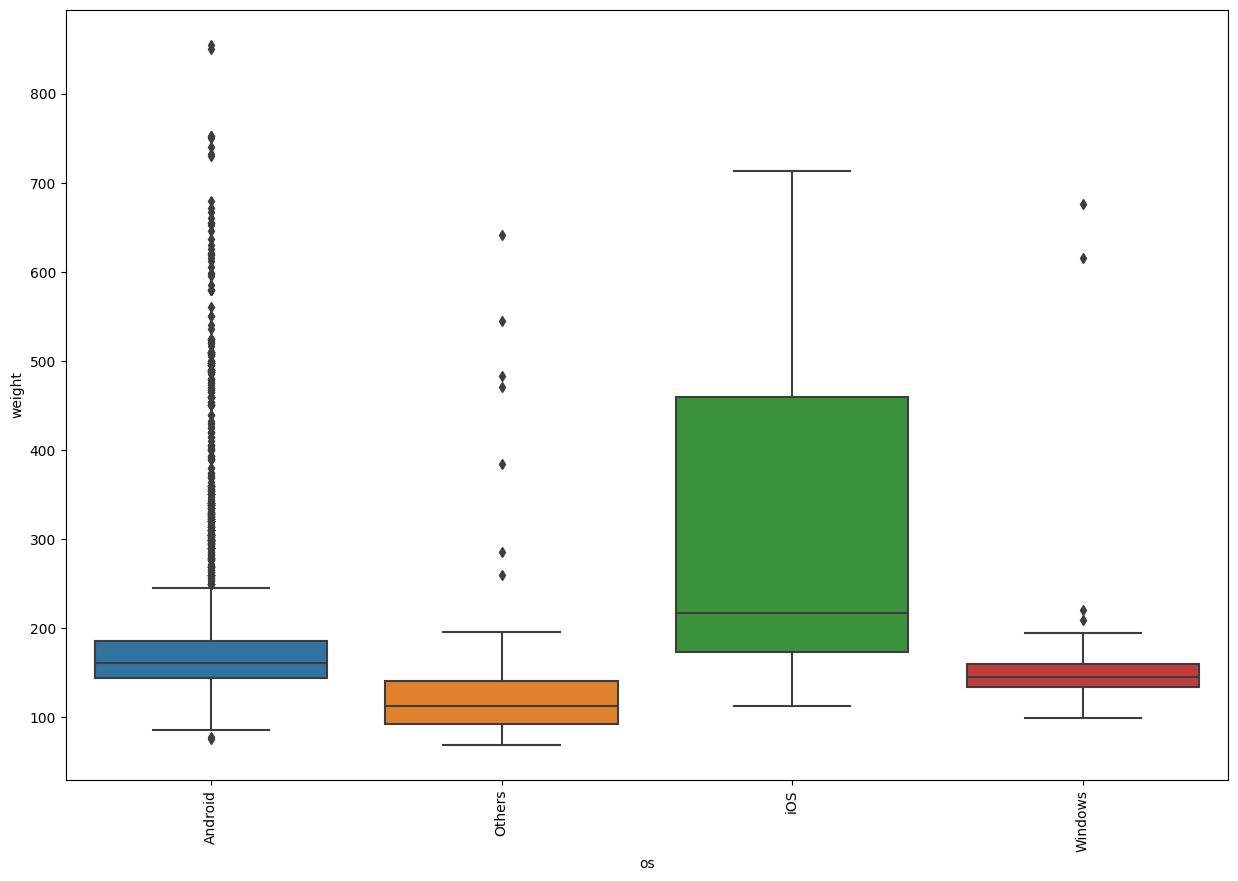

In [103]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="os", y="weight")
plt.xticks(rotation=90)
plt.show()

##### Observations
1.  iOS devices weigh the most
2.  Others weight the least
3.  Android devices have many outliers

### os vs screen_size

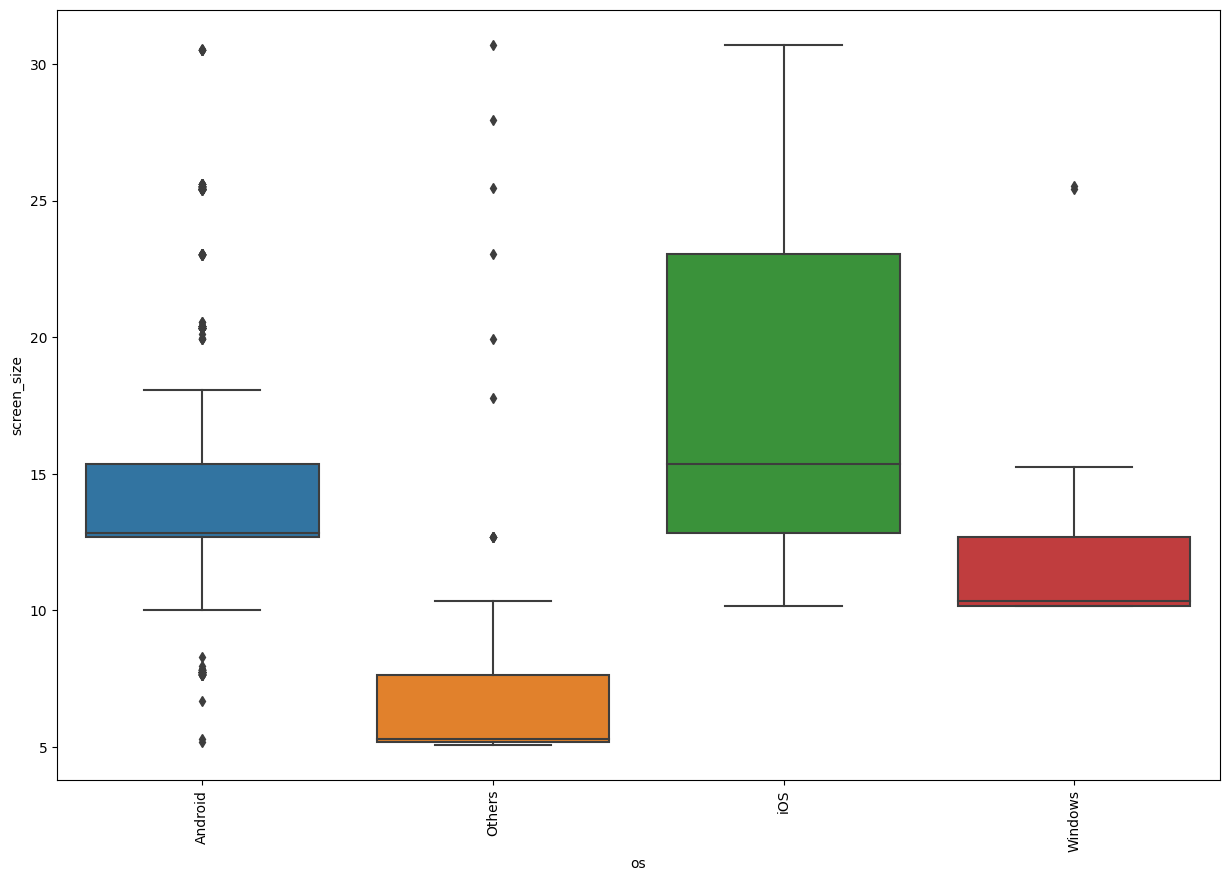

In [104]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="os", y="screen_size")
plt.xticks(rotation=90)
plt.show()

##### Observations
1.  iOS devices have the largest screen sizes 15cm on average
2.  Others have the smalles screen sizes 6cm on average

### os vs days_used

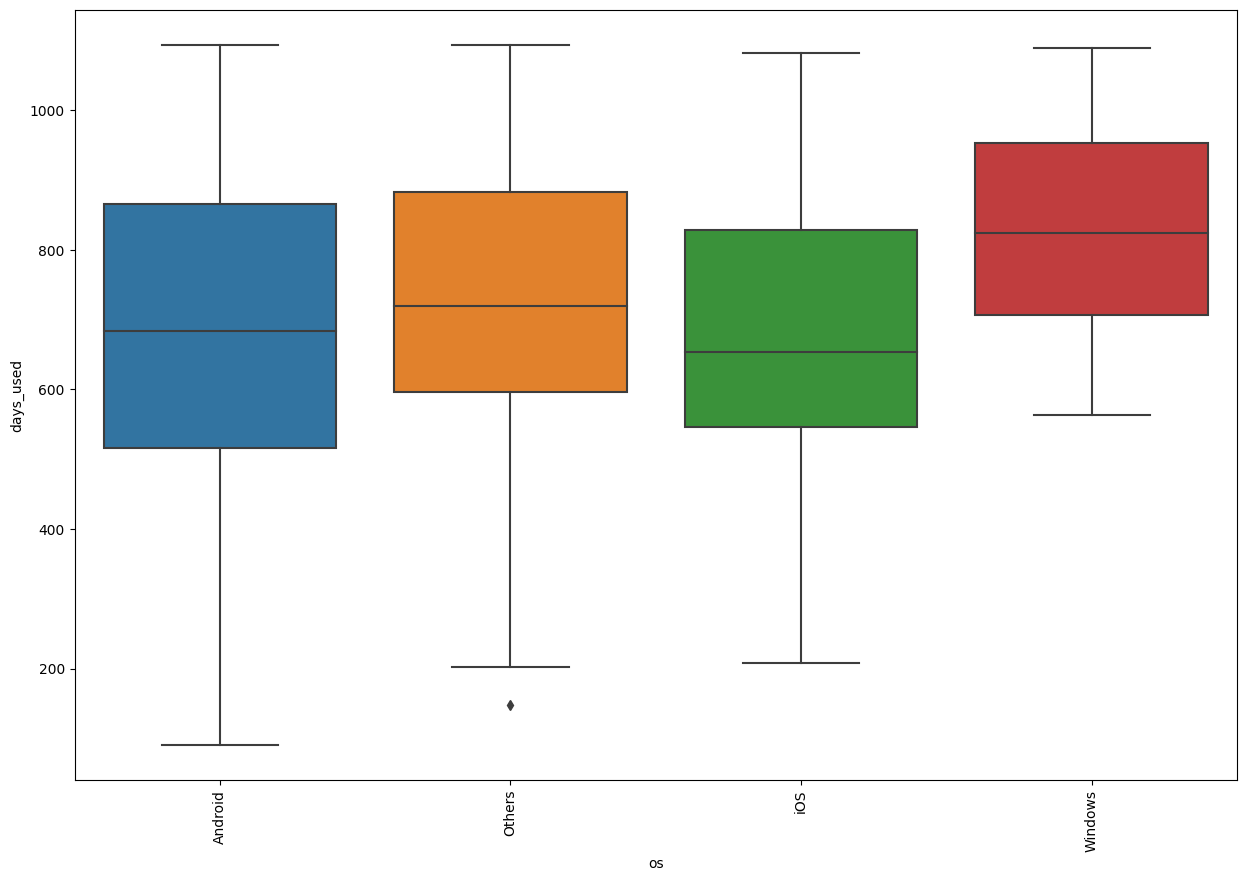

In [105]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="os", y="days_used")
plt.xticks(rotation=90)
plt.show()

##### Observations
1.  On verage, windows devices are used the most with approx 800 days.
2.  iOS devices are used the least with approx 700 days

### os vs normalized_new_price

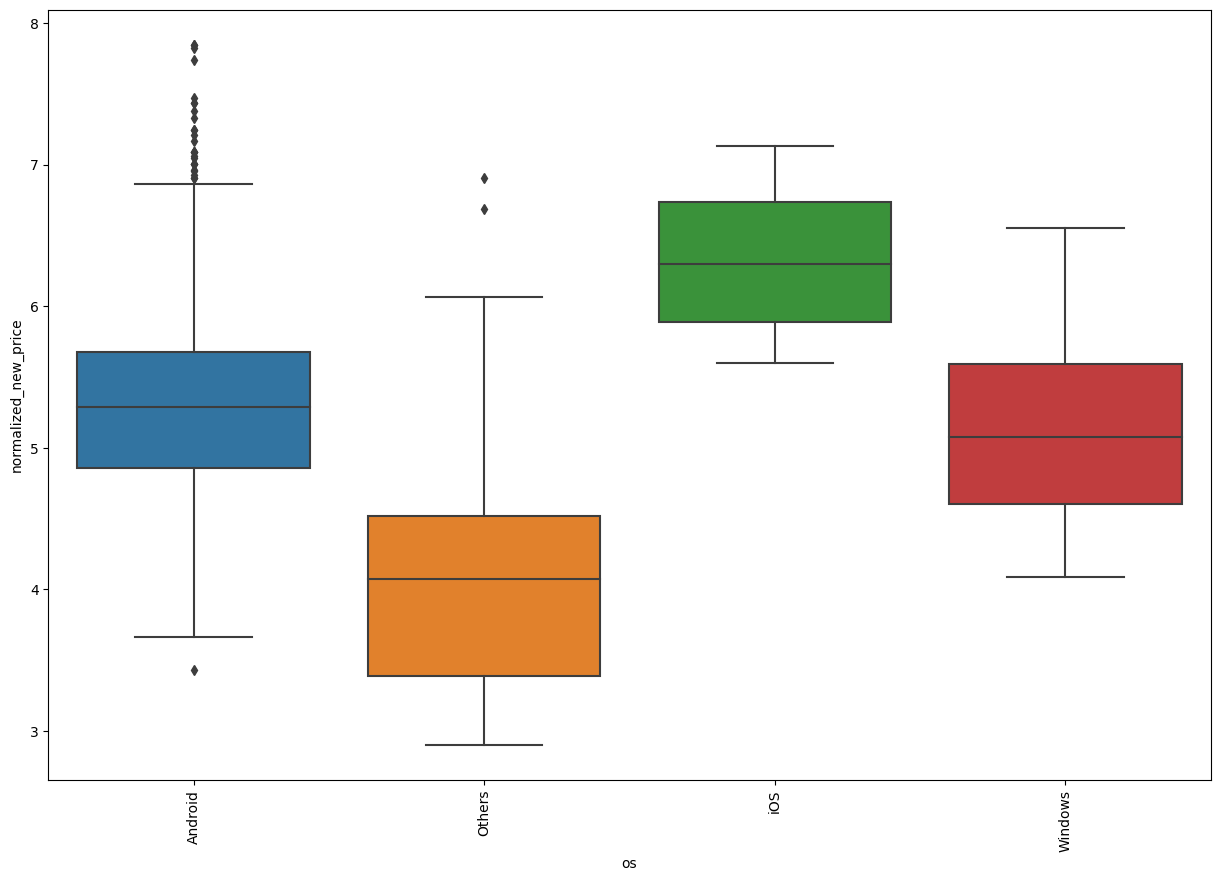

In [106]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="os", y="normalized_new_price")
plt.xticks(rotation=90)
plt.show()

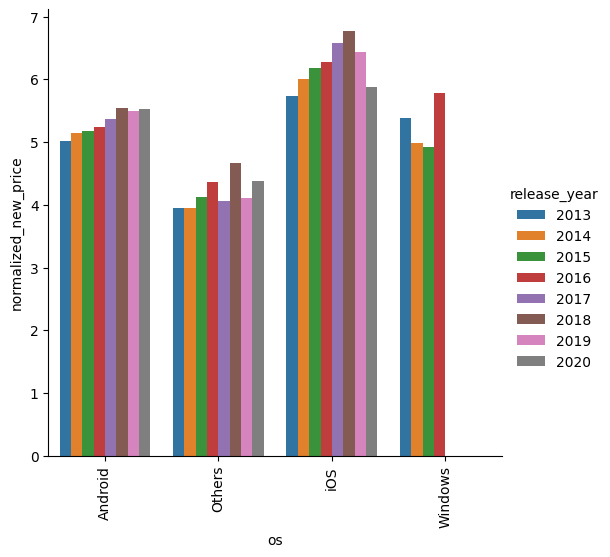

In [107]:
sns.catplot(data=df,x = 'os' , y = 'normalized_new_price', kind = "bar" , hue="release_year", ci = False); 
plt.xticks(rotation=90);
plt.show()

In [108]:
# checking the minimum year for windows brand
df[df["os"]=="Windows"]["release_year"].min()

2013

In [109]:
# checking the maximum year for windows brand
df[df["os"]=="Windows"]["release_year"].max()

2016

##### Observations
1. iOS devices have the highest normalized_new_prices with approx 6.5 euros approx
2. others have the least normalized_used_price with approximately 4 euros approx
3. The mean normalized_new_prices for Android and Windowes are very similar (5.4 and 5.2 respectively)
4. For Android devices, the normalized_new_price generally increased over the years, except for 2018 when the prices was highest
4. iOS devices increased in normalised_new_prices increased from 2013 to 2018 where it peaked and then prices dropped in 2019 and again in 2020
5. Others normalized_new_prices also peaked in 2018 and have the lowest prices in all the operating systems
6. Windows devices are available for 2013 to 2016 only.  The normalized_new_price peaked in 2016
7. iOS hav the higher normalized_new_prices

### os vs normalized_used_price

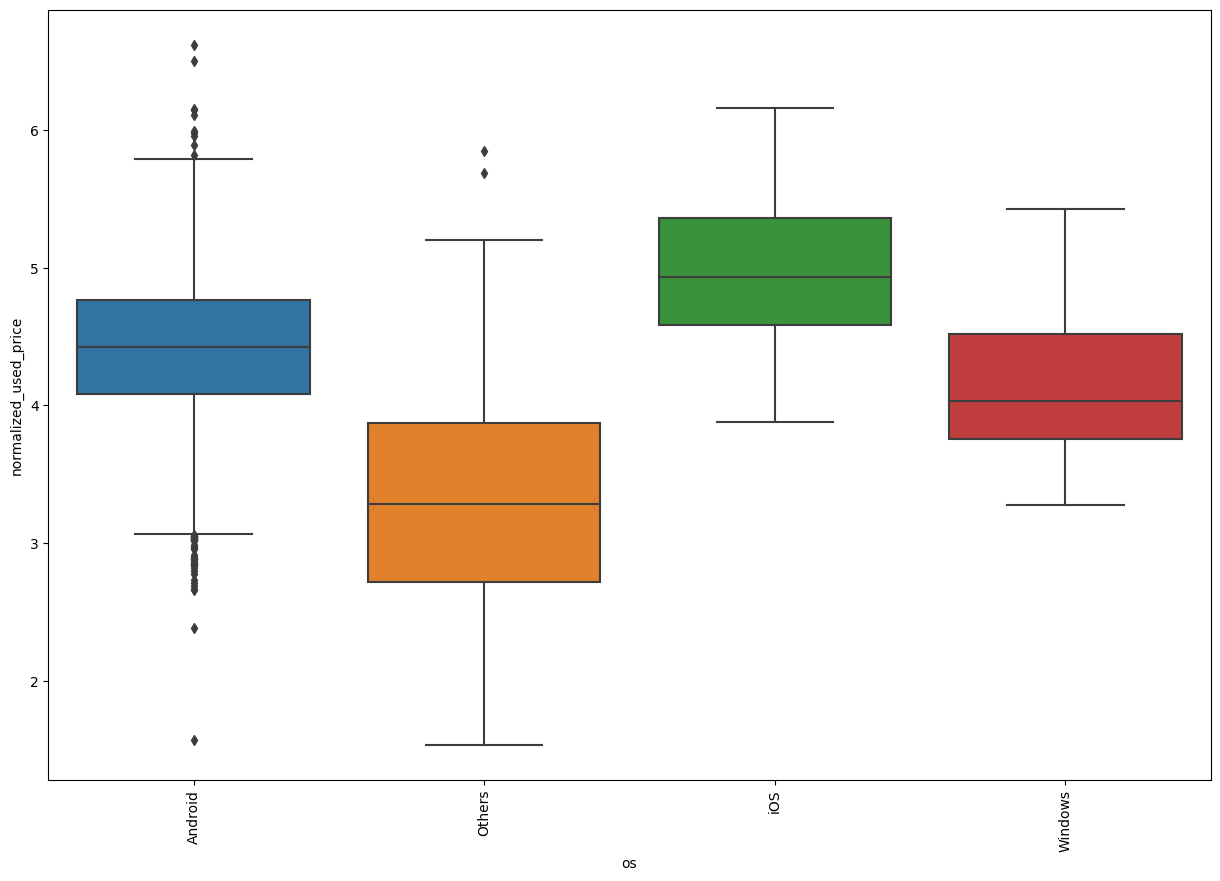

In [110]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="os", y="normalized_used_price")
plt.xticks(rotation=90)
plt.show()

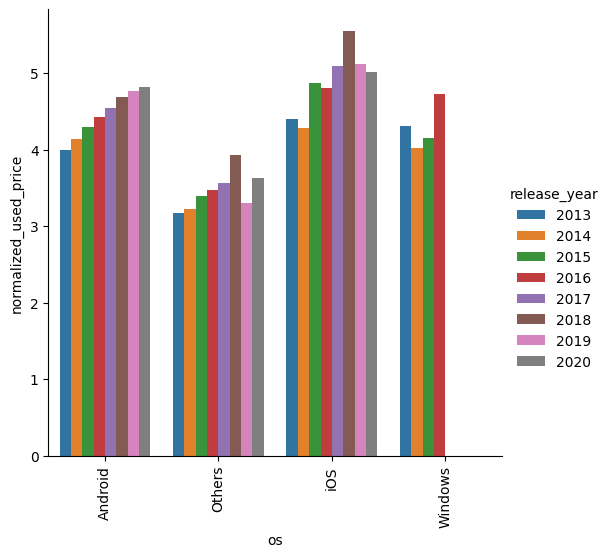

In [111]:
sns.catplot(data=df,x = 'os' , y = 'normalized_used_price', kind = "bar" , hue="release_year", ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1. iOS have the highest average normalised_used_price, approx 5 euros
2. Others have the lowest average normalised_used_price, approx 3.2 euros
3. Android normalized_used_prices increased over the years
4. iOS prices peaked in 2018 and then dropped after that
5. iOS have the highest prices over the years
6. Others normalized_used_prices also peaked in 2018 and have the lowest prices in all the operating systems
7. Windows  have normalized_used_prices for 2013 to 2016.  2016 was the highes prices for this operating system


### screen_size vs 4g

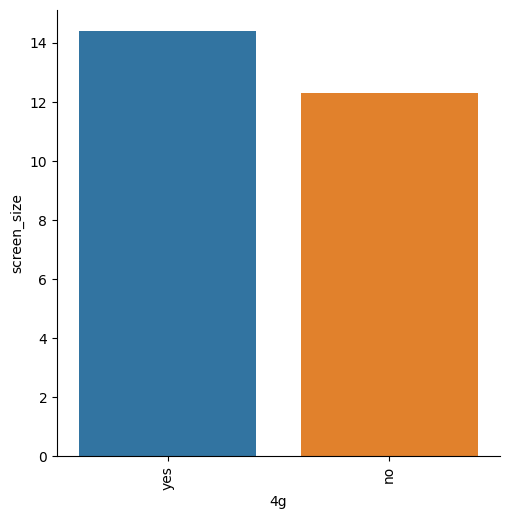

In [112]:
sns.catplot(data=df,x = '4g' , y = 'screen_size', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1. Devices with 4g tend to have bigger screen sizes, approx 14.5 cm

### screen_size vs 5g

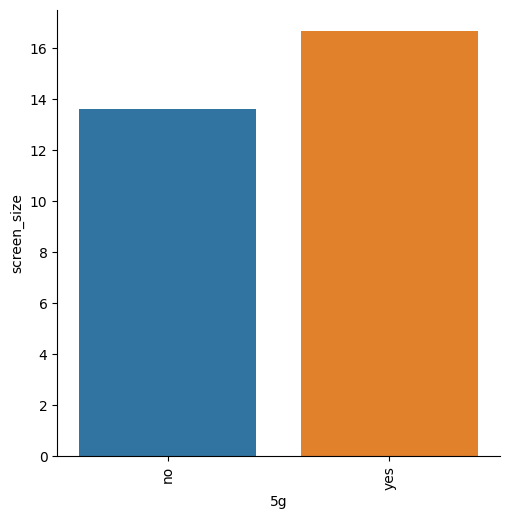

In [113]:
sns.catplot(data=df,x = '5g' , y = 'screen_size', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  Devices with 5g tend to have bigger screen sizes

### screen_size vs main_camera_mp

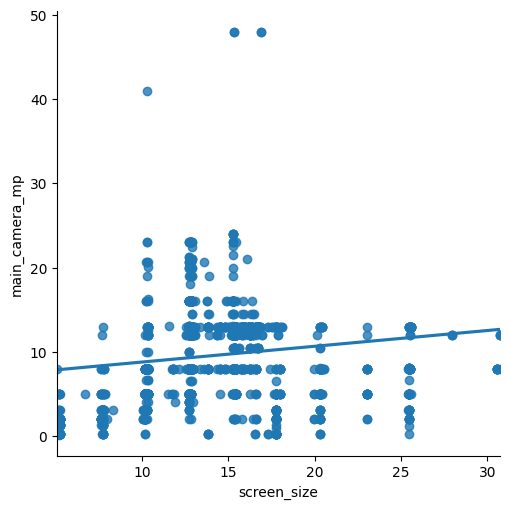

In [114]:
sns.lmplot(data=df, x='screen_size', y='main_camera_mp', ci=False);

### screen_size vs selfie_camera_mp

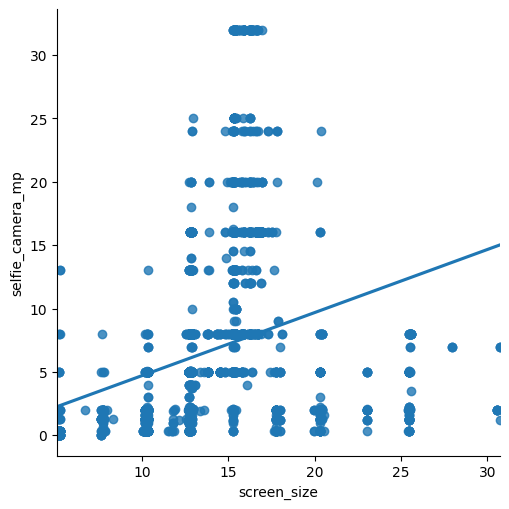

In [115]:
sns.lmplot(data=df, x='screen_size', y='selfie_camera_mp', ci=False);

##### Observations
1.  There seems to be a stronger relationship between screen_size and selfie_camera_mp then in main_camera_mp

### screen_size vs int_memory

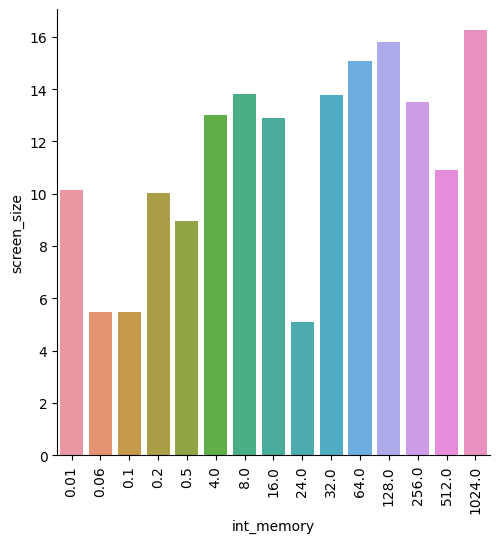

In [116]:
sns.catplot(data=df,x = 'int_memory' , y = 'screen_size', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1. This relationship appears to be bimodal
2. In general as the screen sizes increases so does the int_memory.
3. 24GB internal memory have approx 4.5 cm screen size

### screen_size vs ram

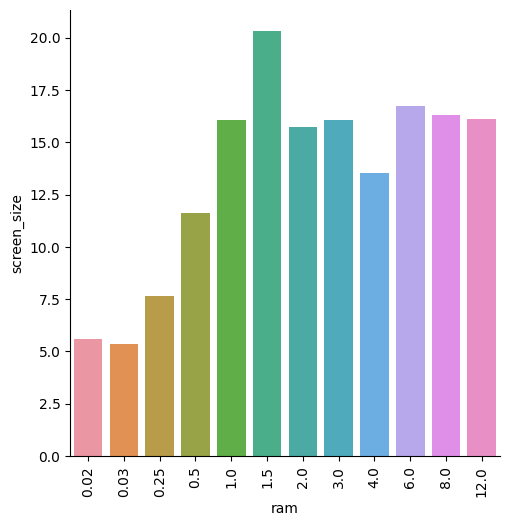

In [117]:
sns.catplot(data=df,x = 'ram' , y = 'screen_size', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  a RAM of 1.5GB hav the biggest screen_size with approx 20cm
2.  RAM of 0.02GB and 0.03GB have the smallest screen sizes with approx 5.5cm

### screen_size vs battery

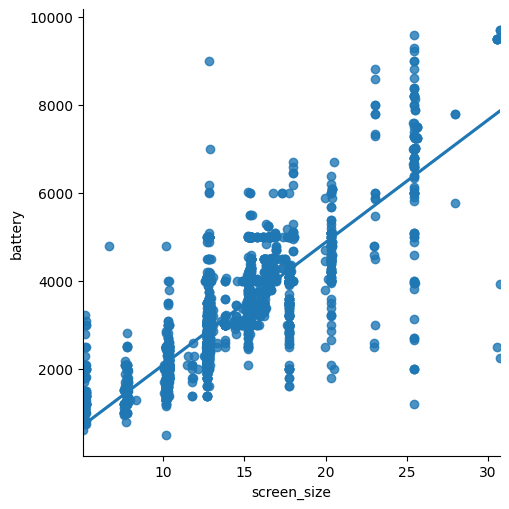

In [118]:
sns.lmplot(data=df, x='screen_size', y='battery', ci=False);

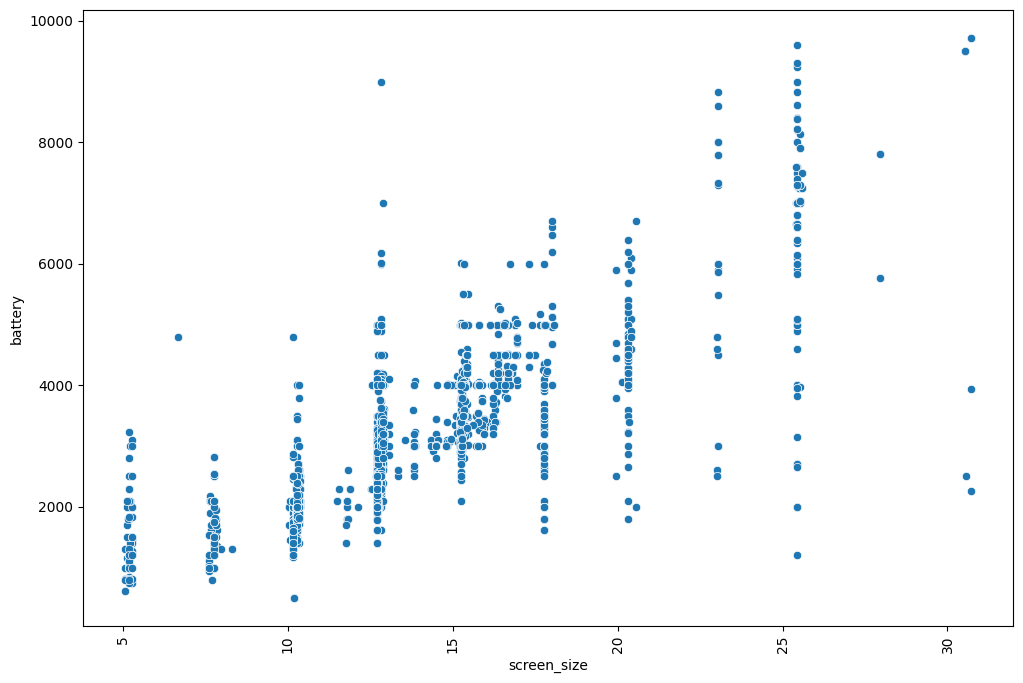

In [119]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,x = 'screen_size' , y = 'battery');
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  There is positive correlations between screen size and battery

### screen_size vs weight

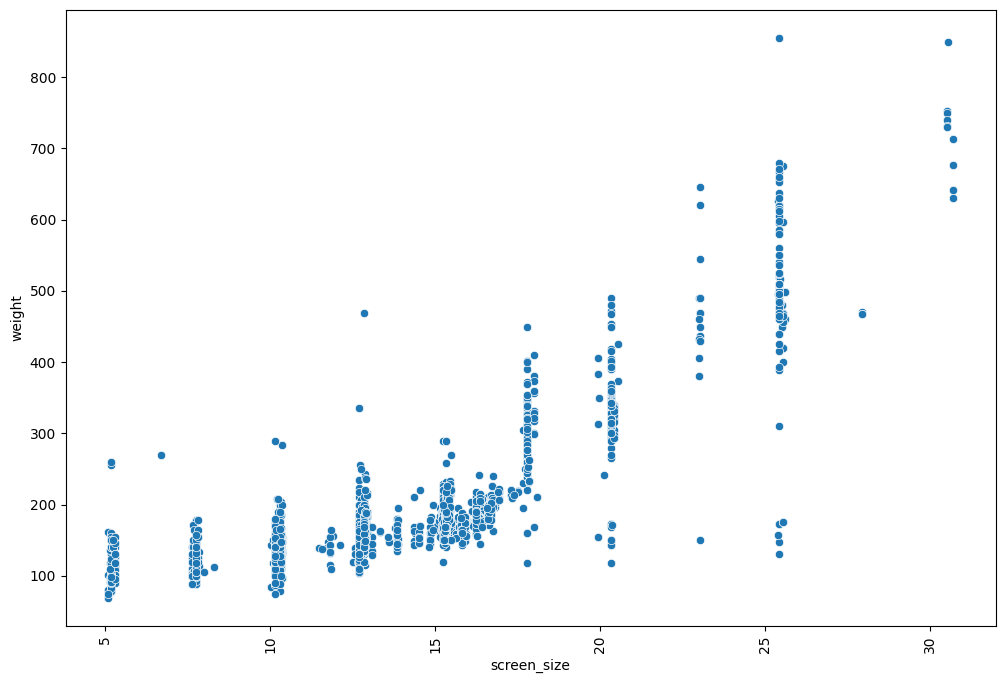

In [120]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,x = 'screen_size' , y = 'weight');
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  There is a positive correlation between screen_size and weight

### screen_size vs release_year

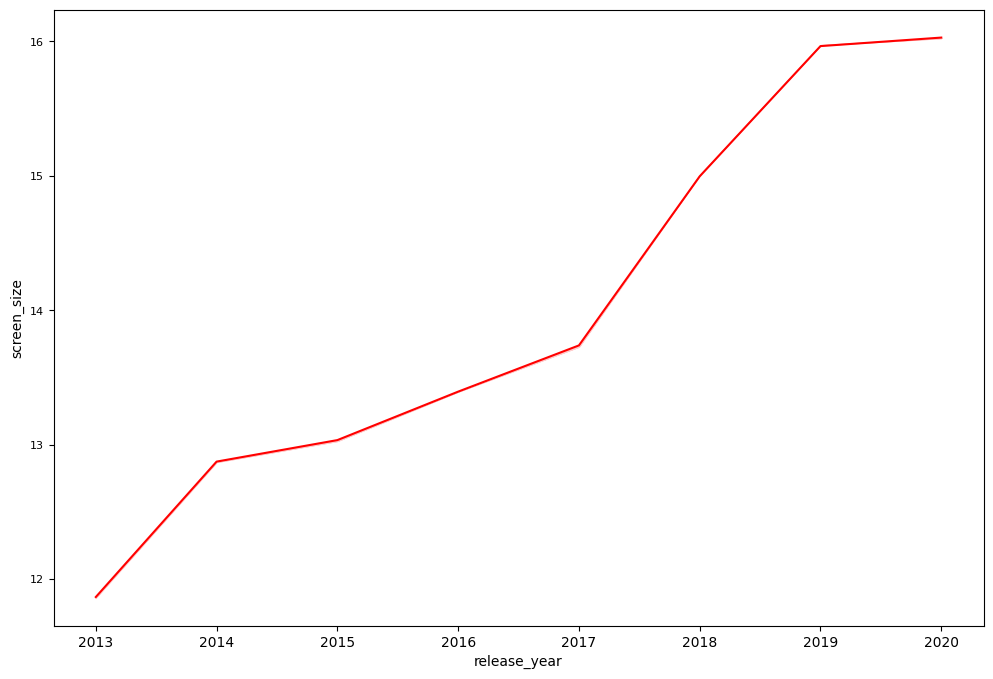

In [121]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x="release_year", y="screen_size", ci=False, color="red")
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

##### Observations
1.  Screen sizes increases over the years
2.  2015,2016 and 2017 had little variation in screen sizes as compared to the remaining years

### screen_size vs days_used

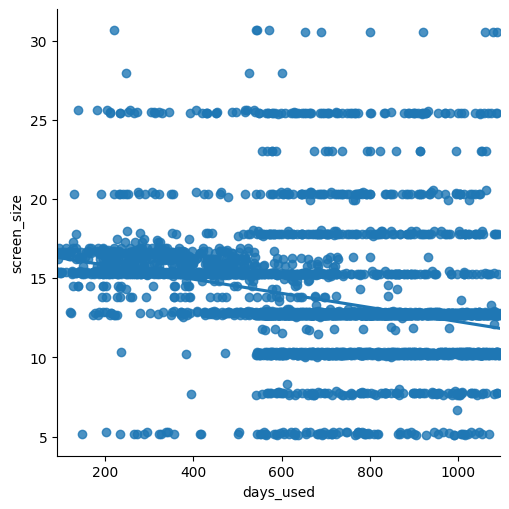

In [122]:
sns.lmplot(data=df, x='days_used', y='screen_size', ci=False);

### screen_size vs normalized_new_price

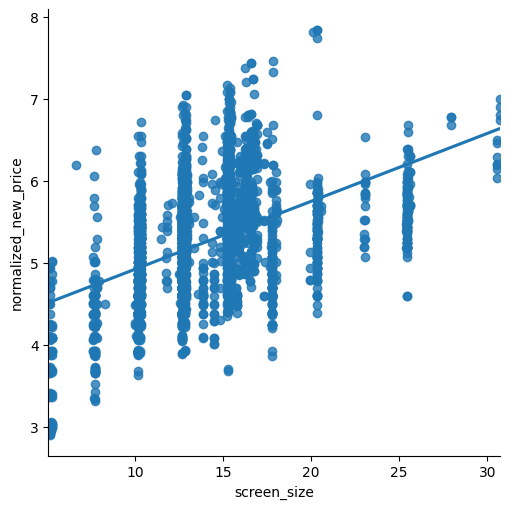

In [123]:
sns.lmplot(data=df, x='screen_size', y='normalized_new_price', ci=False);

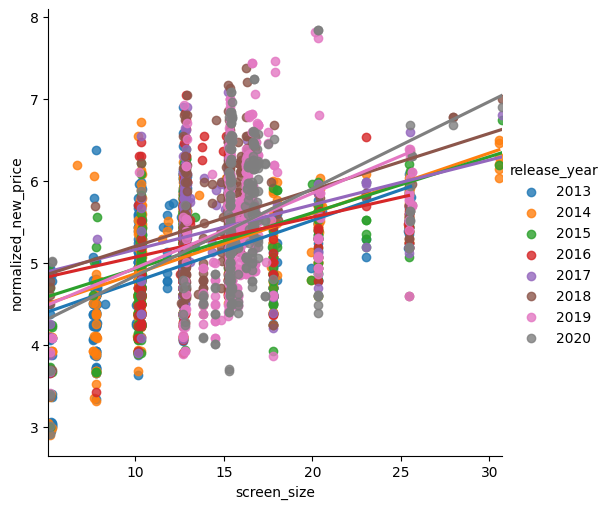

In [124]:
sns.lmplot(data=df, x='screen_size', y='normalized_new_price', hue = "release_year", ci=False);

##### Observations
1. As screen_size increases the normalized_new_price also increases, there is a positive correlation
2. This trend remains for each year


### screen_size vs normalized_used_price

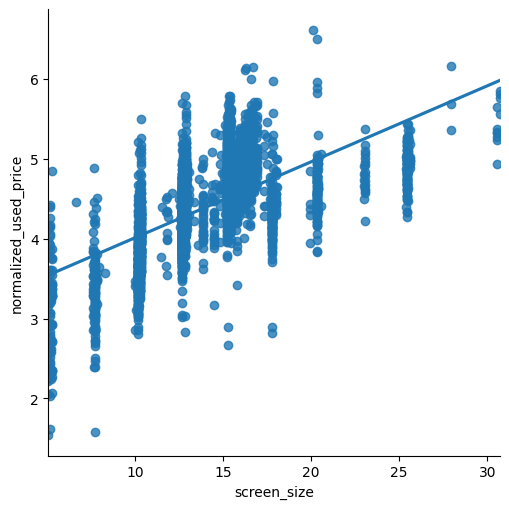

In [125]:
sns.lmplot(data=df, x='screen_size', y='normalized_used_price', ci=False);

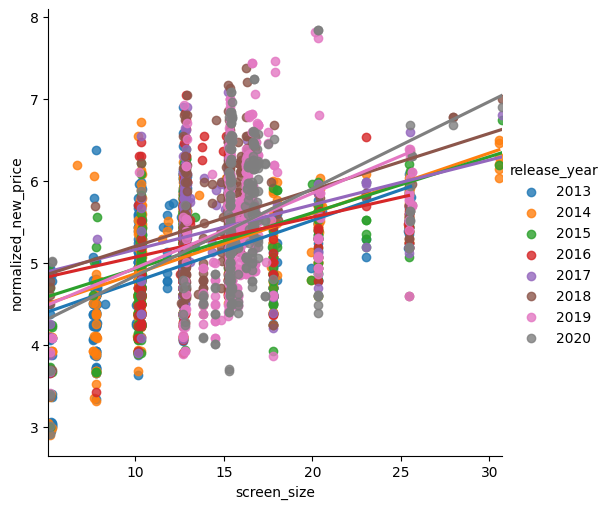

In [126]:
sns.lmplot(data=df, x='screen_size', y='normalized_new_price', hue = "release_year", ci=False);

##### Observations
##### Observations
1. As screen_size increases the normalized_used_price also increases, there is a positive correlation
2. This trend remains for each year


### 4g vs 5g

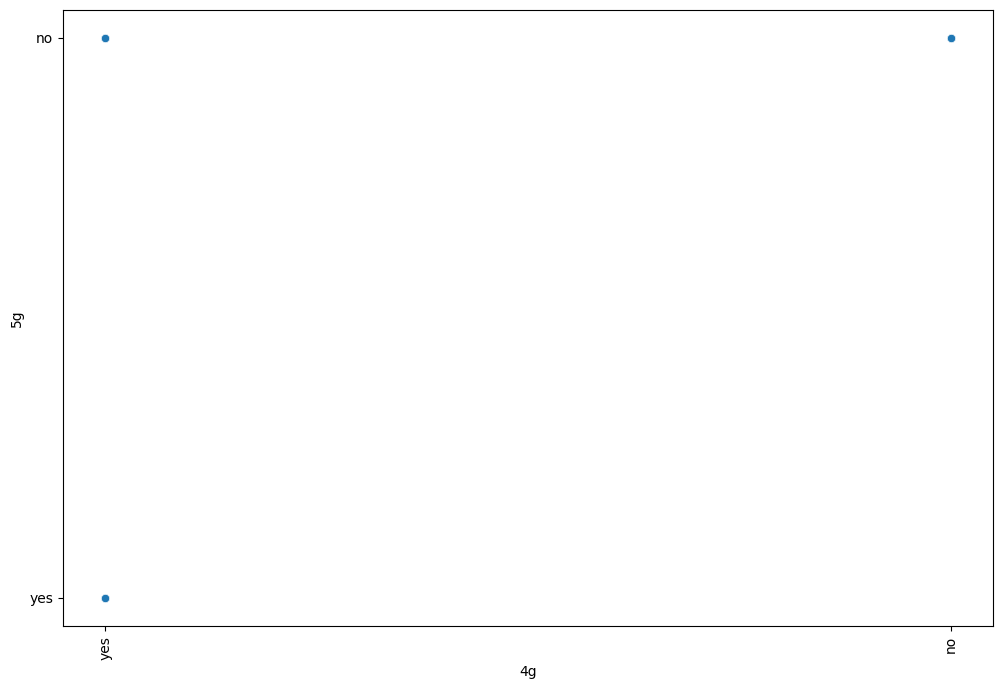

In [127]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,x = '4g' , y = '5g');
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  Devices can be both 4g and 5g
2.  No devices have no 4g and no 5g

### 4g vs main_camera_mp

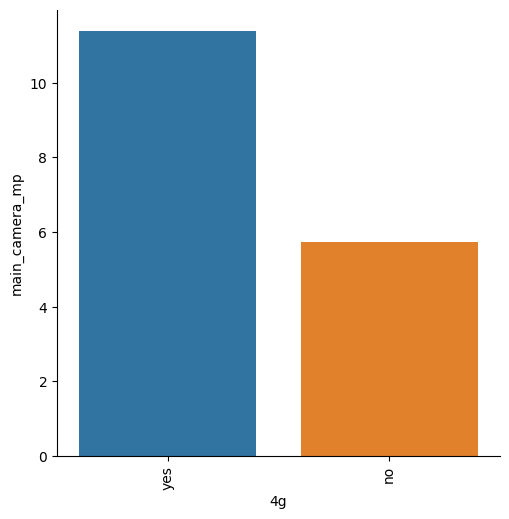

In [128]:
sns.catplot(data=df,x = '4g' , y = 'main_camera_mp', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

### 4g vs selfie_camera_mp

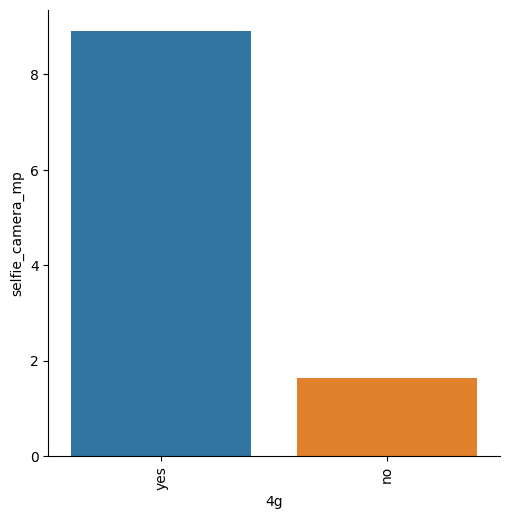

In [129]:
sns.catplot(data=df,x = '4g' , y = 'selfie_camera_mp', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  main_camera_mp and selfie_camera_mp are bigger in 4g devices (approx 12cm and 9cm respectively)

### 4g vs int_memory

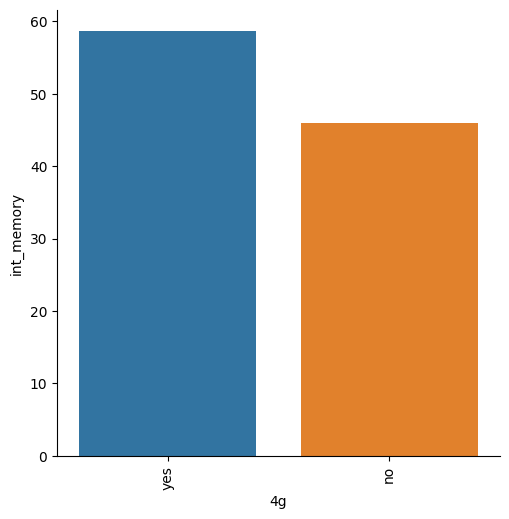

In [130]:
sns.catplot(data=df,x = '4g' , y = 'int_memory', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  4g devices have more internal memory approx 58GB

### 4g vs ram

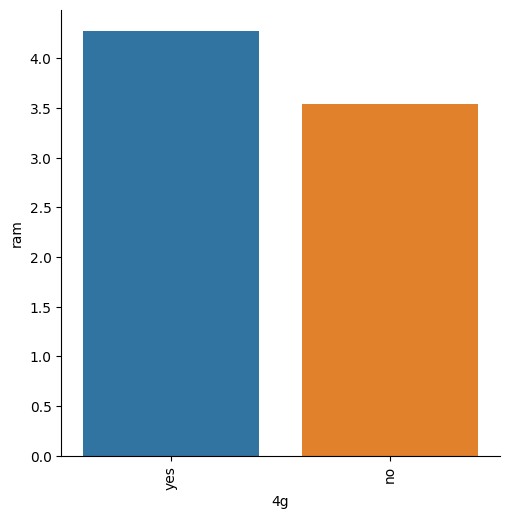

In [131]:
sns.catplot(data=df,x = '4g' , y = 'ram', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  4g devices have more RAM approx 4.5GB

### 4g vs battery

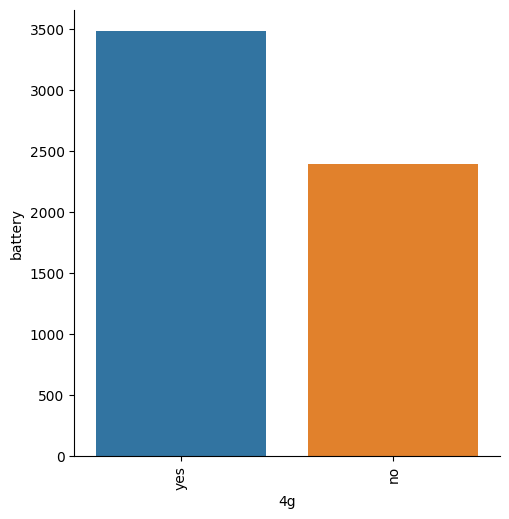

In [132]:
sns.catplot(data=df,x = '4g' , y = 'battery', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  4g devices have more battery approx 3500mAh

### 4g vs weight

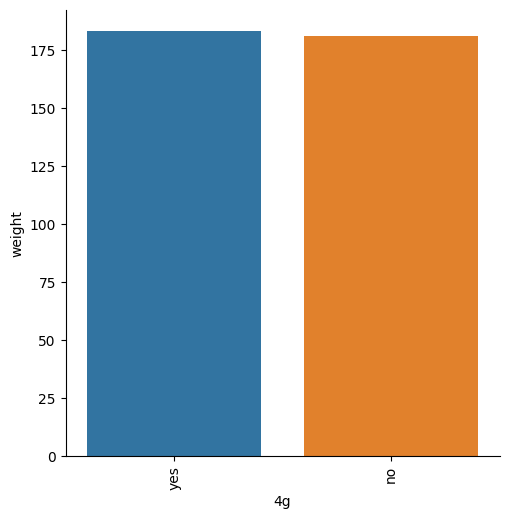

In [133]:
sns.catplot(data=df,x = '4g' , y = 'weight', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  4g and no 4g devices have approx the same weight approx 180g

### 4g vs release_year

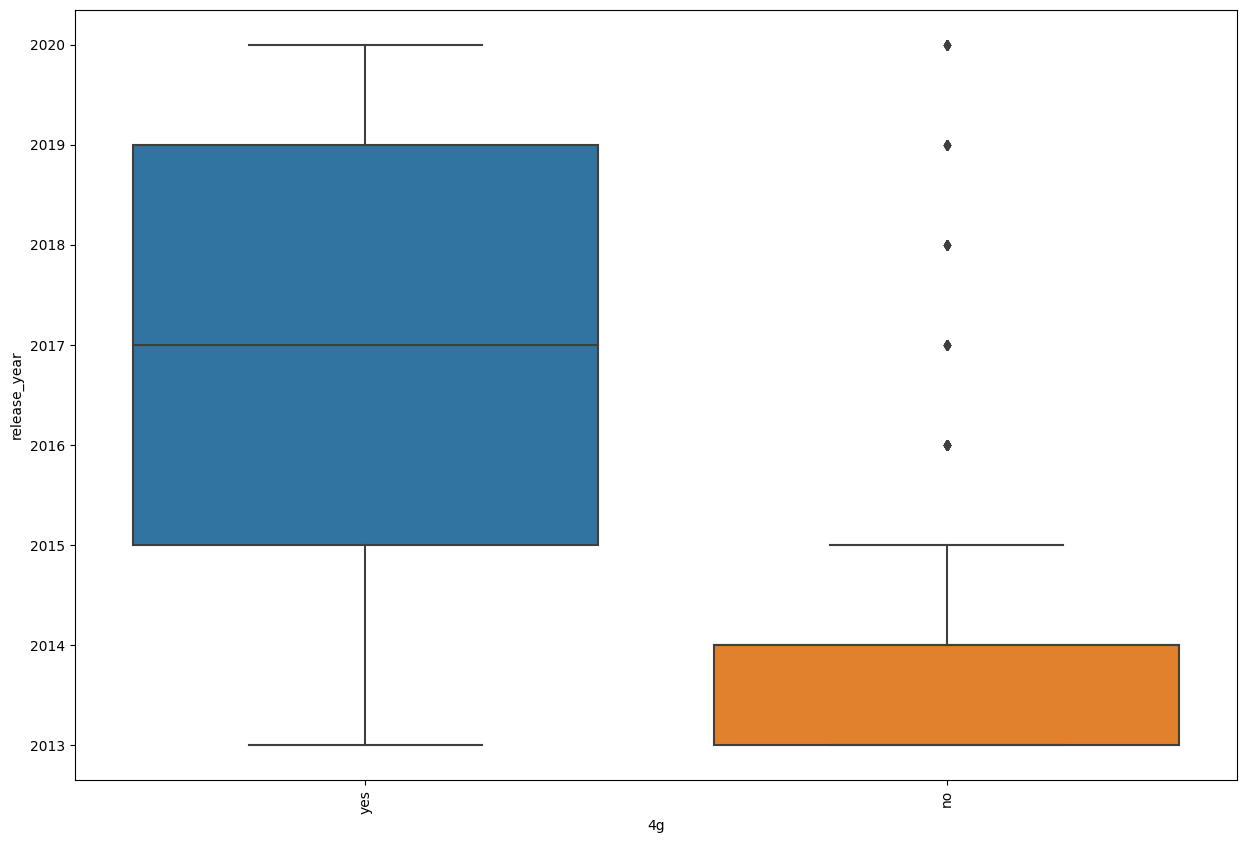

In [134]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="4g", y="release_year")
plt.xticks(rotation=90)
plt.show()

##### Observations
1.  The no 4g devices are the older devices, from 2013 to 2015
2.  The average release_year for 4g devicecs is 2017, the range of years for 4g is from 2103 to 2020

### 4g vs days_used

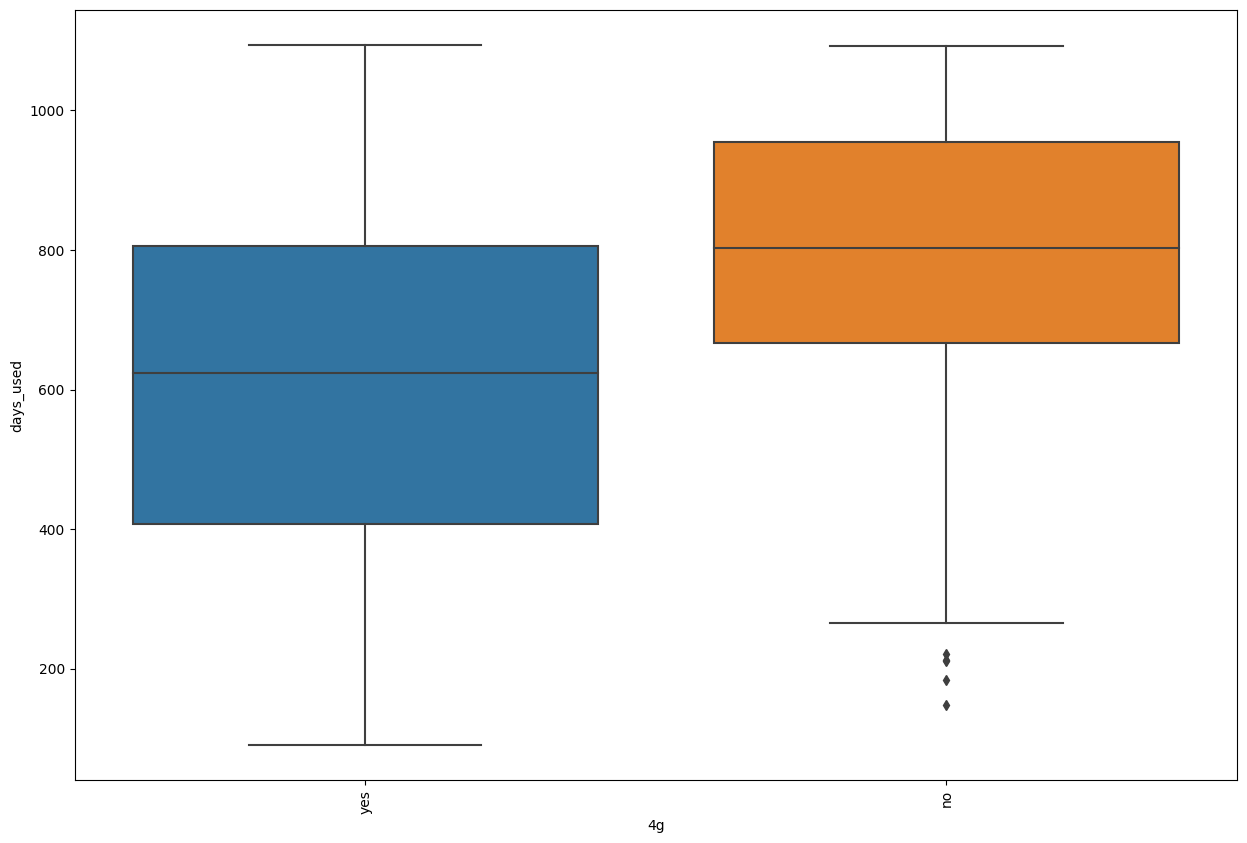

In [135]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="4g", y="days_used")
plt.xticks(rotation=90)
plt.show()

##### Observations
1.  4g devices was used less than no 4g devices (approx 600 days and 800 days respectively)

### 4g vs normalized_used_price

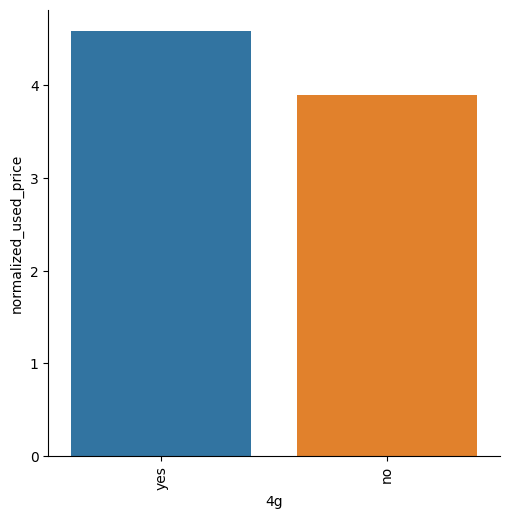

In [136]:
sns.catplot(data=df,x = '4g' , y = 'normalized_used_price', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

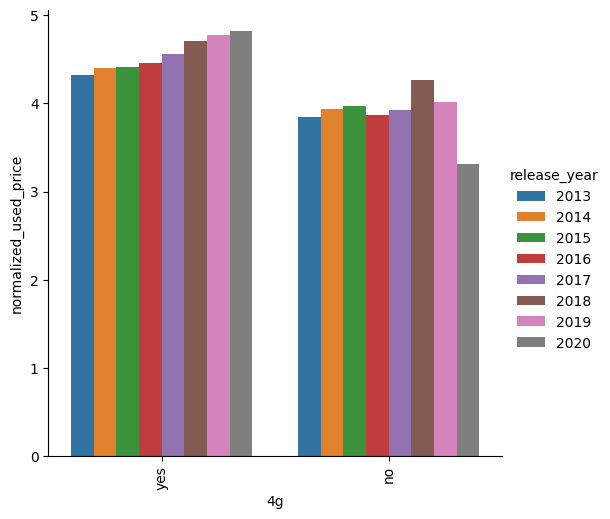

In [137]:
sns.catplot(data=df,x = '4g' , y = 'normalized_used_price', kind = "bar" , hue="release_year", ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  The normalized_used_price is higher for 4g device than for non 4g devices
2.  normalized_used_prices have increased iver the years for 4g devices
3.  For no 4g devices, prices increases until 2018 and then decreased

### 4g vs normalized_new_price

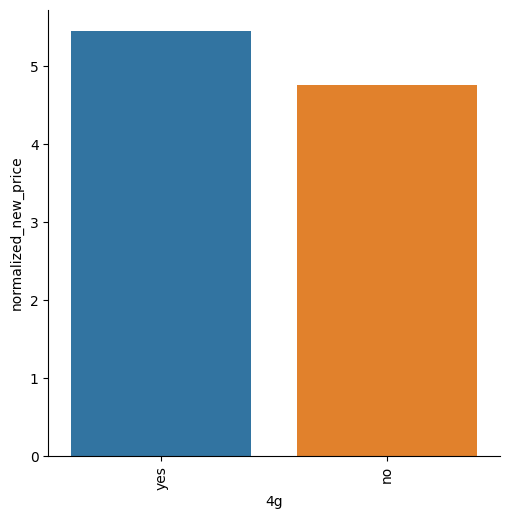

In [138]:
sns.catplot(data=df,x = '4g' , y = 'normalized_new_price', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

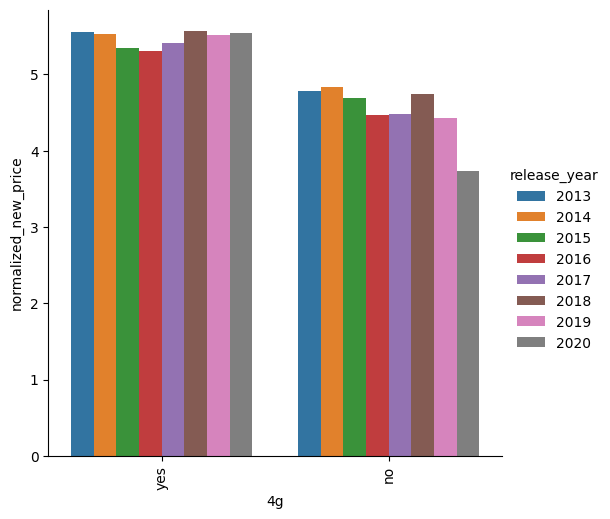

In [139]:
sns.catplot(data=df,x = '4g' , y = 'normalized_new_price', kind = "bar" , hue="release_year", ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  The normalized_new_price is higher for 4g device than for non 4g devices
2.  normalized_used_prices from 4g devices decreased from 2013 to 2016 then increased to 2018 after wich it decreased again
3.  For no 4g devices, prices decresed until 2018 where prices increased then decreased till 2020

### 5g vs main_camera_mp

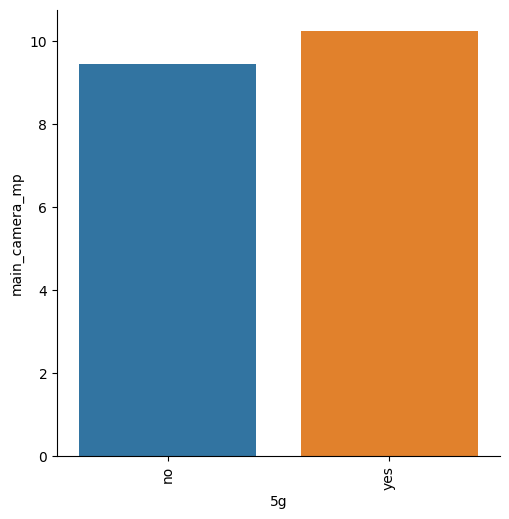

In [140]:
sns.catplot(data=df,x = '5g' , y = 'main_camera_mp', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

### 5g vs selfie_camera_mp

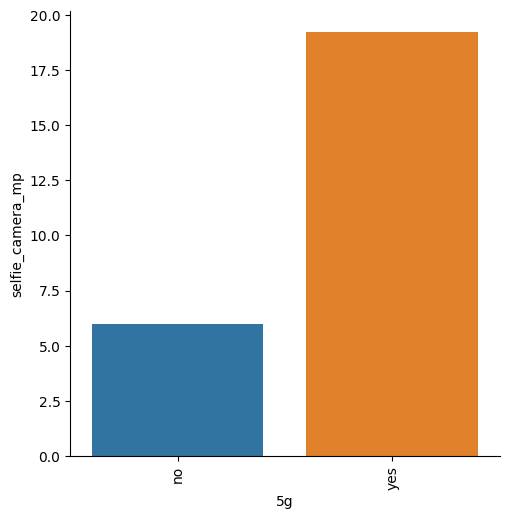

In [141]:
sns.catplot(data=df,x = '5g' , y = 'selfie_camera_mp', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  5g devices have higher main camera and selfie camera resolutions.
2.  the difference in selfie camera resolutions in 5g and non 5g devices is approx 14mp, wehere as the same difference for the main camera is approx 1mp

### 5g vs int_memory

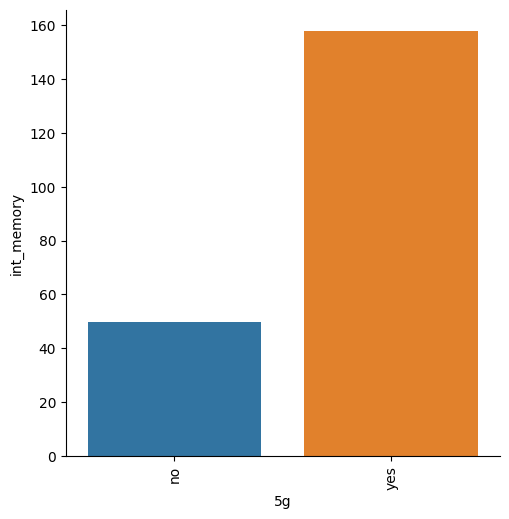

In [142]:
sns.catplot(data=df,x = '5g' , y = 'int_memory', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  5g devices have more internal memory approx 160GB

### 5g vs ram

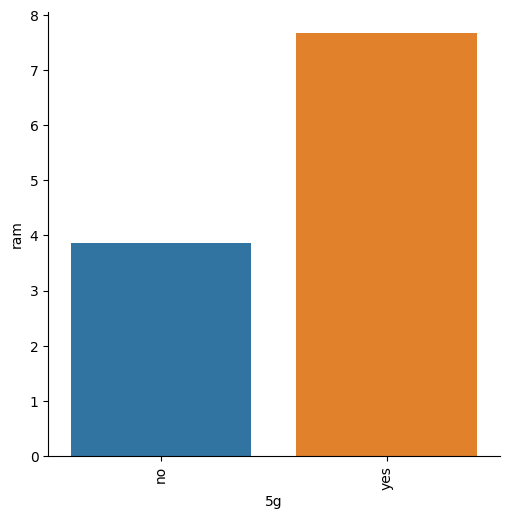

In [143]:
sns.catplot(data=df,x = '5g' , y = 'ram', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  5g devices have more RAM approx 8GB as comapred to non 5g devices with 4GB

### 5g vs battery

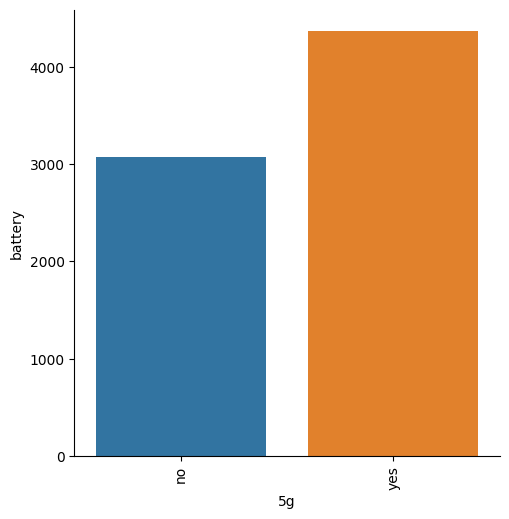

In [144]:
sns.catplot(data=df,x = '5g' , y = 'battery', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  5g devices have more battery power approx 4500mAh as comapred to non 5g devices with 3000mAh

### 5g vs weight

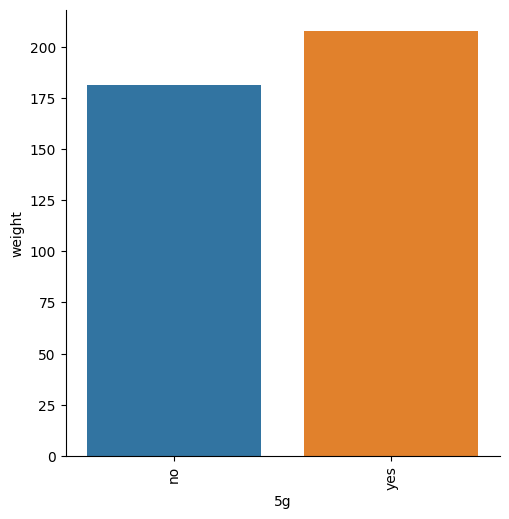

In [145]:
sns.catplot(data=df,x = '5g' , y = 'weight', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  5g devices have more weight  approx 215g as comapred to non 5g devices with 180g

### 5g vs release_year

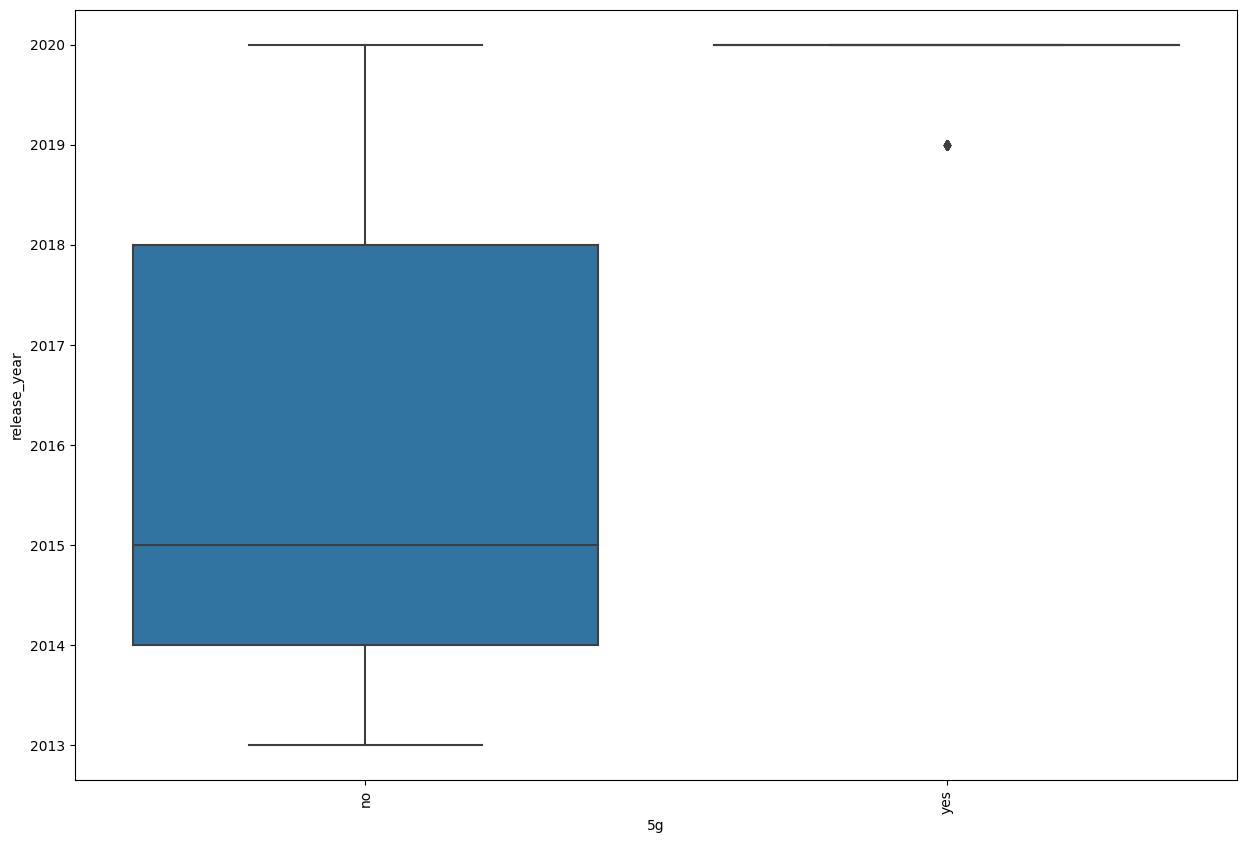

In [146]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="5g", y="release_year")
plt.xticks(rotation=90)
plt.show()

##### Observations
1.  Most of the 5g devices was released in 2020
2.  The non 5g devices was released from 2013 to 2020

### 5g vs days_used

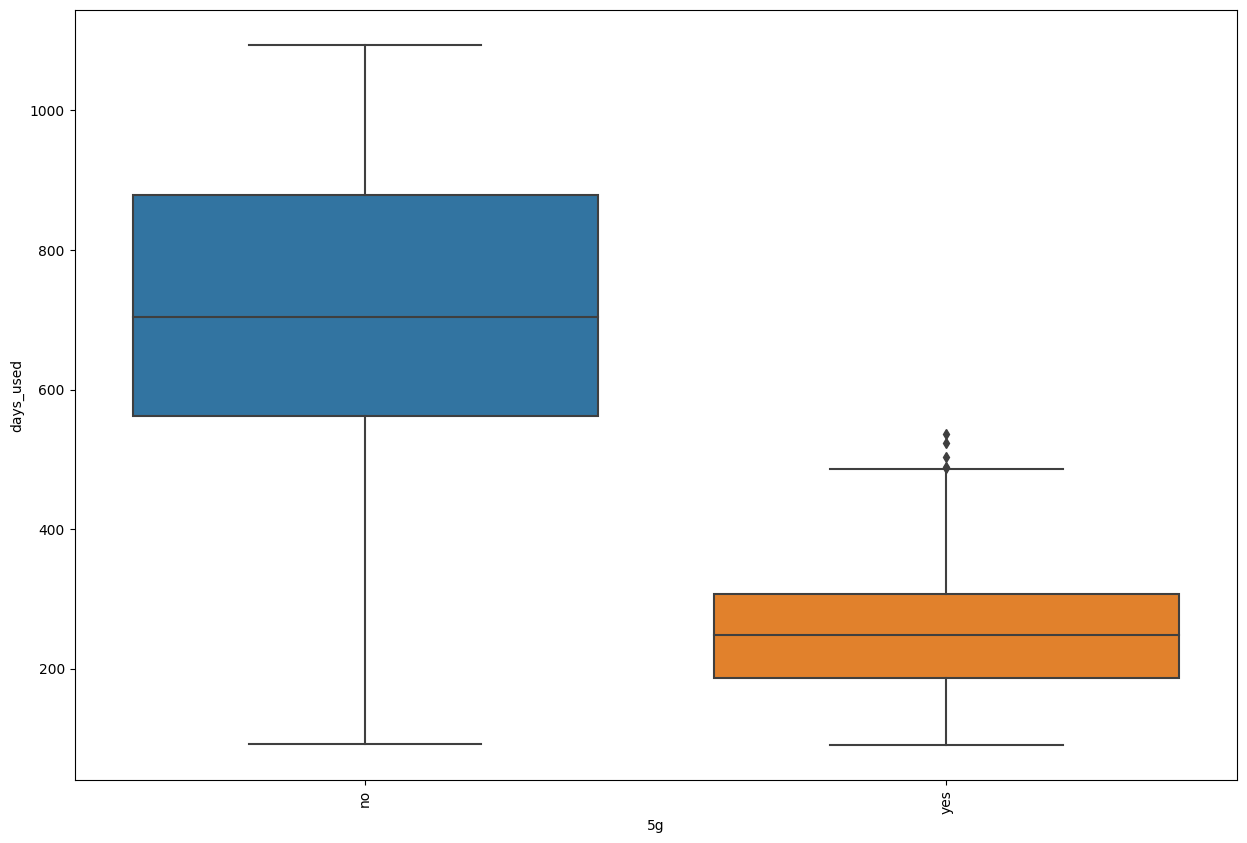

In [147]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="5g", y="days_used")
plt.xticks(rotation=90)
plt.show()

##### Observations
1. 5G devices was used much less than non 5g devices.  On average 5g devices was used 250 days and non 5g devices on average was used 700 days

### 5g vs normalized_new_price

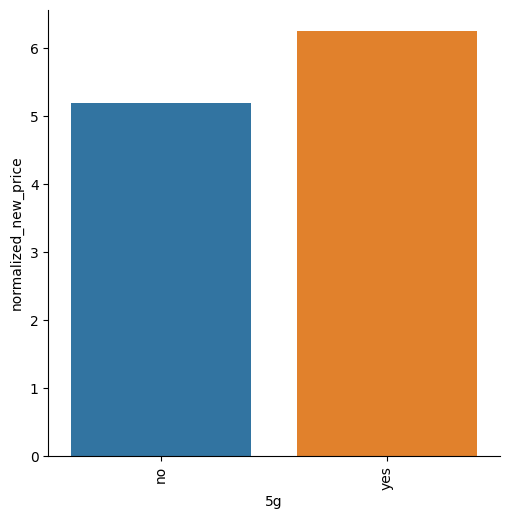

In [148]:
sns.catplot(data=df,x = '5g' , y = 'normalized_new_price', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

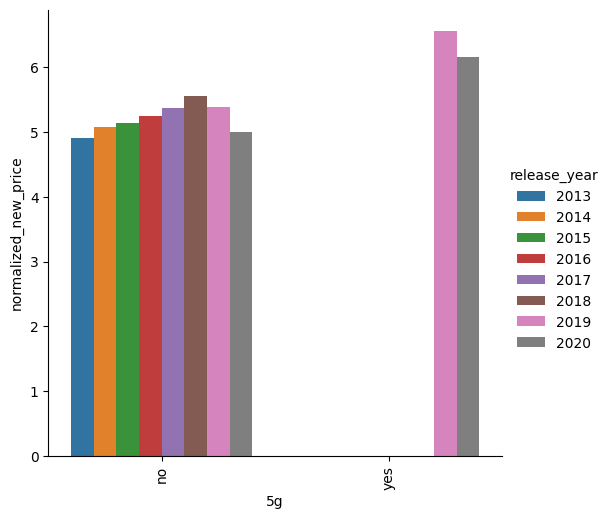

In [149]:
sns.catplot(data=df,x = '5g' , y = 'normalized_new_price', kind = "bar" , hue="release_year", ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  The normalized_new_price is higher for 5g device than for non 4g devices
2.  normalized_used_prices from 5g devices decreased from 2019 to 2020 then increased to 2018 after wich it decreased again.  5g devices were only available for 2019 and 2020
3.  For non 5g devices, prices increased until 2018 where prices decreased then decreased till 2020

### 5g vs normalized_used_price

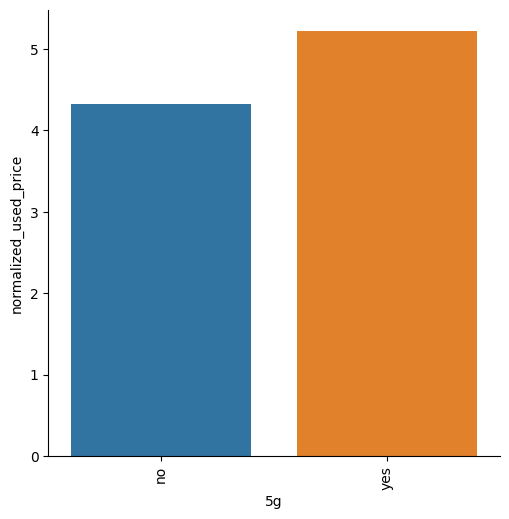

In [150]:
sns.catplot(data=df,x = '5g' , y = 'normalized_used_price', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

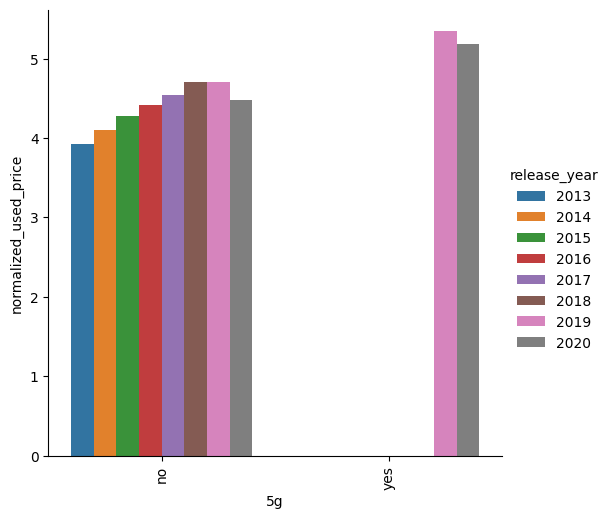

In [151]:
sns.catplot(data=df,x = '5g' , y = 'normalized_used_price', kind = "bar" , hue="release_year", ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  The normalized_used_price is higher for 5g device than for non 5g devices
2.  normalized_used_prices have decreased over the years for 5g devices
3.  For no 5g devices, prices increases until 2019 and then decreased

### main_camera_mp vs selfie_camera_mp

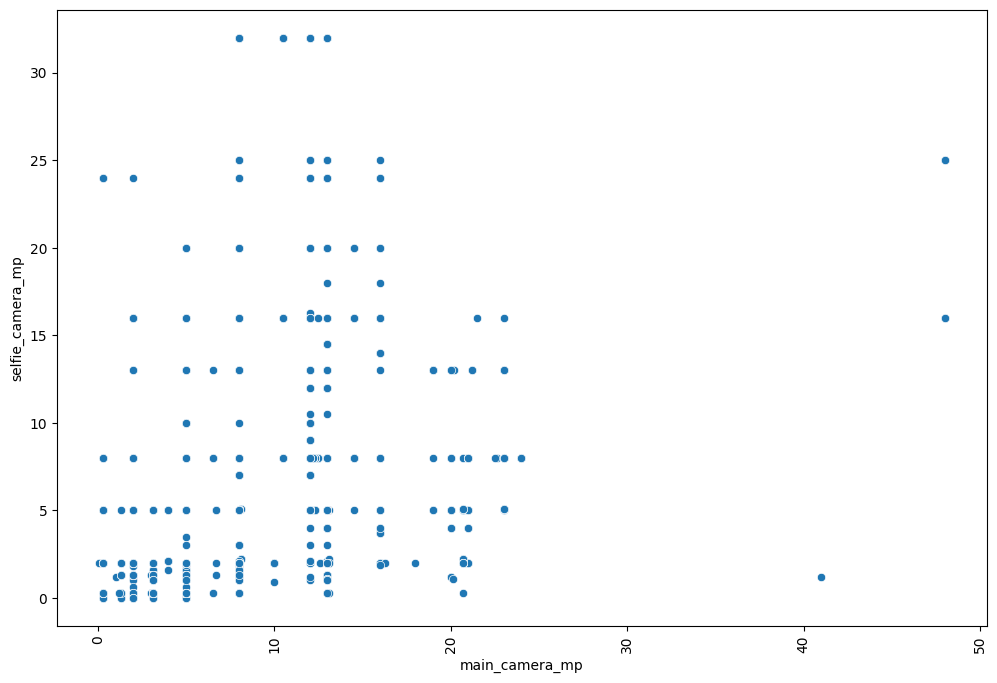

In [152]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,x = 'main_camera_mp' , y = 'selfie_camera_mp');
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  Visually, there is no apparent relationship between main_camera_mp and selfie_camera_mp

### main_camera_mp vs int_memory

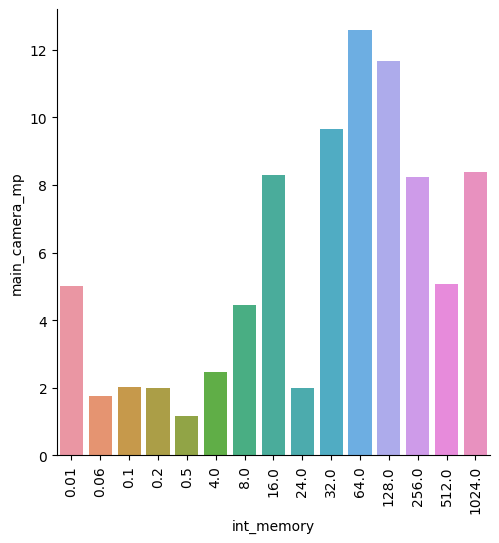

In [153]:
sns.catplot(data=df,x = 'int_memory' , y = 'main_camera_mp', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  Devices of 64 ans 128GB internal memory have the highest main_camera_mp
2.  The lower int_memory sizes tend to have lower main camera resolution
3.  0.01 GB internal memory have a large main camera resolution (approx 5mAh) compared to similar internal memory sizes

### main_camera_mp vs ram 

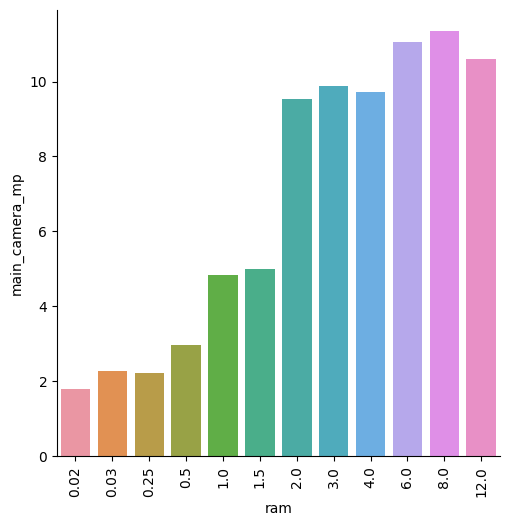

In [154]:
sns.catplot(data=df,x = 'ram' , y = 'main_camera_mp', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  The higher RAM sizes have higher main camera resolutions
2.  The lower ram sizes have the lowest selfie camera resolutions

### main_camera_mp vs battery

<Figure size 1200x1000 with 0 Axes>

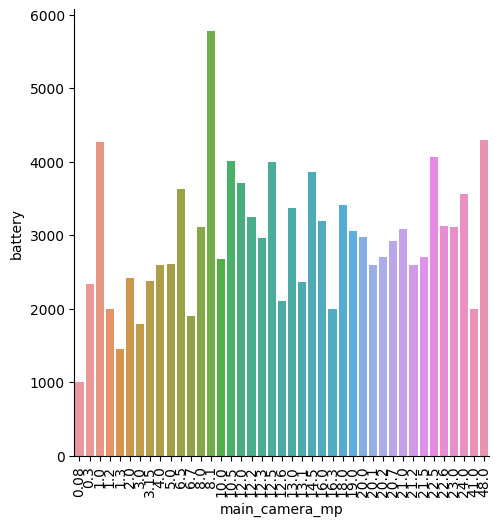

In [155]:
plt.figure(figsize=(12,10))
sns.catplot(data=df,x = 'main_camera_mp' , y = 'battery', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  8.1mp main camera resolution have the highest battery capacity of approx 6000mAh
2.  1mp and 48mp also have relatively high battery capacity of approx 4300mAh

### main_camera_mp vs weight

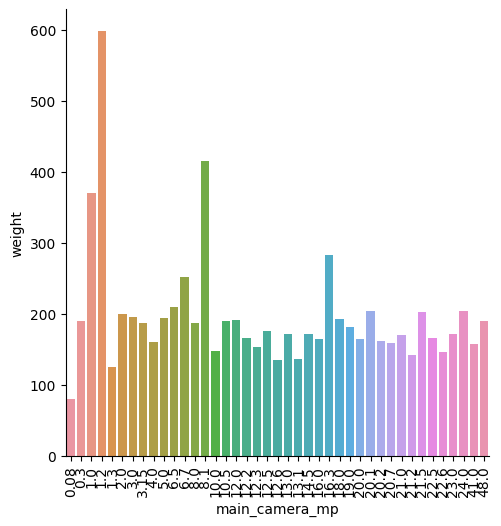

In [156]:
sns.catplot(data=df,x = 'main_camera_mp' , y = 'weight', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  There is a weak negative correlation between main_camera_mp and weight
2.  main camera resolution of 1.2mp have the highest weight approx 600g followed by 8.1mp with approx 420g
3.  The larger main camera sizes have lower weights

### main_camera_mp vs release_year

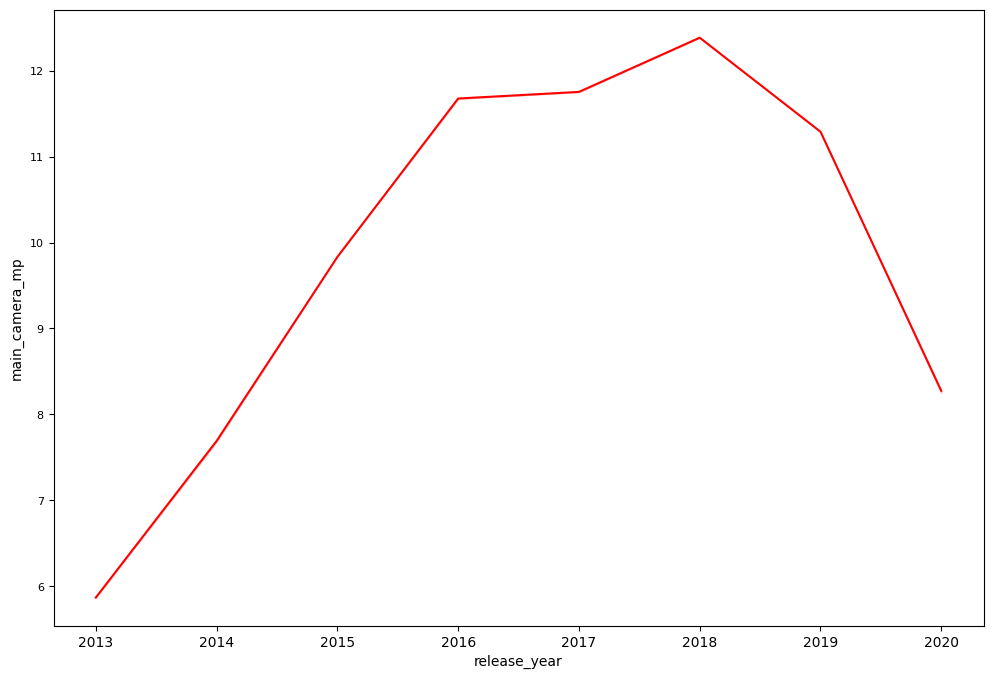

In [157]:

plt.figure(figsize=(12,8))
sns.lineplot(data=df, x="release_year", y="main_camera_mp", ci=False, color="red")
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

##### Observations
1.  Between 2013 and 2018, main_camera_mp increased.  The main_camera_mp size peaked in 2018 and then decreased in 2019 and 2020

### main_camera_mp vs days_used

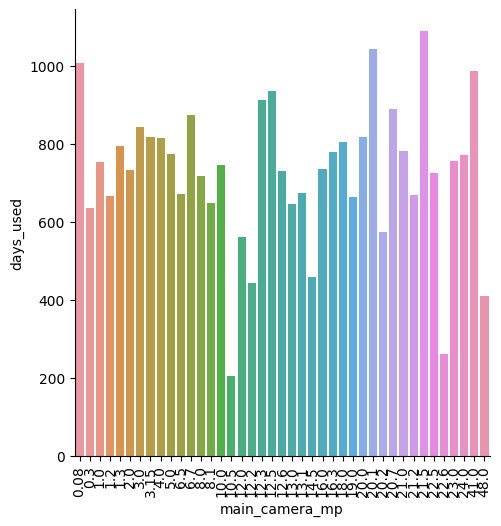

In [158]:
sns.catplot(data=df,x = 'main_camera_mp' , y = 'days_used', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  The devices with the most days used tend to have higher main_camera_sizes
2.  The devices with the least days used have a main camera resoltion of approx 200mp and 250mp

### main_camera_mp vs normalized_new_price

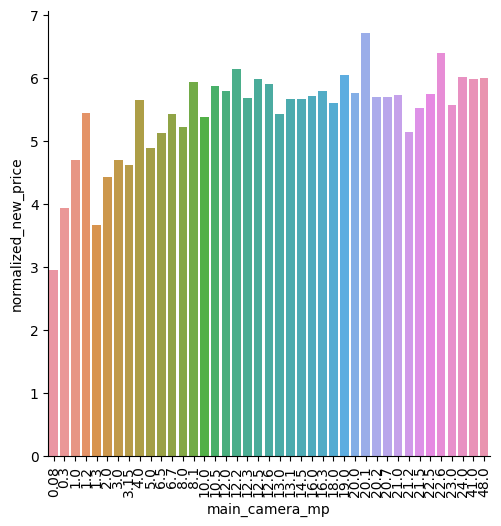

In [159]:
sns.catplot(data=df,x = 'main_camera_mp' , y = 'normalized_new_price', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  In general the larger main_camera_mp sizes have higher new_normalized_price
2.  main_camera_mp sizes of 1.2, 20.1 and 22.6 have higher normalized_new_prices compared to similar camera sizes

### main_camera_mp vs normalized_used_price

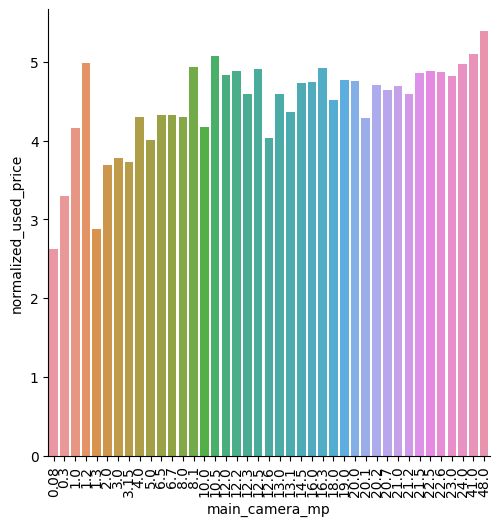

In [160]:
sns.catplot(data=df,x = 'main_camera_mp' , y = 'normalized_used_price', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  In general, larger main_camera_mp sizes have higher normalized_used_price
2.  main_camera_mp od 1.2 have a high normalized_used_price compared to the other devices with similar size camera

### selfie_camera_mp vs int_memory

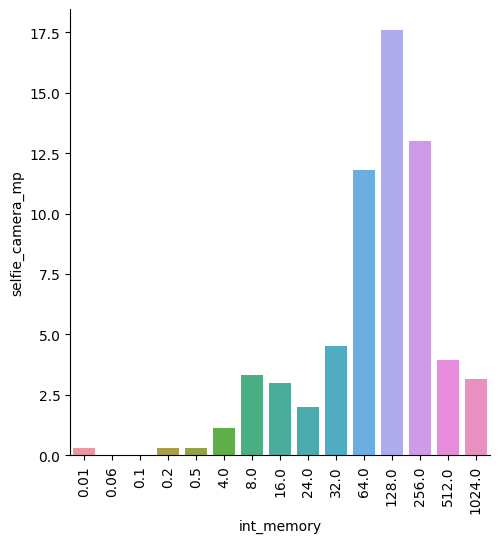

In [161]:
sns.catplot(data=df,x = 'int_memory' , y = 'selfie_camera_mp', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  128GB internal memory have the largest selfie camera resolution
2.  The smaller internal memory sizes have smaller selfie camera resolutions
3.  the 2 largest internal memory sizes have smaller selfie camera resoltuions i.e. 512GB and 1024GB have a selife camera resolution of approx 4mAh whereas 128GB have a selfie camera resolution of approx 17.5mAh

### selfie_camera_mp vs ram

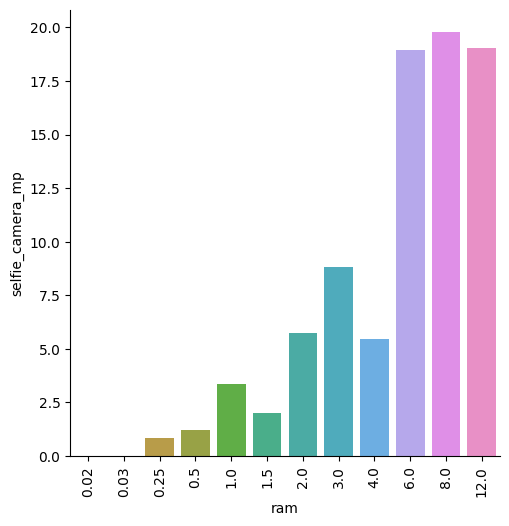

In [162]:
sns.catplot(data=df,x = 'ram' , y = 'selfie_camera_mp', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  The higher RAM sizes have almost double the selfie camera resolution as compared to the lower RAM sizes
2.  6GB, 8GB and 12GB RAM have approx 20mAh selfie camera resolution
3.  The very small RAM sizes of 0.02 and 0.03GB have 0 selfie camera resolution

### selfie_camera_mp vs battery

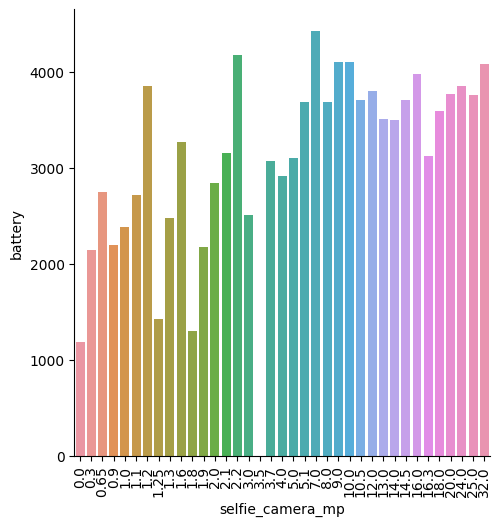

In [163]:
sns.catplot(data=df,x = 'selfie_camera_mp' , y = 'battery', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

#### Observations
1.  The largest battery capacity of about 4500mAh have a sefie camera resolution of 7mp
2.  Devices with 3.5mp appear to have very little battery capacity

### selfie_camera_mp vs weight

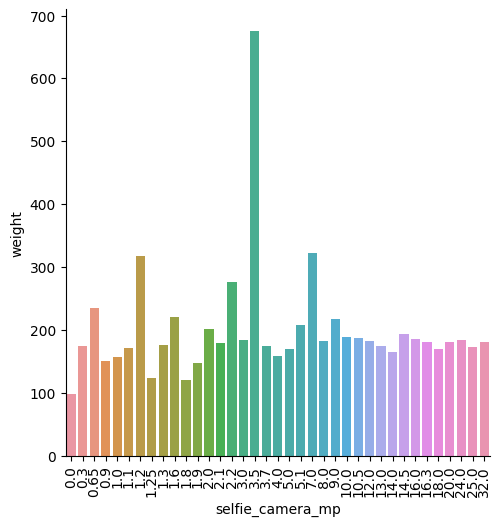

In [164]:
sns.catplot(data=df,x = 'selfie_camera_mp' , y = 'weight', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  Selfie camera resolution of 3.5mp have the highest weight approx 700g
2.  1.2 and 7.0 mp selfie camera resolution also have relitively high weight of approx 320g
3.  The smallest selfie camera resolution is 100g 

### selfie_camera_mp vs release_year

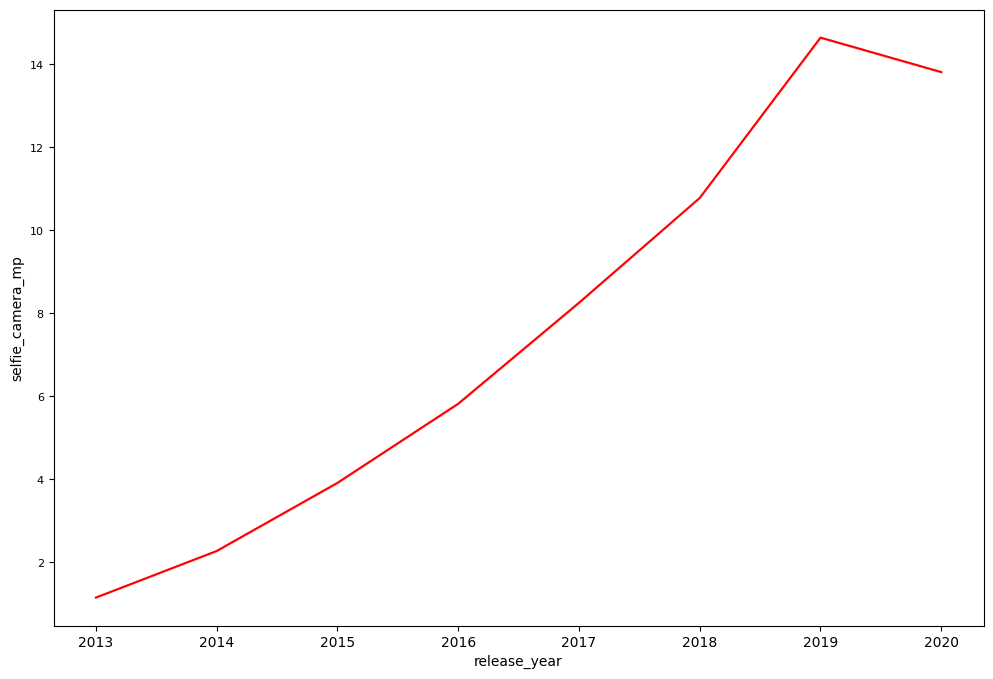

In [165]:

plt.figure(figsize=(12,8))
sns.lineplot(data=df, x="release_year", y="selfie_camera_mp", ci=False, color="red")
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

##### Observations
1. welfie camera resolutions have incresead over the years
2. The peak selfie camera resolution was in 2019 and had a resolution of approx 15mp
3. in 2020 the selfie camera resolution decreased
4. In 2013 the selfie camera resolution was approx 1mp


### selfie_camera_mp vs days_used

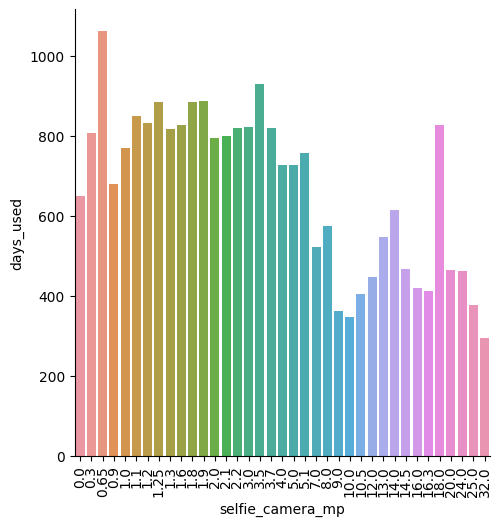

In [166]:
sns.catplot(data=df,x = 'selfie_camera_mp' , y = 'days_used', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  The lower sefie camera sizes have higher days used, this makes sense as the lowest selfie camera sizes are also the oldest
2.  with the exceotion of 18 mp, the higher selfie camera resolutions have less days used

### selfie_camera_mp vs normalized_new_price

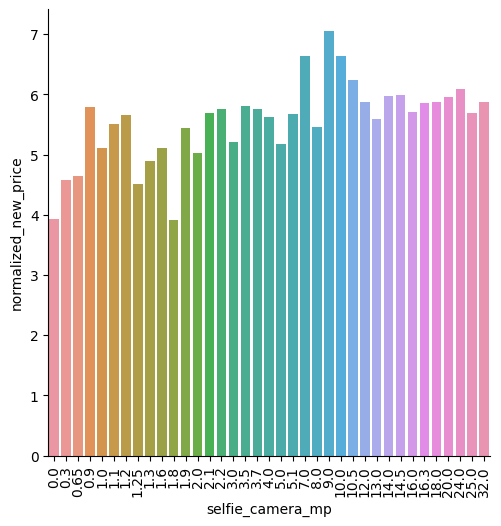

In [167]:
sns.catplot(data=df,x = 'selfie_camera_mp' , y = 'normalized_new_price', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

### selfie_camera_mp vs normalized_used_price

<Figure size 1500x1000 with 0 Axes>

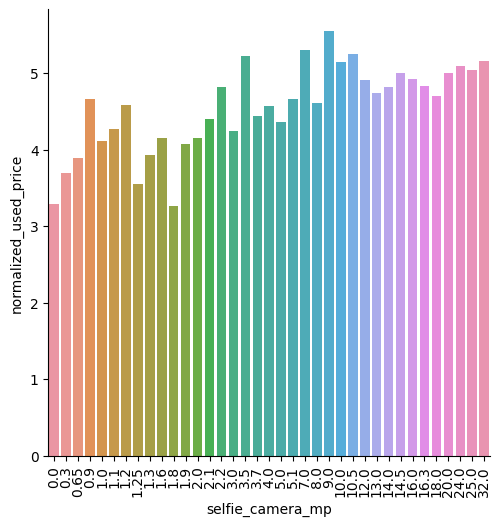

In [168]:
plt.figure(figsize=(15,10))
sns.catplot(data=df,x = 'selfie_camera_mp' , y = 'normalized_used_price', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  The peak of the normalized used and new prices for the devices occurs with a selfie camera resolution of approx 9mp
2.  The lowest of the normalized used and new prices for the devices occurs with a selfie camera resolution of approx 1.8mp
3.  In general the used and new prices tend to increase with the increasing selfie camera resolution.

### int_memory vs ram

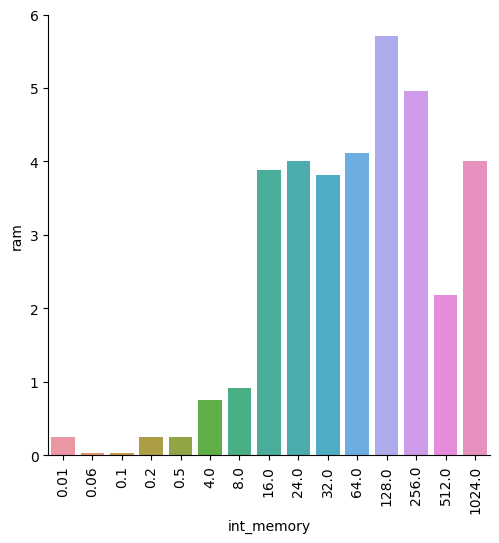

In [169]:
sns.catplot(data=df,x = 'int_memory' , y = 'ram', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  The higher the internal meomry the higher the RAM
2.  The highest internal memory size of 128GB have a RAM of approx 6GB
3.  Devices of 512GB have a smaller internal memory of 2GB compared to the other devices of similar internal memory sizes
4.  Internal memory sizes of 0.5GB and less have very little RAM

### int_memory vs battery

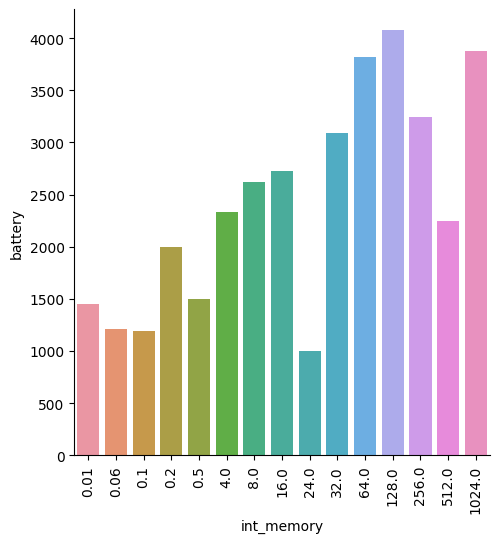

In [170]:
sns.catplot(data=df,x = 'int_memory' , y = 'battery', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  In general, the higher the internal memory, the higher the battery size.
2.  Internal memore of 0.5MB, 24MB anf 512MB, have a decrease in battery size compared to similar memory internal memory sizes
3.  Internal memory sie of 128MB have the highest battery size.  Internal memory of 24 have the lowest battery size 


### int_memory vs weight

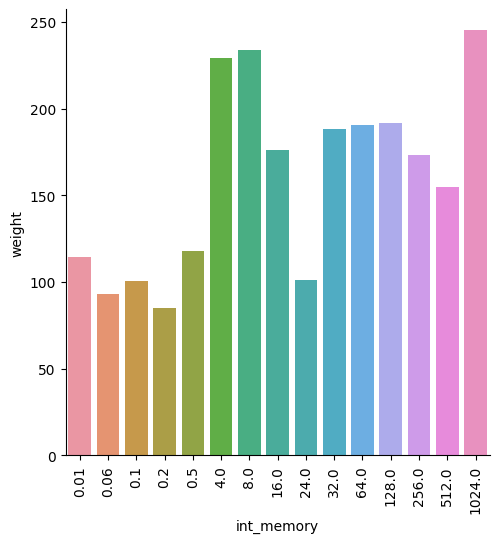

In [171]:
sns.catplot(data=df,x = 'int_memory' , y = 'weight', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  Internal memory size of 1024GB have the largest weight of approx 250g, followed closely by 4GB and 8GB with approx 230 and 240g respectively
2.  The devices with the smallest weight is approx 90g with internal memory size of 0.2GB

### int_memory vs release_year

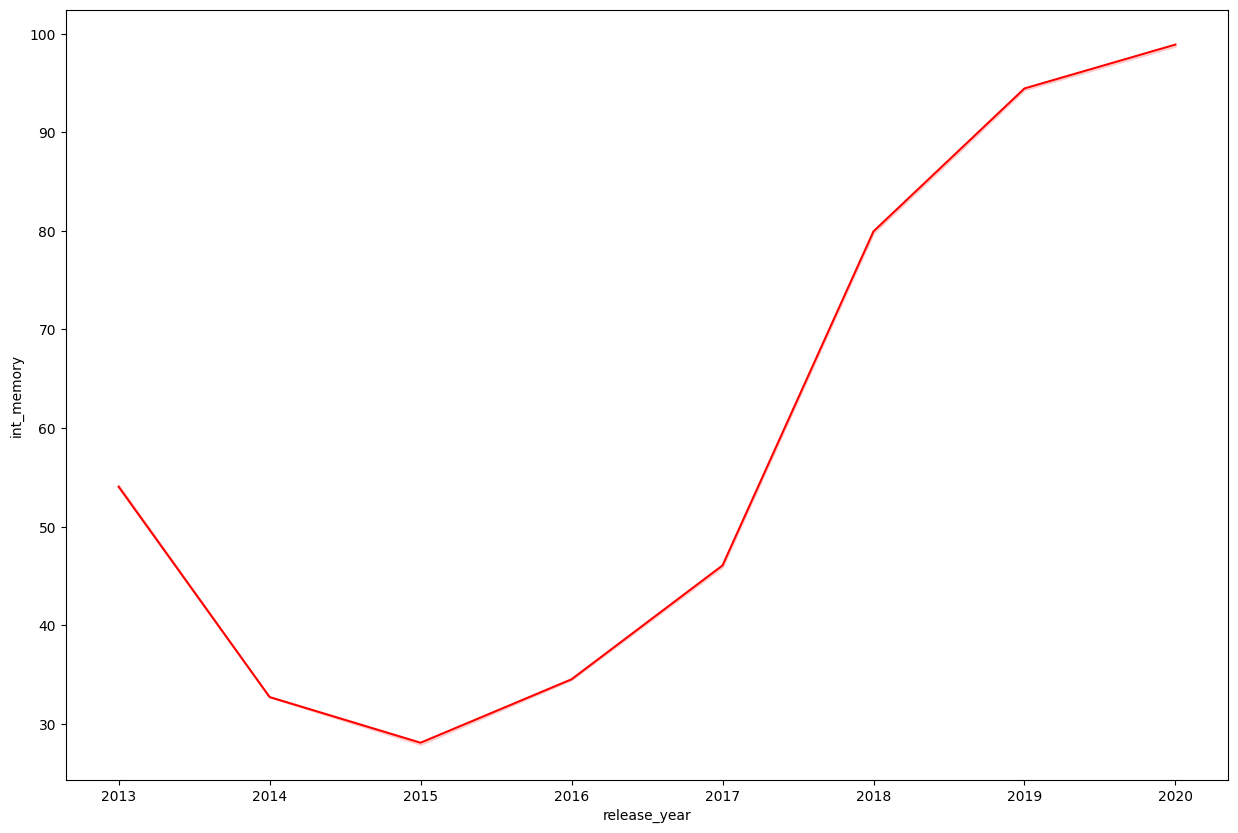

In [172]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x="release_year", y="int_memory", ci=False, color="red");
#plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

In [173]:
df.groupby(["release_year"]).int_memory.mean()

release_year
2013   54.0550
2014   32.7264
2015   28.0940
2016   34.5277
2017   46.0742
2018   79.9508
2019   94.4420
2020   98.8898
Name: int_memory, dtype: float64

##### Observations
1.  Mean internal memory sizes decreases between 2013 to 2015 from approx 55GB to 30 GB.  After 2015, mean internal memory size increases from 30GB to approx 100GB

### int_memory vs days_used

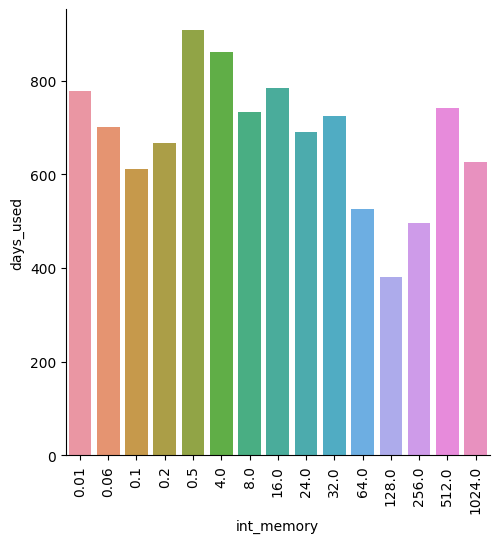

In [174]:
sns.catplot(data=df,x = 'int_memory' , y = 'days_used', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  Internal memory size of 0.5GB have the most amount of days used. approx 900 days.
2.  Internal memory size of 128GB have the least amountof days used, approx 400 days

### int_memory vs normalized_new_price

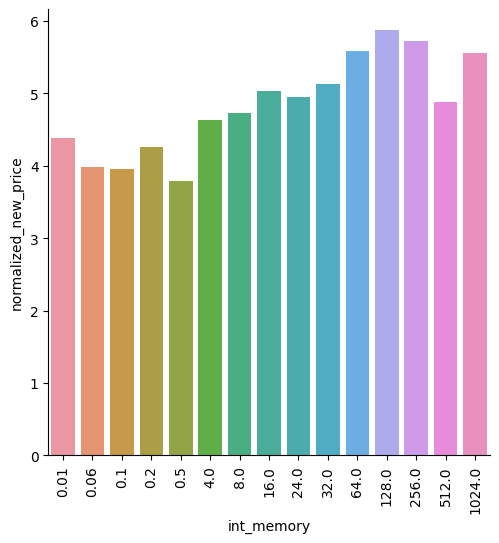

In [175]:
sns.catplot(data=df,x = 'int_memory' , y = 'normalized_new_price', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  In general as internal memory sizes increases the normalized used price also increase.
2.  for internal memore sizes bigger than 128GB normalized used prices showed a decline
3.  0.5GB has the lowest normalized_used_price and 128GB havr the highest normalized used price 

### int_memory vs normalized_used_price

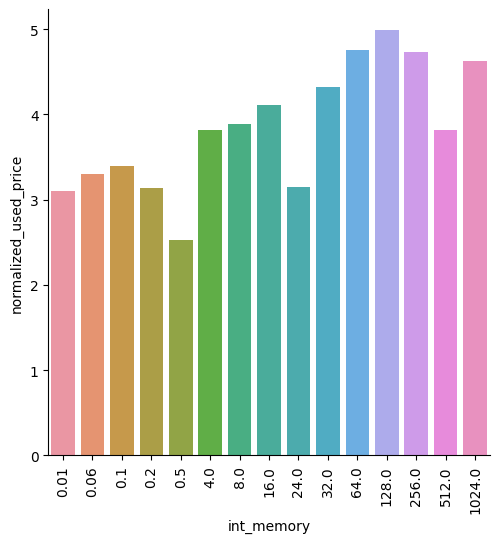

In [176]:
sns.catplot(data=df,x = 'int_memory' , y = 'normalized_used_price', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  Normalized used prices shows a general increase with increasing internal memory sizes, with the exception of 0.5G, 32GBand 512GB where the prices decreased.
2.  For memory sizes of greater than 256GB, the normalized used prices decreased.


### ram vs battery

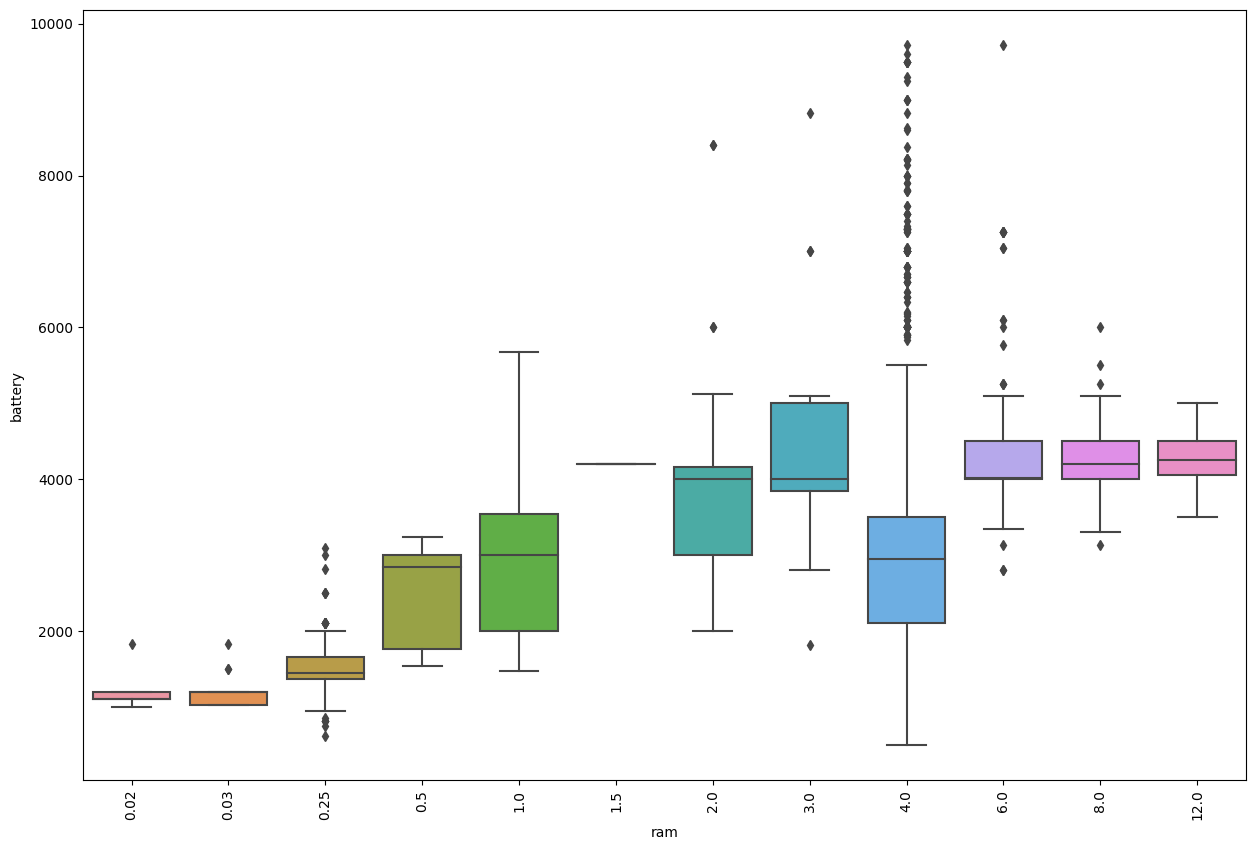

In [177]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="ram", y="battery")
plt.xticks(rotation=90)
plt.show()

##### Observations
1.  smaller ram sizes have smaller battery sizes
2.  ram size of 4GB have many oultiers
3.  In general as average ram sizes increases battery sizes also increases

### ram vs weight

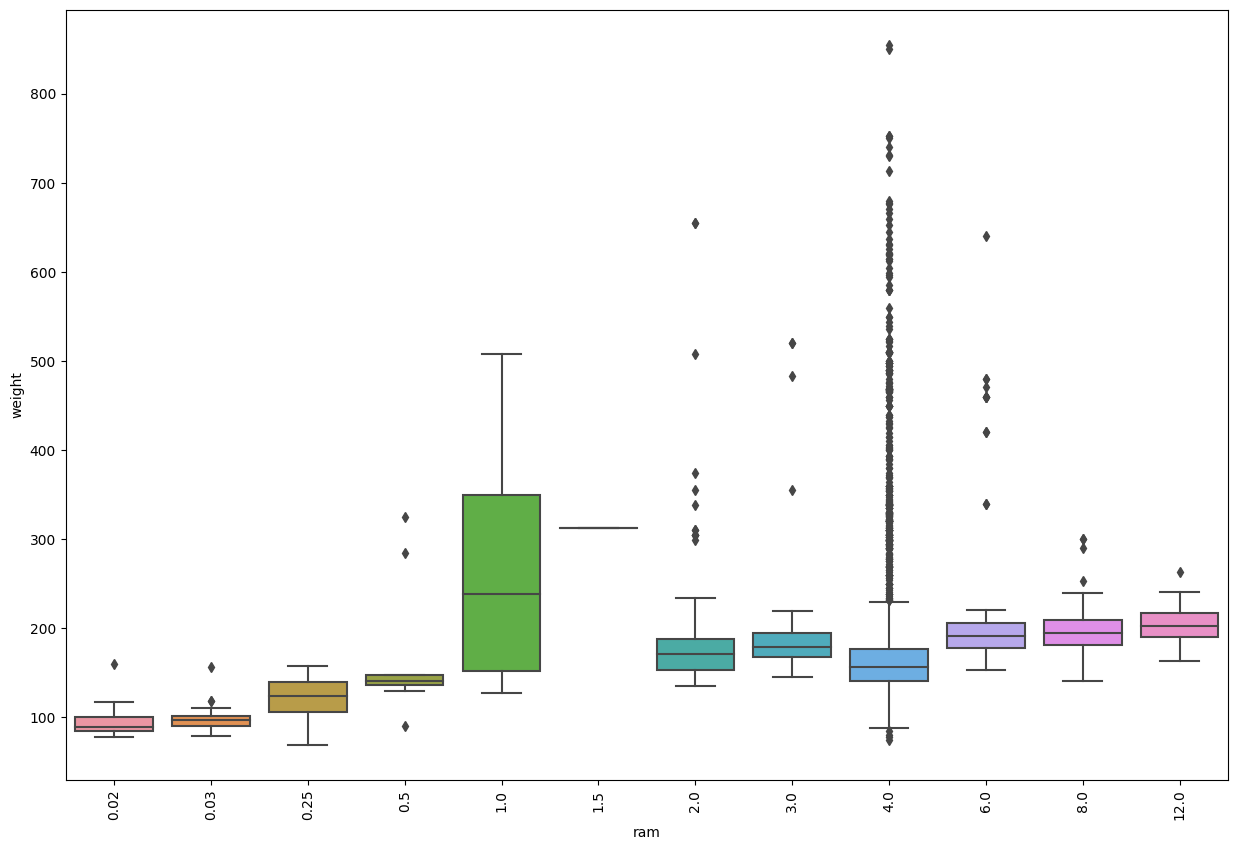

In [178]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="ram", y="weight")
plt.xticks(rotation=90)
plt.show()

##### Observations
1. Ram size of 1GB have the largest variation in weight, while RAM size of 1.5GB have the smallest variation in weight
2. Ram size of 4GB have the largest amount of outliers
3. as ram sizes increases thee is a general increase in weight

### ram vs release_year

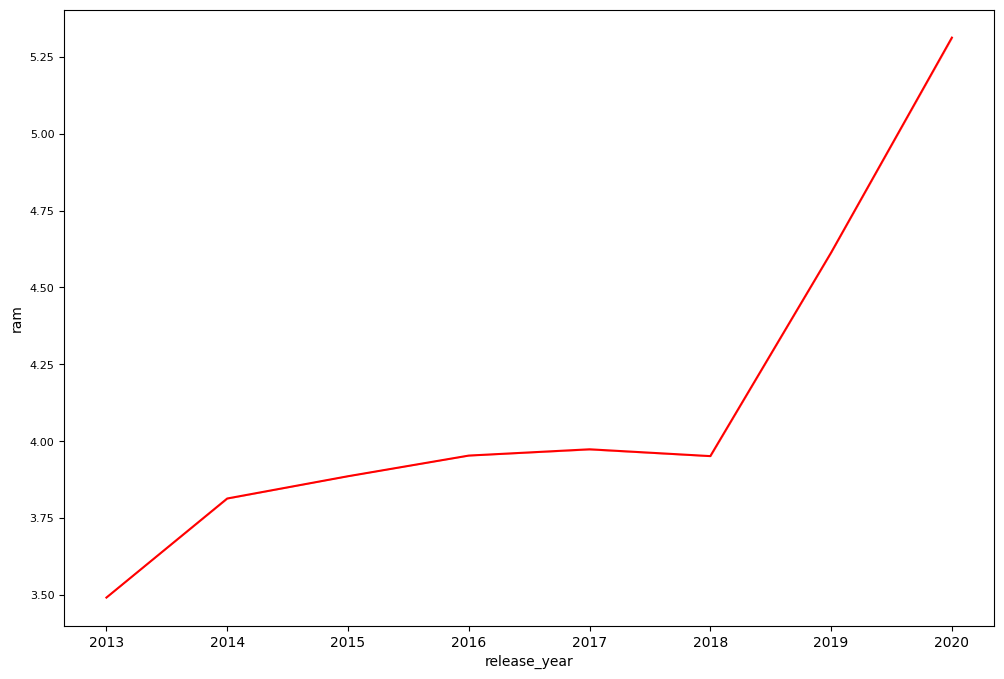

In [179]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x="release_year", y="ram", ci=False, color="red")
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

##### Observations
1.  In general ram sizes increases from 2013 to 2020.
2.  between 2014 and 2018 there is a less steep increase in ram sizes, i.e. between approx 3.8GB to 4GB on average.  from 2018 to 2020 the increase in ram sizes was steeper, from approx 4GB to 5.25GB

### ram vs days_used

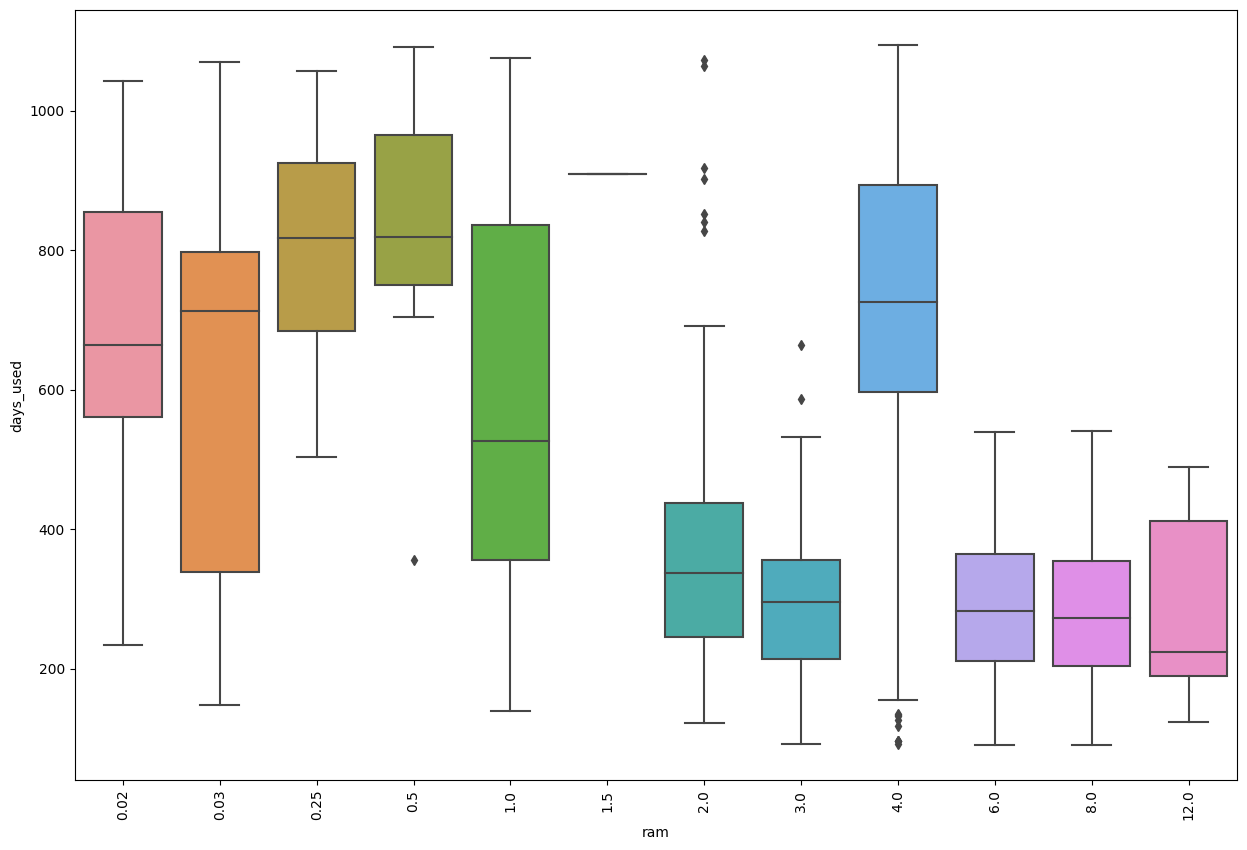

In [180]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="ram", y="days_used")
plt.xticks(rotation=90)
plt.show()

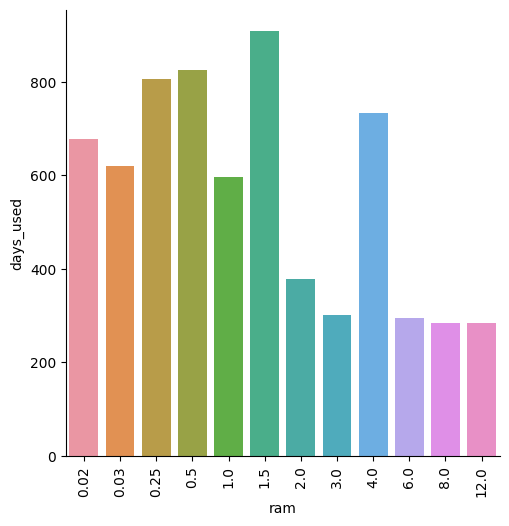

In [181]:
sns.catplot(data=df,x = 'ram' , y = 'days_used', kind = "bar" , ci = False); 
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  The larger ram sizes was used less days, with the exception of 4GB
2.  The maximum number of days used, approx 900 days was for ram size of 15gb,  the smallest amount of days used was for ram sizes of 6GB, 8GB and 12GB

### battery vs weight

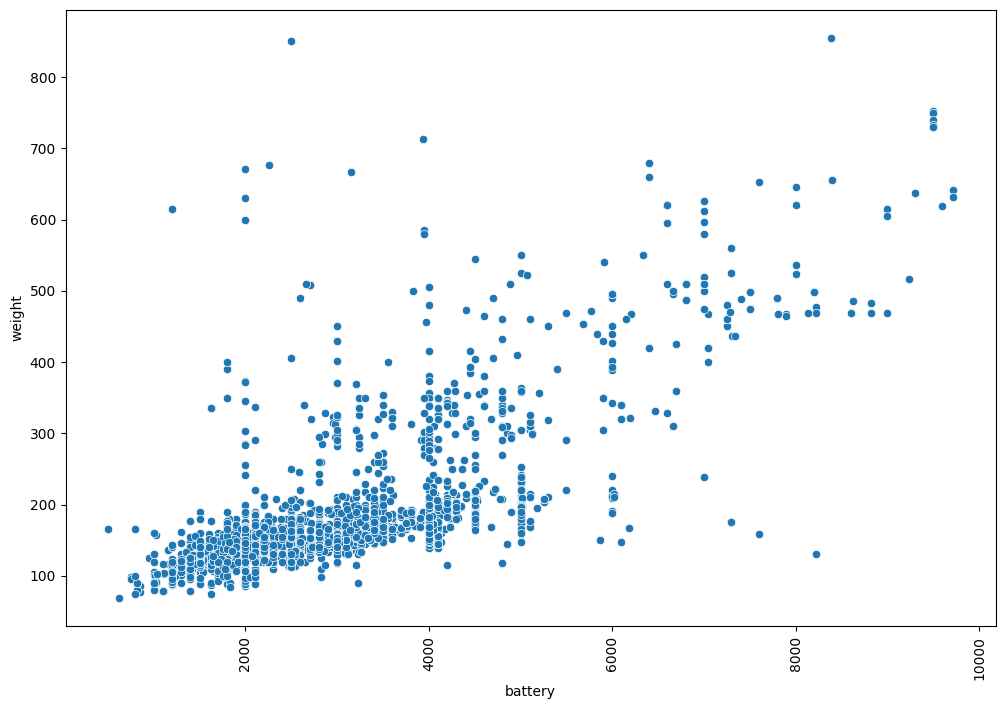

In [182]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,x = 'battery' , y = 'weight');
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  There is a strong positive correlation between battery size and weight for battery sizes below approx 5000mAh
2.  For battery sizes greater than 5000mAh, there is a weak positive correlation 

### battery vs release_year

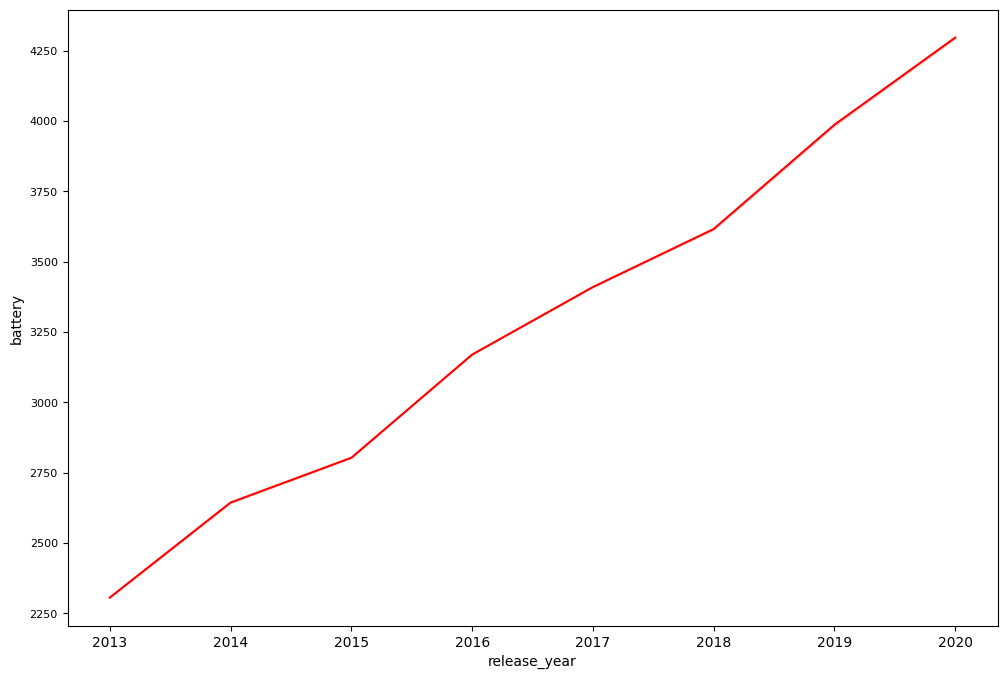

In [183]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x="release_year", y="battery", ci=False, color="red")
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

##### Observations
1.  Battery sizes increases as the phone get newer

### battery vs days_used

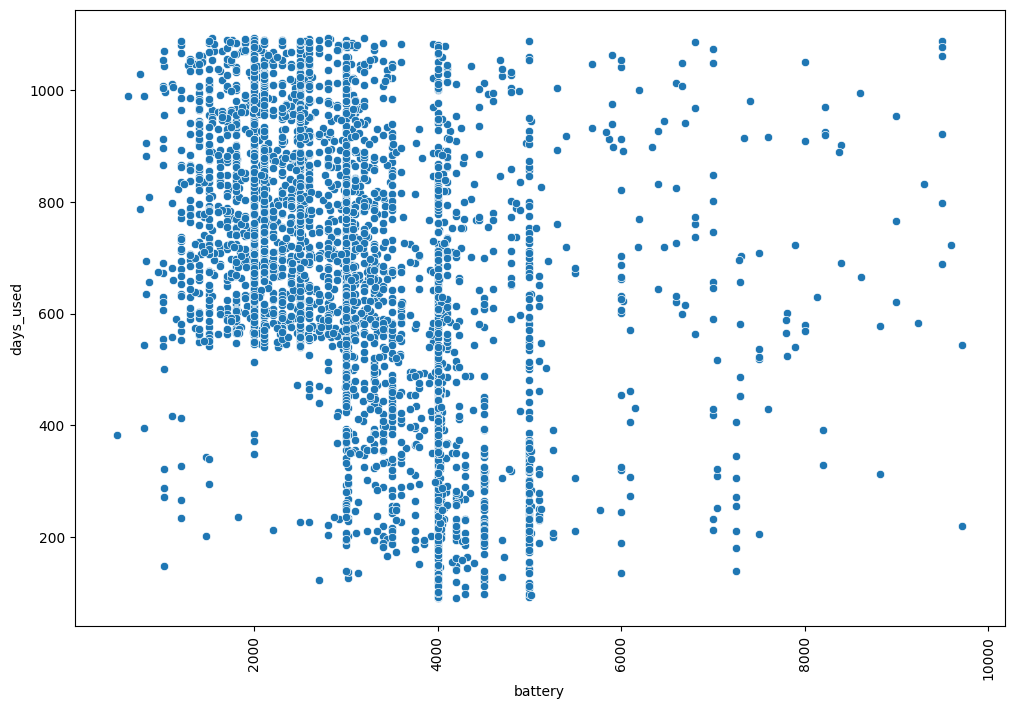

In [184]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,x = 'battery' , y = 'days_used');
plt.xticks(rotation=90);
plt.show()

### battery vs normalized_new_price

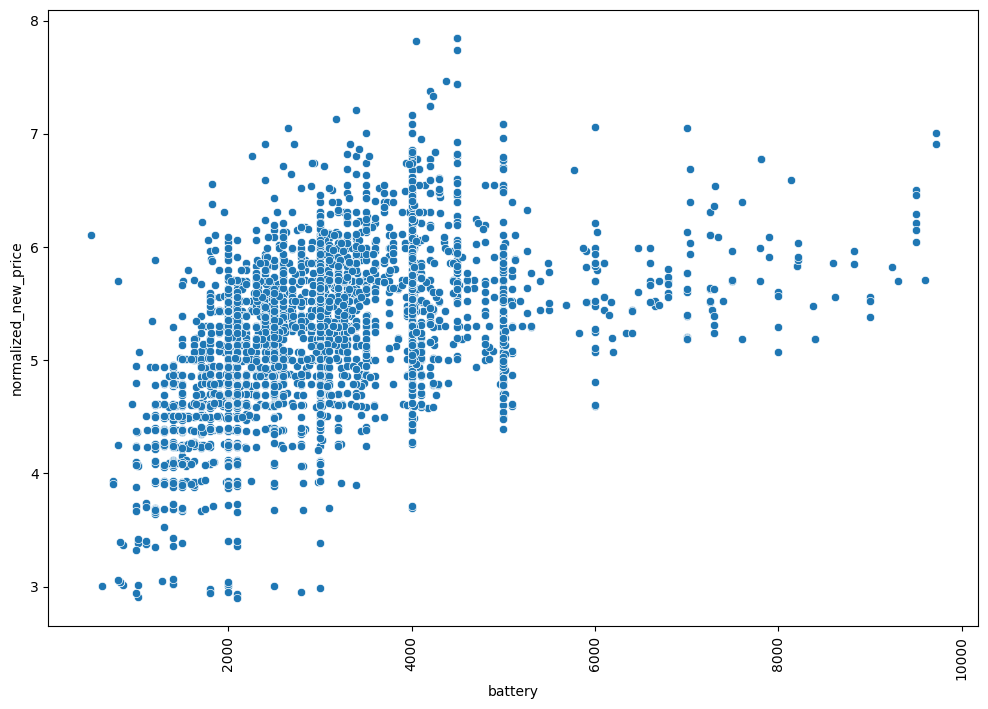

In [185]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,x = 'battery' , y = 'normalized_new_price');
plt.xticks(rotation=90);
plt.show()

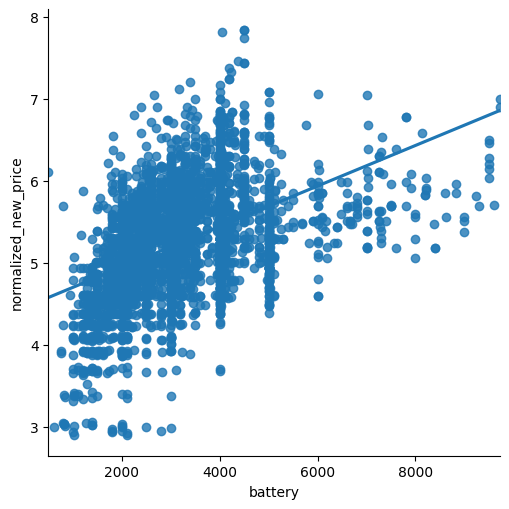

In [186]:
sns.lmplot(data=df, x='battery', y='normalized_new_price', ci=False);

##### Observations
1.  There is a positive correlation between battery and normalized new price

### battery vs normalized_used_price

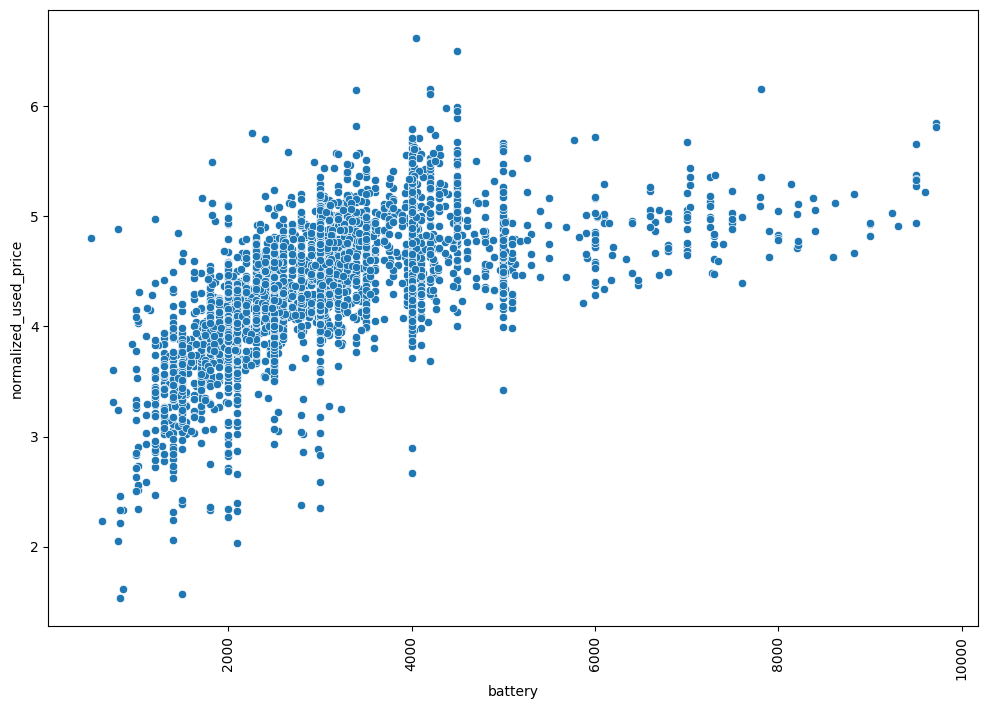

In [187]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,x = 'battery' , y = 'normalized_used_price');
plt.xticks(rotation=90);
plt.show()

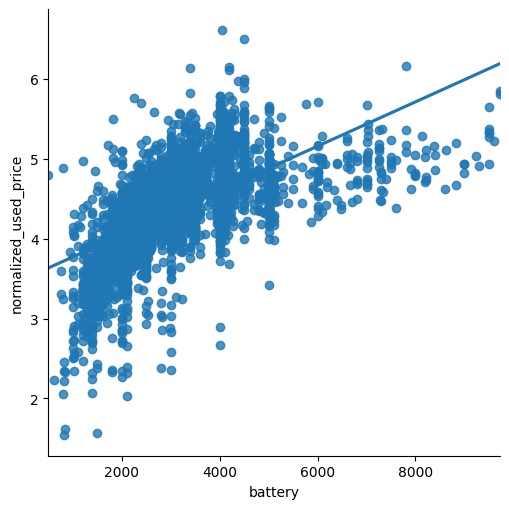

In [188]:
sns.lmplot(data=df, x='battery', y='normalized_used_price', ci=False);

##### Observations
1.  For battery sizes less than approx 5000mAh, there is a strong positive correlation with normalized used price.
2.  For battery sizes above 5000mAh, there are is still a positive correlation.

### weight vs release_year

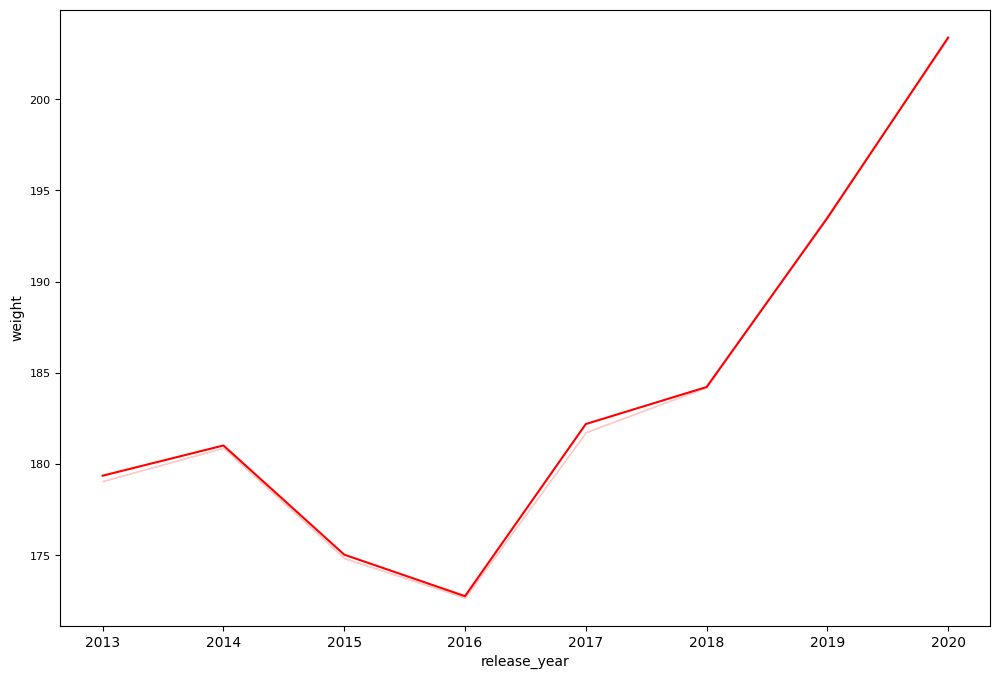

In [189]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x="release_year", y="weight", ci=False, color="red")
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

##### Observation2
1.  From 2013 to 2014 the weight of devices increased. From 2014 to 2016, the weight of devices decreased to its lowest. After 2016 the weight of the devices increased to its maximum weight of approx 300g on average

### weight vs days_used

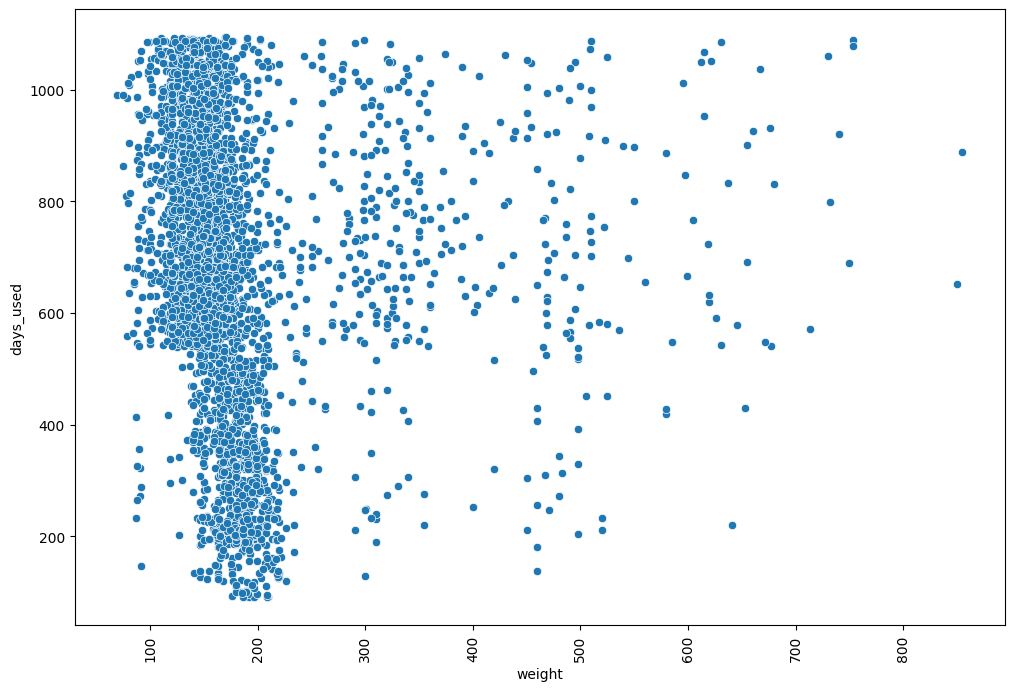

In [190]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,x = 'weight' , y = 'days_used');
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  A large amount of devices have a weight between 100 and 250g.
2.  There does not appear to be a realtion between weight and days_used

### weight vs normalized_new_price

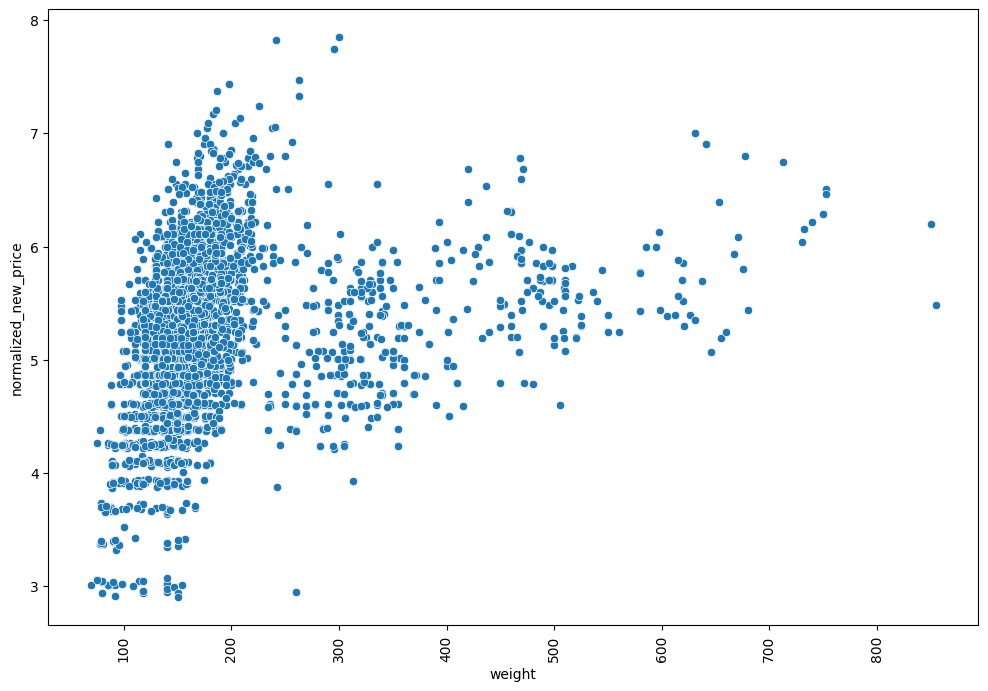

In [191]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,x = 'weight' , y = 'normalized_new_price');
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  There is a strong positive correlation for devices with a weight less than 250g and normalized new price
2.  for devices greater than 250g there is a weak positive correlation with normalized new price

### weight vs normalized_used_price

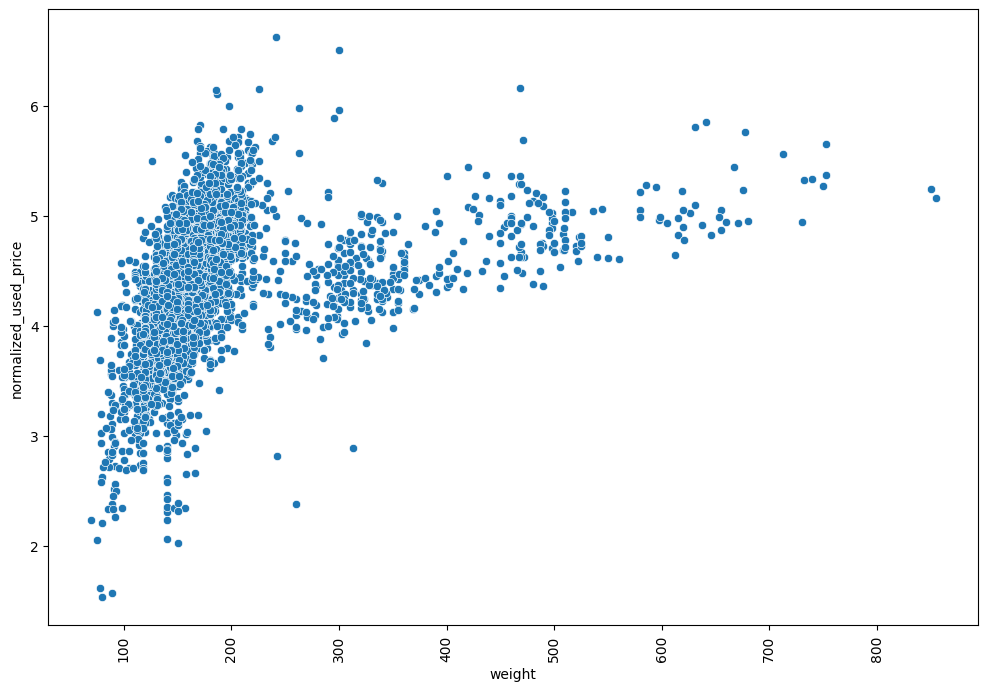

In [192]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,x = 'weight' , y = 'normalized_used_price');
plt.xticks(rotation=90);
plt.show()

#####v Observations
1.  There is a strong positive correlation for devices with a weight less than 250g and normalized used price
2.  for devices greater than 250g there is a strong positive correlation with a less steep gradient with normalized new price

### release_year vs days_used

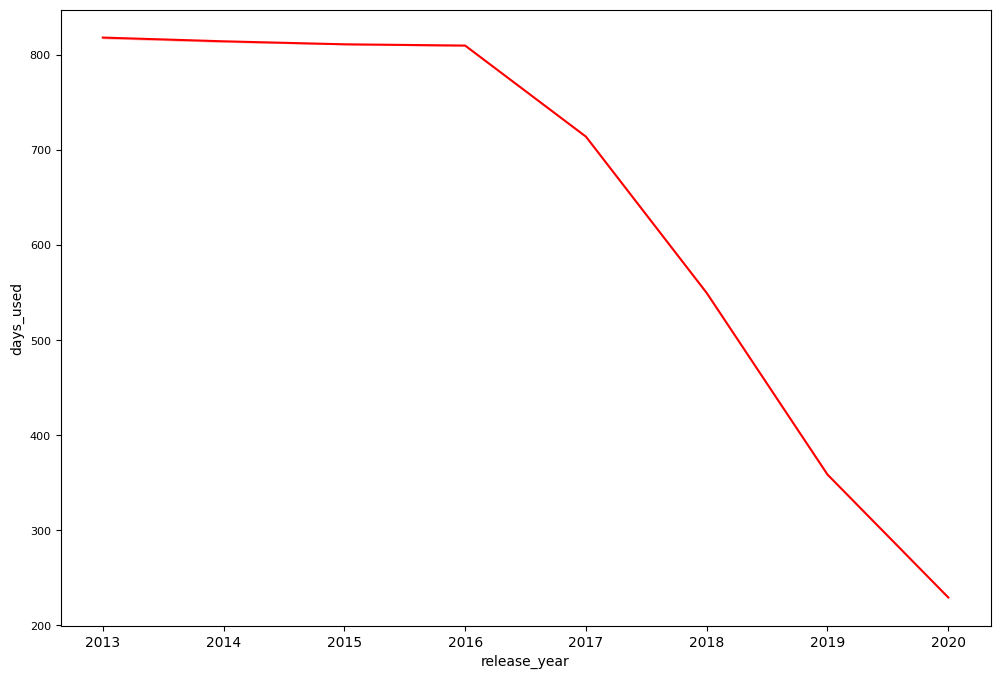

In [193]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x="release_year", y="days_used", ci=False, color="red")
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

##### Observations
1.  From 2013 to 2016 there is the maximum number of days used.  During this time there is a slight decline in the number of days used as the years increases The number of dys used for these years ranges from apprix.  780 to 820.
2.  After 2016 there is a sharp decline in the number of days used as the years increases.  During this time the days used ranges from approx 780days to arroox 220 days

### release_year vs normalized_new_price

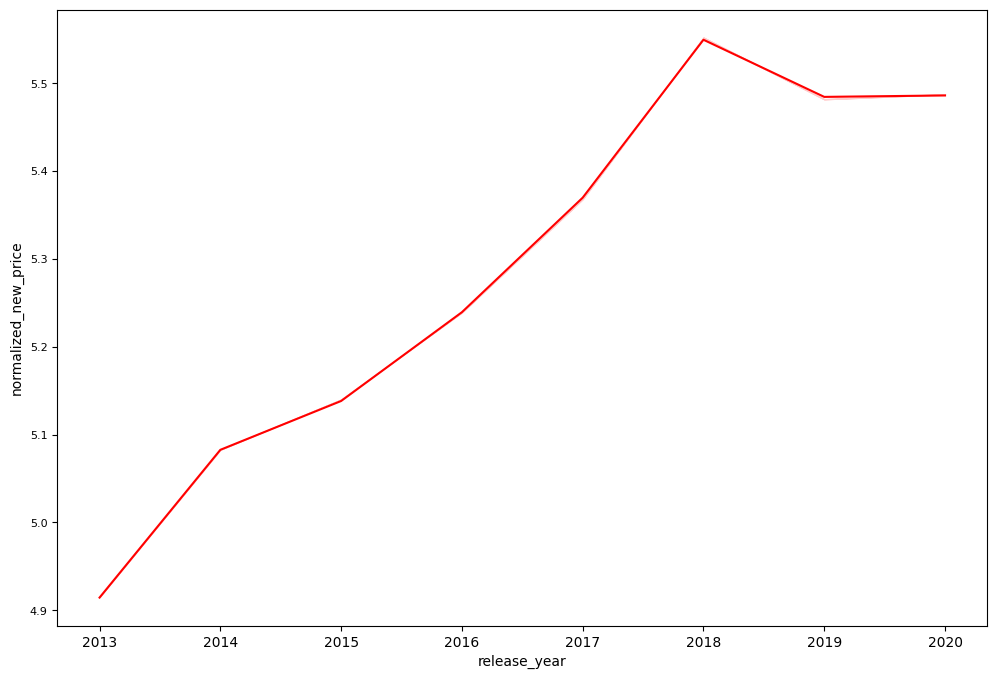

In [194]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x="release_year", y="normalized_new_price", ci=False, color="red")
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

##### Observations
1.  The normalized new price increases as the years increase until 2018, where the normalized new prices peaks at approx 5.6 euros.
2.  After 2018, the normalized new prices decresed to approx 5.5 euros in 2019 and stayed at this price in 2020

### release_year vs normalized_used_price

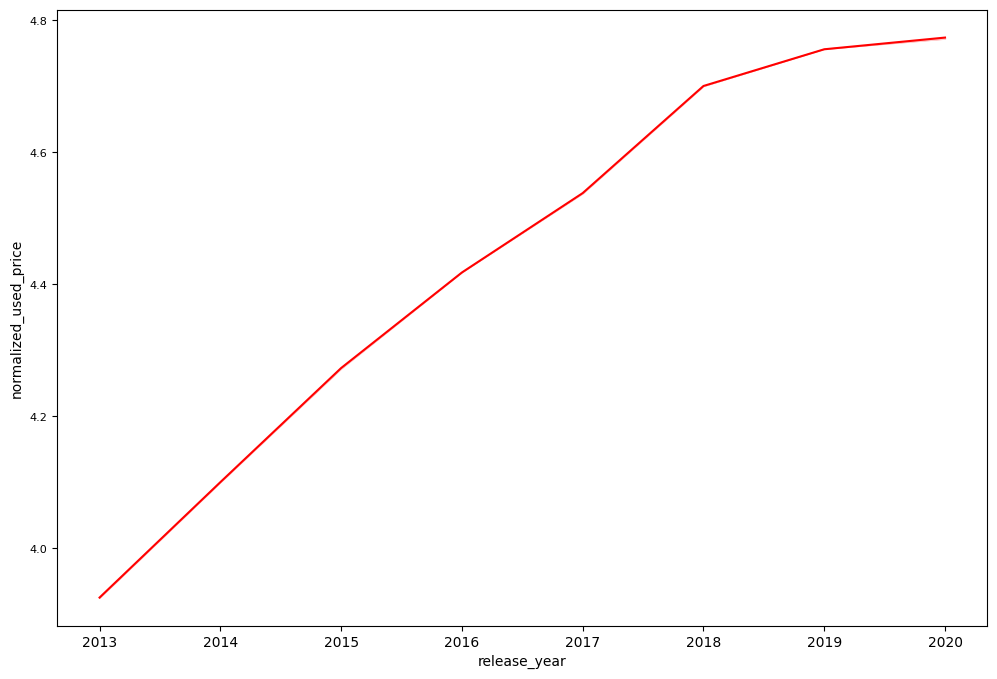

In [195]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x="release_year", y="normalized_used_price", ci=False, color="red")
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

##### Observations
1.  The nomralized used prie increased as the years increase

### days_used vs normalized_new_price

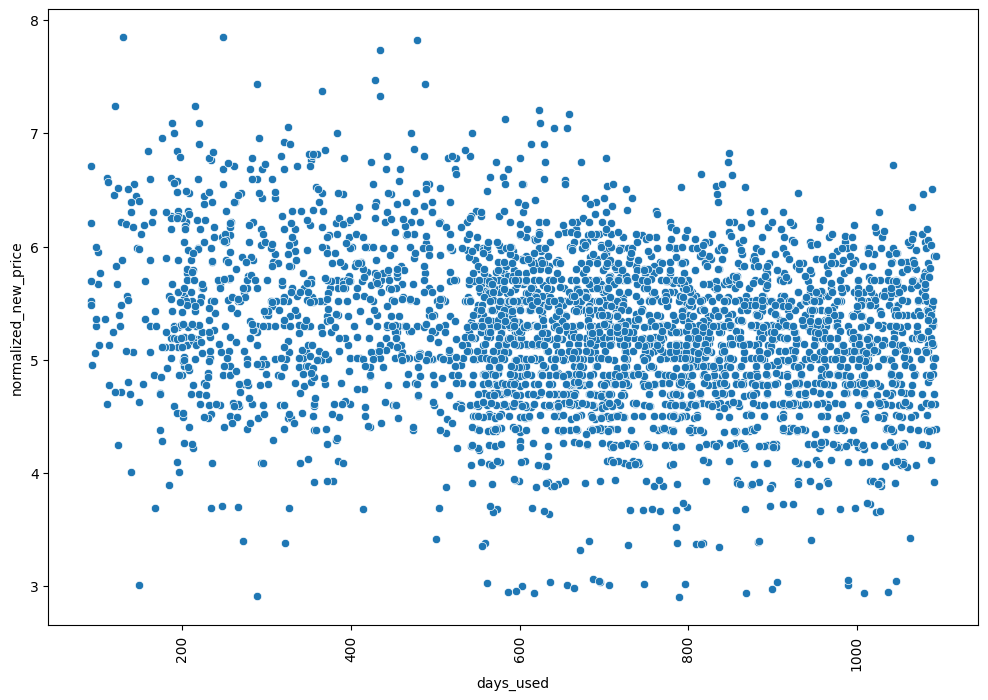

In [196]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,x = 'days_used' , y = 'normalized_new_price');
plt.xticks(rotation=90);
plt.show()

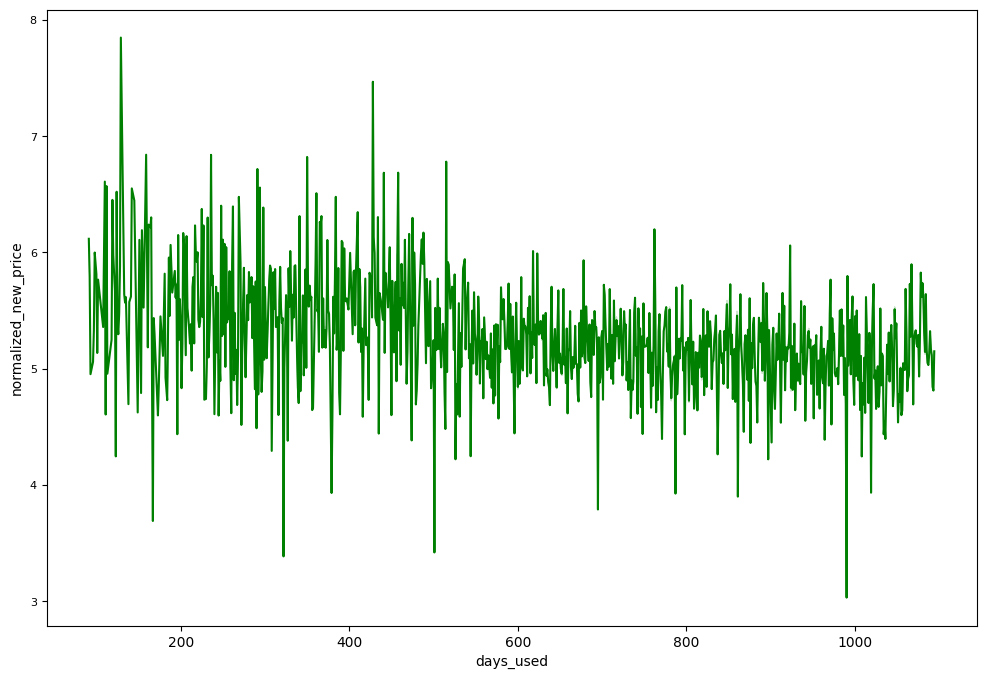

In [197]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x="days_used", y="normalized_new_price", ci=False, color="green")
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

##### Observations
1.  There is a small decline in the normalized new price as the days used increases.

### days_used vs normalized_used_price

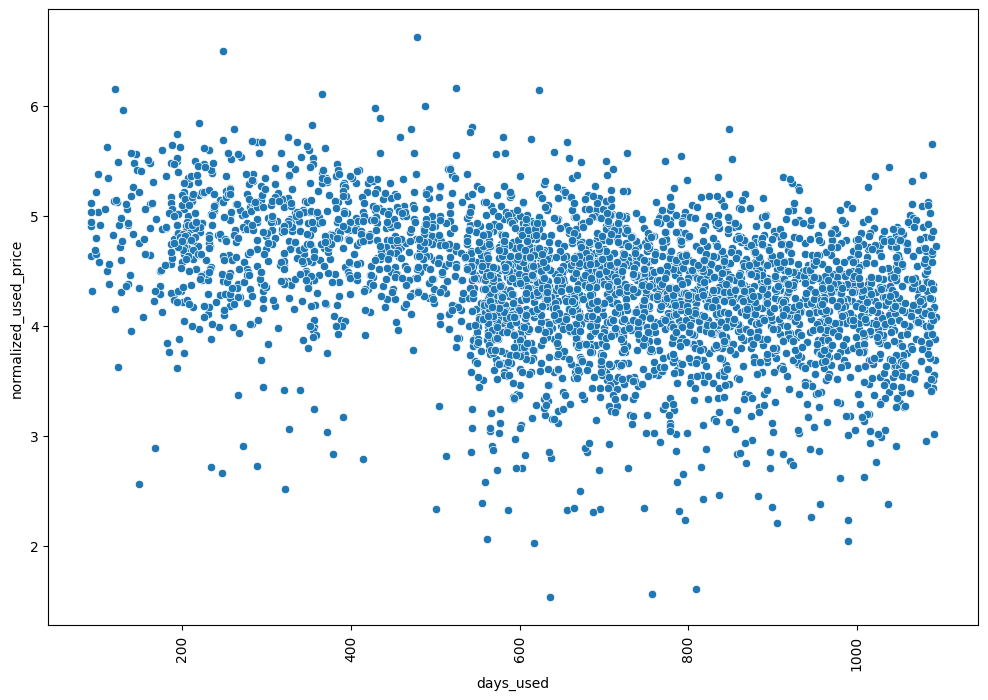

In [198]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,x = 'days_used' , y = 'normalized_used_price');
plt.xticks(rotation=90);
plt.show()

##### Observations
1.  There is a negative correlation between the dys used and the normalized used price

### normalized_new_price vs normalized_used_price

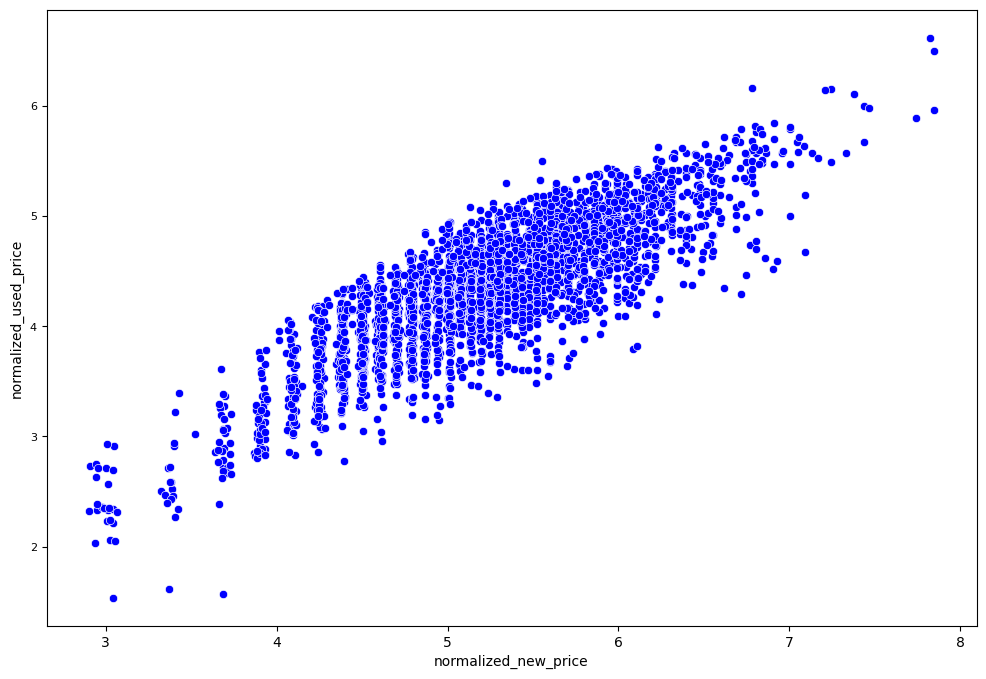

In [199]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="normalized_new_price", y="normalized_used_price", ci=False, color="blue")
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

##### Observations
1.  There is a strong positive correlation with normalized_new_price and normalized_used_price

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Treating Missing Values

In [200]:
# making a copy of the dataset
df1 = df.copy()
df1.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android      14.5000  yes   no         13.0000   
1      Honor  Android      17.3000  yes  yes         13.0000   
2      Honor  Android      16.6900  yes  yes         13.0000   
3      Honor  Android      25.5000  yes  yes         13.0000   
4      Honor  Android      15.3200  yes   no         13.0000   

   selfie_camera_mp  int_memory    ram   battery   weight  release_year  \
0            5.0000     64.0000 3.0000 3020.0000 146.0000          2020   
1           16.0000    128.0000 8.0000 4300.0000 213.0000          2020   
2            8.0000    128.0000 8.0000 4200.0000 213.0000          2020   
3            8.0000     64.0000 6.0000 7250.0000 480.0000          2020   
4            8.0000     64.0000 3.0000 5000.0000 185.0000          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127                 4.3076                4.7151  
1        325                 5.1621                5.5190  
2        162                 5.1111                5.8846  
3        345                 5.1354                5.6310  
4        293                 4.3900                4.9478

In [201]:
# checking the columns with missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- main_camera_mp, selfie_camera_mp, int_memory, ram, battery and weight all have missing values

In [202]:
# we can impute these missing vaues with the median value for each brand of device. 
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(value=df1.groupby(["brand_name", "release_year"])["main_camera_mp"].transform("median"))
df1["selfie_camera_mp"] = df1["selfie_camera_mp"].fillna(value=df1.groupby(["brand_name",])["selfie_camera_mp"].transform("median"))
df1["int_memory"] = df1["int_memory"].fillna(value=df1.groupby(["brand_name",])["int_memory"].transform("median"))
df1["ram"] = df1["ram"].fillna(value=df1.groupby(["brand_name",])["ram"].transform("median"))
df1["battery"] = df1["battery"].fillna(value=df1.groupby(["brand_name",])["battery"].transform("median"))
df1["weight"] = df1["weight"].fillna(value=df1.groupby(["brand_name",])["weight"].transform("median"))

df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           0
int_memory                 0
ram                        0
battery                    0
weight                     0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [203]:
df1[df1["main_camera_mp"].isnull()]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
59      Infinix  Android      17.3200  yes  no             NaN   
60      Infinix  Android      15.3900  yes  no             NaN   
61      Infinix  Android      15.3900  yes  no             NaN   
62      Infinix  Android      15.3900  yes  no             NaN   
63      Infinix  Android      15.2900  yes  no             NaN   
...         ...      ...          ...  ...  ..             ...   
3411     Realme  Android      15.3400  yes  no             NaN   
3412     Realme  Android      15.3200  yes  no             NaN   
3413     Realme  Android      15.3200  yes  no             NaN   
3448       Asus  Android      16.7400  yes  no             NaN   
3449       Asus  Android      15.3400  yes  no             NaN   

      selfie_camera_mp  int_memory    ram   battery   weight  release_year  \
59              8.0000     32.0000 2.0000 6000.0000 209.0000          2020   
60              8.0000     64.0000 4.0000 5000.0000 185.0000          2020   
61              8.0000     32.0000 2.0000 5000.0000 185.0000          2020   
62             16.0000     32.0000 3.0000 4000.0000 178.0000          2019   
63             16.0000     32.0000 2.0000 4000.0000 165.0000          2019   
...                ...         ...    ...       ...      ...           ...   
3411           16.0000     64.0000 4.0000 4000.0000 183.0000          2019   
3412           16.0000     64.0000 4.0000 4035.0000 184.0000          2019   
3413           25.0000     64.0000 4.0000 4045.0000 172.0000          2019   
3448           24.0000    128.0000 8.0000 6000.0000 240.0000          2019   
3449            8.0000     64.0000 6.0000 5000.0000 190.0000          2019   

      days_used  normalized_used_price  normalized_new_price  
59          245                 4.2821                4.5976  
60          173                 4.3636                4.7118  
61          256                 4.1814                4.5055  
62          316                 4.5552                4.6022  
63          468                 4.4167                4.8713  
...         ...                    ...                   ...  
3411        503                 4.5705                5.1600  
3412        433                 4.5210                5.0744  
3413        288                 4.7782                4.9668  
3448        325                 5.7153                7.0593  
3449        232                 4.4923                6.4839  

[179 rows x 15 columns]

- Missing values was imputed using the brand name grouped by individual year.  This approach was used as technology advances rapidly and over the 8 years of data we have the values differ considerably.  

- The missing values for main_camera_mp was not imputed bacause the individual group values are missing.  Thus we will impute using the brand name only

In [204]:
# impute missing values for main_camera_mp using brand_name only
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(value=df1.groupby(["brand_name"])["main_camera_mp"].transform("median"))

# checking for null values after imputing
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [205]:
# checking which brand_name has null values
df1[df1["main_camera_mp"].isnull()].reset_index()

index brand_name       os  screen_size   4g  5g  main_camera_mp  \
0     59    Infinix  Android      17.3200  yes  no             NaN   
1     60    Infinix  Android      15.3900  yes  no             NaN   
2     61    Infinix  Android      15.3900  yes  no             NaN   
3     62    Infinix  Android      15.3900  yes  no             NaN   
4     63    Infinix  Android      15.2900  yes  no             NaN   
5    278    Infinix  Android      17.3200  yes  no             NaN   
6    279    Infinix  Android      15.3900  yes  no             NaN   
7    280    Infinix  Android      15.3900  yes  no             NaN   
8    281    Infinix  Android      15.3900  yes  no             NaN   
9    282    Infinix  Android      15.2900  yes  no             NaN   

   selfie_camera_mp  int_memory    ram   battery   weight  release_year  \
0            8.0000     32.0000 2.0000 6000.0000 209.0000          2020   
1            8.0000     64.0000 4.0000 5000.0000 185.0000          2020   
2            8.0000     32.0000 2.0000 5000.0000 185.0000          2020   
3           16.0000     32.0000 3.0000 4000.0000 178.0000          2019   
4           16.0000     32.0000 2.0000 4000.0000 165.0000          2019   
5            8.0000     32.0000 2.0000 6000.0000 209.0000          2020   
6            8.0000     64.0000 4.0000 5000.0000 185.0000          2020   
7            8.0000     32.0000 2.0000 5000.0000 185.0000          2020   
8           16.0000     32.0000 3.0000 4000.0000 178.0000          2019   
9           16.0000     32.0000 2.0000 4000.0000 165.0000          2019   

   days_used  normalized_used_price  normalized_new_price  
0        245                 4.2821                4.5976  
1        173                 4.3636                4.7118  
2        256                 4.1814                4.5055  
3        316                 4.5552                4.6022  
4        468                 4.4167                4.8713  
5        320                 4.4051                4.6054  
6        173                 4.4959                4.7021  
7        329                 4.3707                4.4873  
8        356                 4.4180                4.6060  
9        497                 4.4233                4.8661

In [206]:
#checking the number of Infinix devices in the dataset
df[df["brand_name"]=="Infinix"].shape

(10, 15)

- All Infinix main_camera_mp values are missing, hence the values were not imputed.  We can impute by the release_year.

In [207]:
# impute missing values for main_camera_mp using release_year only
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(value=df1.groupby(["release_year"])["main_camera_mp"].transform("median"))

# checking for null values after imputing
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

- All missing values have been have been treated. 

### Feature Engineering

-  The release_year variable is important in the dataset as this variable indicates the age of the device.  For the model, it is better to use the age of the device and to drop release_year
-  First calcualte the age by minusing the release_year from 2021 as the dataset was collected in 2021
-  Add this as a column in the dataframe

In [208]:
#calculating age of the devices  i.e  2021-release_year
df1["age"]=2021 - df1["release_year"]

#emaining the tail of the dataset
df1.tail() 

brand_name       os  screen_size   4g  5g  main_camera_mp  \
3449       Asus  Android      15.3400  yes  no         13.0000   
3450       Asus  Android      15.2400  yes  no         13.0000   
3451    Alcatel  Android      15.8000  yes  no         13.0000   
3452    Alcatel  Android      15.8000  yes  no         13.0000   
3453    Alcatel  Android      12.8300  yes  no         13.0000   

      selfie_camera_mp  int_memory    ram   battery   weight  release_year  \
3449            8.0000     64.0000 6.0000 5000.0000 190.0000          2019   
3450            8.0000    128.0000 8.0000 4000.0000 200.0000          2018   
3451            5.0000     32.0000 3.0000 4000.0000 165.0000          2020   
3452            5.0000     32.0000 2.0000 4000.0000 160.0000          2020   
3453            5.0000     16.0000 2.0000 4000.0000 168.0000          2020   

      days_used  normalized_used_price  normalized_new_price  age  
3449        232                 4.4923                6.4839    2  
3450        541                 5.0377                6.2515    3  
3451        201                 4.3573                4.5288    1  
3452        149                 4.3498                4.6242    1  
3453        176                 4.1321                4.2800    1

In [209]:
#  dropping release_year
df1.drop(["release_year"], axis=1, inplace=True)
df1.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android      14.5000  yes   no         13.0000   
1      Honor  Android      17.3000  yes  yes         13.0000   
2      Honor  Android      16.6900  yes  yes         13.0000   
3      Honor  Android      25.5000  yes  yes         13.0000   
4      Honor  Android      15.3200  yes   no         13.0000   

   selfie_camera_mp  int_memory    ram   battery   weight  days_used  \
0            5.0000     64.0000 3.0000 3020.0000 146.0000        127   
1           16.0000    128.0000 8.0000 4300.0000 213.0000        325   
2            8.0000    128.0000 8.0000 4200.0000 213.0000        162   
3            8.0000     64.0000 6.0000 7250.0000 480.0000        345   
4            8.0000     64.0000 3.0000 5000.0000 185.0000        293   

   normalized_used_price  normalized_new_price  age  
0                 4.3076                4.7151    1  
1                 5.1621                5.5190    1  
2                 5.1111                5.8846    1  
3                 5.1354                5.6310    1  
4                 4.3900                4.9478    1

### Outlier Detection

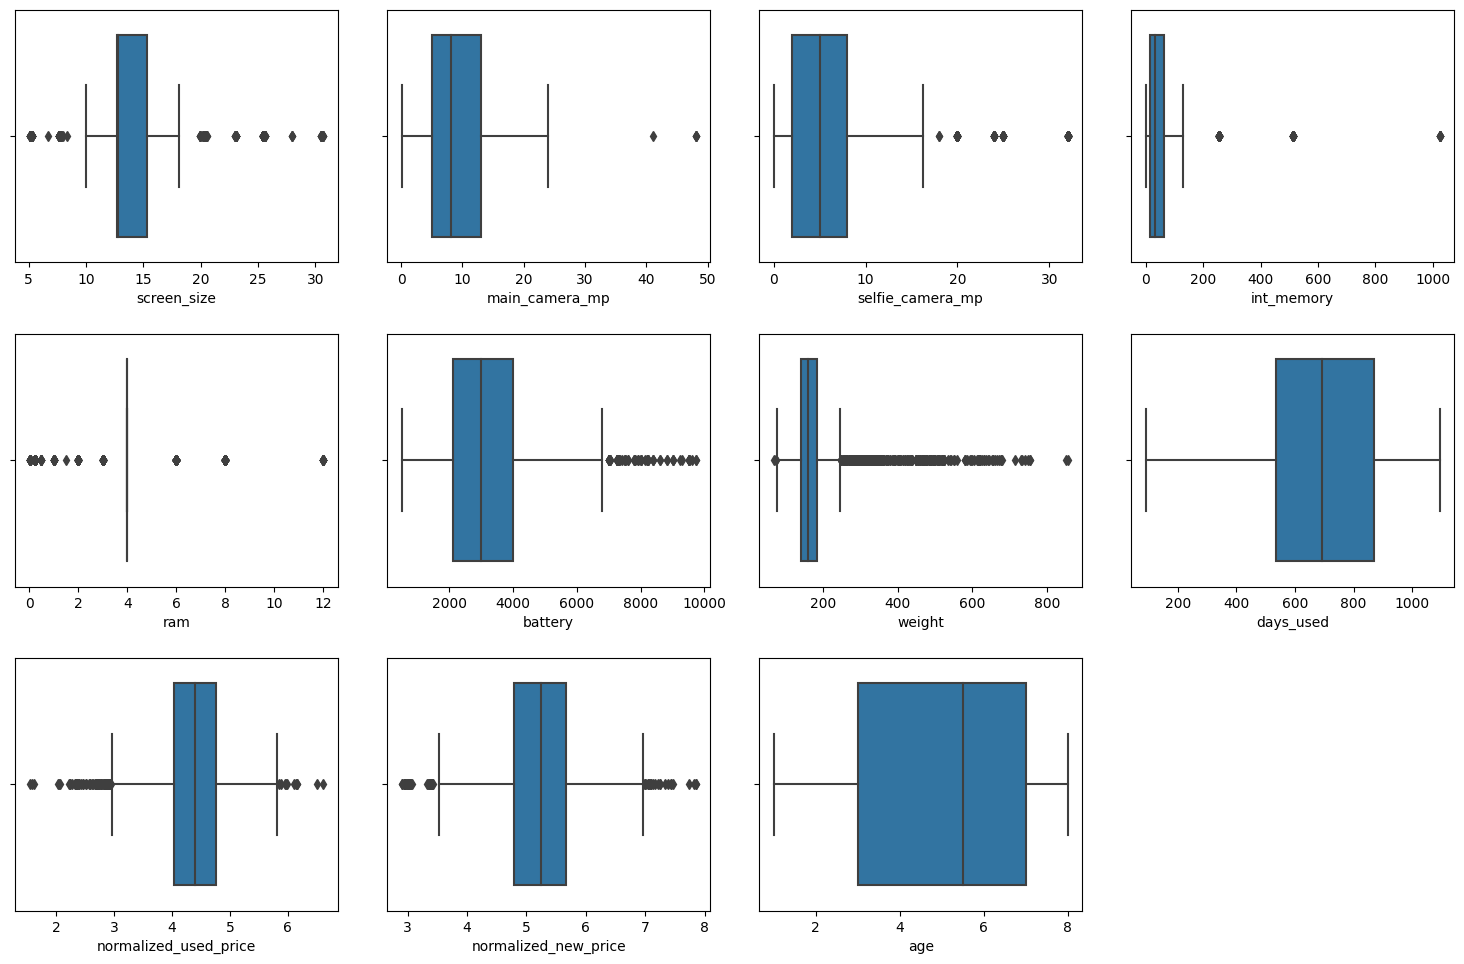

In [210]:

# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

##### Observations
1.  All variables except for age and days_used have outliers
2.  It is difficult to determine if these are genunie outliers due to lack of further information.  For example screen sizes around 5cm can be genuine outliers, however this cannot be certain until we have more information.
3.  further, as the phones and tablets are grouped together, some of the values may appear as outliers when they are not, e.g. weight, larger screen size tablets may be heavier

### Preparing Data for Modelling

- We want to predict the price of used phone/tablet i.e we want to predict the normalized_used-price
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [211]:
# defining X and y variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android      14.5000  yes   no         13.0000   
1      Honor  Android      17.3000  yes  yes         13.0000   
2      Honor  Android      16.6900  yes  yes         13.0000   
3      Honor  Android      25.5000  yes  yes         13.0000   
4      Honor  Android      15.3200  yes   no         13.0000   

   selfie_camera_mp  int_memory    ram   battery   weight  days_used  \
0            5.0000     64.0000 3.0000 3020.0000 146.0000        127   
1           16.0000    128.0000 8.0000 4300.0000 213.0000        325   
2            8.0000    128.0000 8.0000 4200.0000 213.0000        162   
3            8.0000     64.0000 6.0000 7250.0000 480.0000        345   
4            8.0000     64.0000 3.0000 5000.0000 185.0000        293   

   normalized_new_price  age  
0                4.7151    1  
1                5.5190    1  
2                5.8846    1  
3                5.6310    1  
4                4.9478    

In [212]:
# let's add the intercept to data
X = sm.add_constant(X)

We need to create dummy variables for the cateogrical variables:
- brand_name, os, 4g, 5g

In [213]:
# creating dummy variables for the categeorical variables: brand_name, os, 4g, 5g
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

const  screen_size  main_camera_mp  selfie_camera_mp  int_memory    ram  \
0 1.0000      14.5000         13.0000            5.0000     64.0000 3.0000   
1 1.0000      17.3000         13.0000           16.0000    128.0000 8.0000   
2 1.0000      16.6900         13.0000            8.0000    128.0000 8.0000   
3 1.0000      25.5000         13.0000            8.0000     64.0000 6.0000   
4 1.0000      15.3200         13.0000            8.0000     64.0000 3.0000   

    battery   weight  days_used  normalized_new_price  ...  brand_name_Spice  \
0 3020.0000 146.0000        127                4.7151  ...                 0   
1 4300.0000 213.0000        325                5.5190  ...                 0   
2 4200.0000 213.0000        162                5.8846  ...                 0   
3 7250.0000 480.0000        345                5.6310  ...                 0   
4 5000.0000 185.0000        293                4.9478  ...                 0   

   brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  \
0                0                0                  0               0   
1                0                0                  0               0   
2                0                0                  0               0   
3                0                0                  0               0   
4                0                0                  0               0   

   os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
0          0           0       0       1       0  
1          0           0       0       1       1  
2          0           0       0       1       1  
3          0           0       0       1       1  
4          0           0       0       1       0  

[5 rows x 49 columns]

In [214]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [215]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA

- It is a good idea to explore the data once again after manipulating it.
- For the 2nd EDA we will explore the bivariate/Multivariate analysis for age and the variables which were changed in the data pre-processing stage

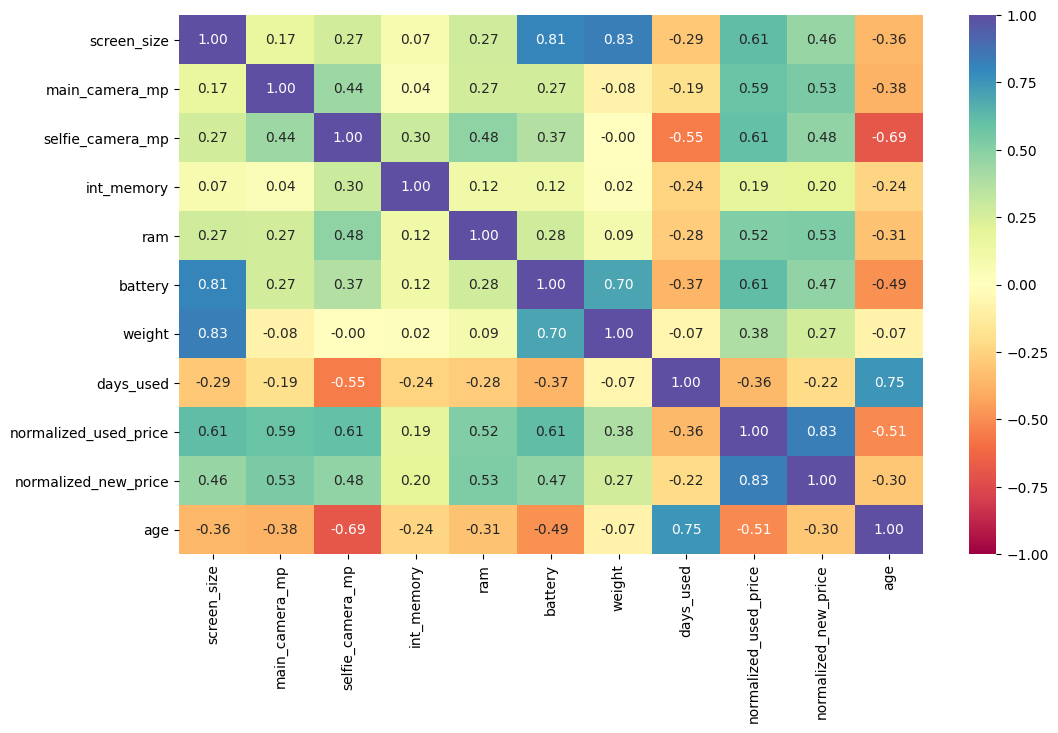

In [216]:
# Examine correaltions

# creating a list of numerical columns
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

# plotting heatmap

plt.figure(figsize=(12, 7))
sns.heatmap(
    df1[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

##### Observations
1.  The only changes to the heat map is the age vabiable being added and the release_year variable removed.  We will continus the EDA with only the age variable.
2.  Age has a negative correlation with screen_size, main_camera_mp, selfie_camera_mp, int_memory, battery, weight normalized_new_price and normalized_used_price.  Of these Age is highly negatively correlated to selfie_camera_mp and have a strong positive correlation to days_used

### age vs. screen_size

plt.figure(figsize=(12,8))
sns.lineplot(data=df1, x="age", y="screen_size", ci=False, color="red")
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

##### Observations
1.  Age have a negative correlations with screen_size.  The older the devices the smaller the screen size.  The newer the devices the larger the screen size

### age vs. main_camera_mp

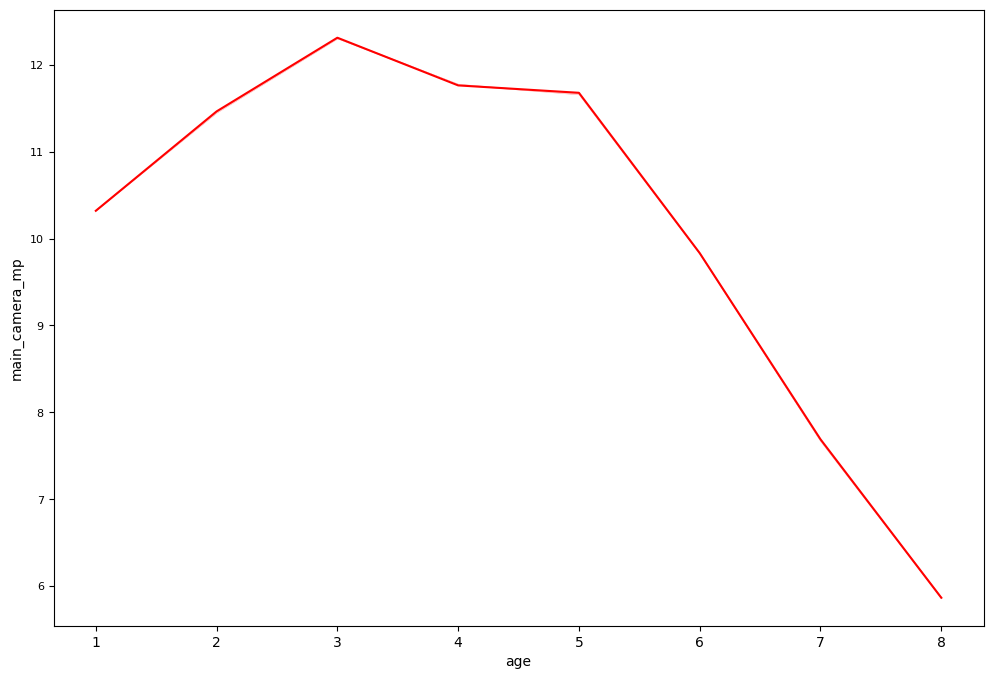

In [217]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df1, x="age", y="main_camera_mp", ci=False, color="red")
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

##### Observations
1.  As the age of the devices increases from 1 to 3 years old, the camera size also increases, however, after 3 years old the camera size decreases, at first with a shallow gradient until 5 years old then a steep gradient until 8 years old
2.  Main camera sizes decreases for devices after 3 years old

### age vs. _camera_mp

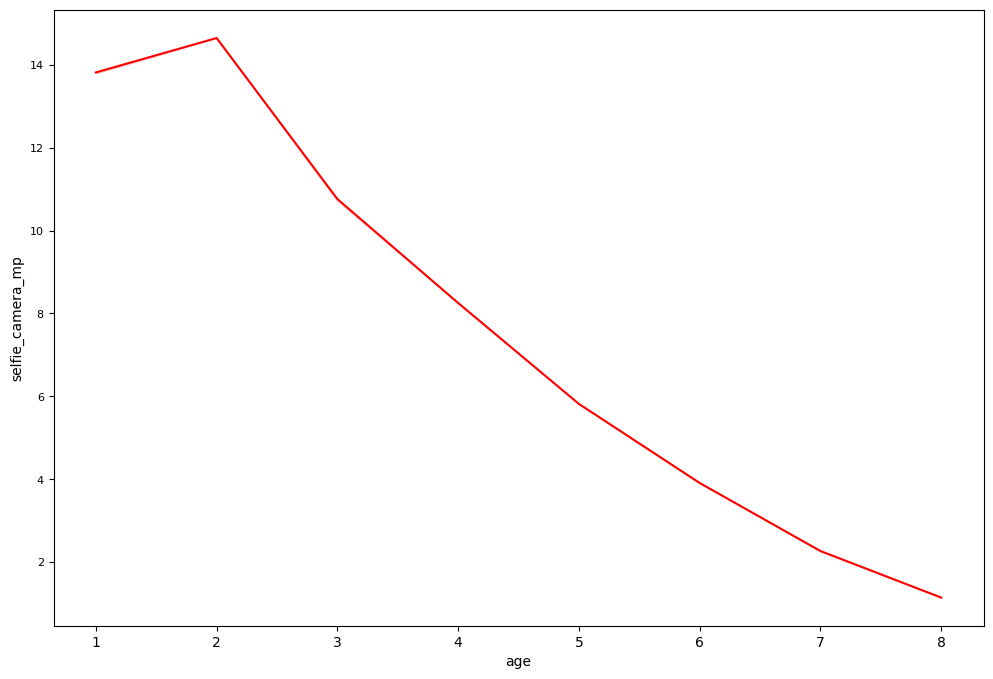

In [218]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df1, x="age", y="selfie_camera_mp", ci=False, color="red");
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

age vs. int_memory

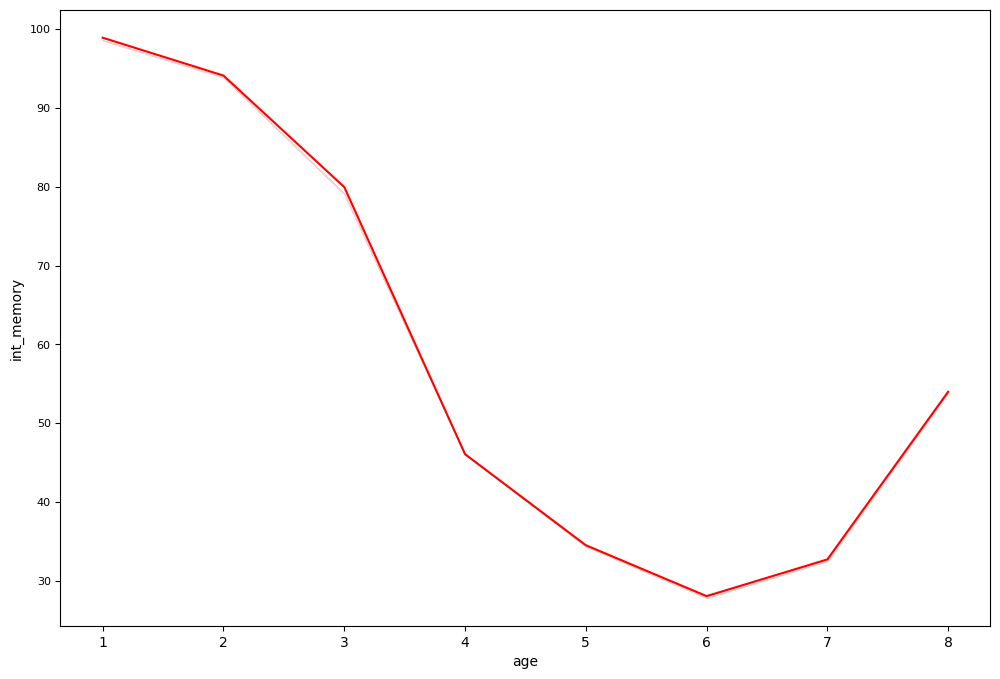

In [219]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df1, x="age", y="int_memory", ci=False, color="red");
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

##### Observations
1.  The internal memory sizes decreases as the devices get older until devices which are 6 years old, then the internal memory sizes starts to increase.  

age vs. ram

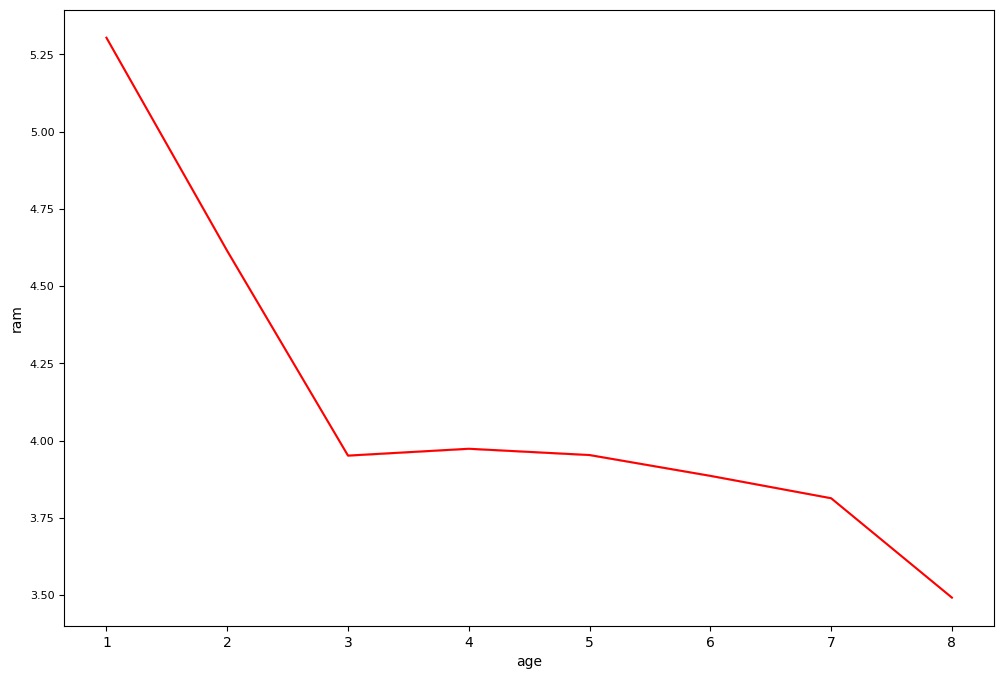

In [220]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df1, x="age", y="ram", ci=False, color="red");
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

##### Observations
1.  Ram sizes decreases rapidly between 1 to 3 year old devices, after 3 year old devices, ram decreses at a slower rate until 8 years old

### age vs. battery

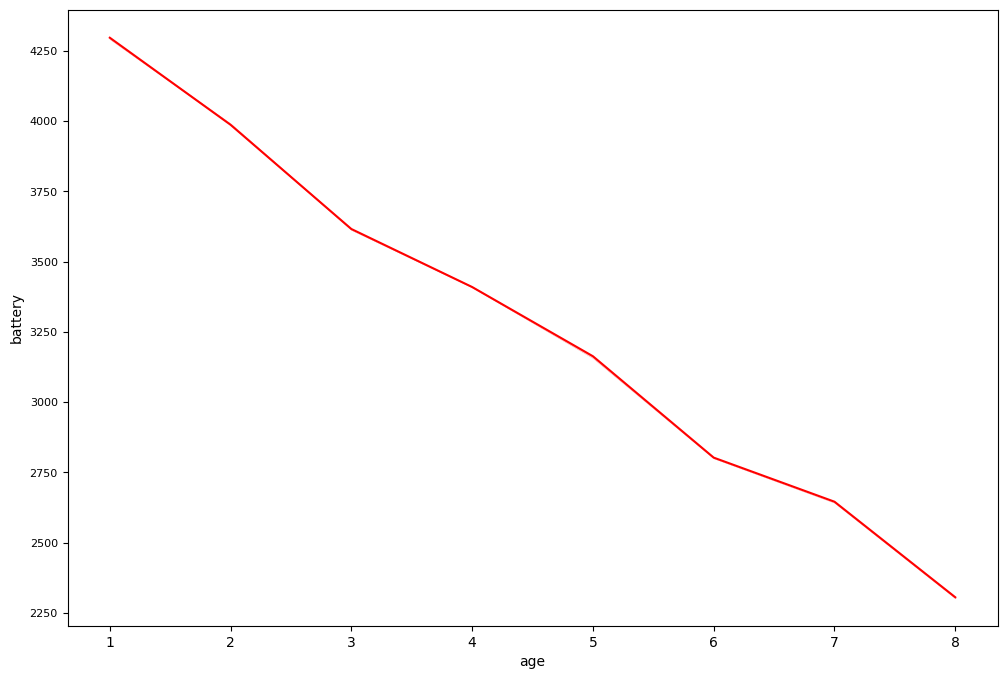

In [221]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df1, x="age", y="battery", ci=False, color="red");
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

##### Observatoins
1. Battery size decreases as the device gets older

### age vs. weight

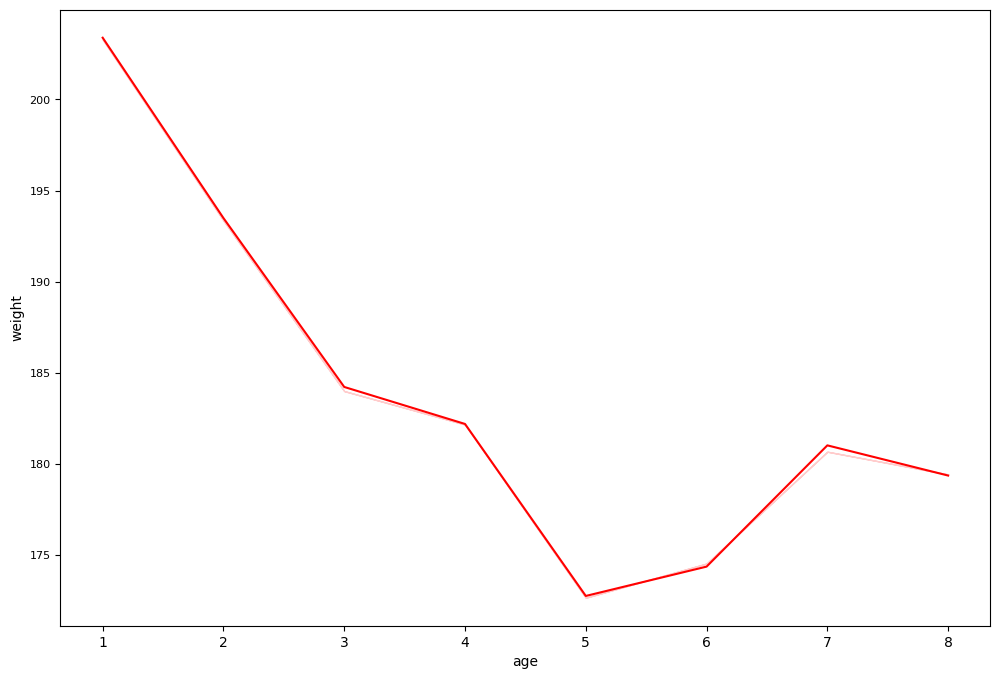

In [222]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df1, x="age", y="weight", ci=False, color="red");
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

##### Observations
1.  In general, the weight of the devices decreases as the devices gets older, however for devices from 5 to 7 years old the devices increase in weight.  After 7 years old the devices reduces weight again

### age vs. days_used

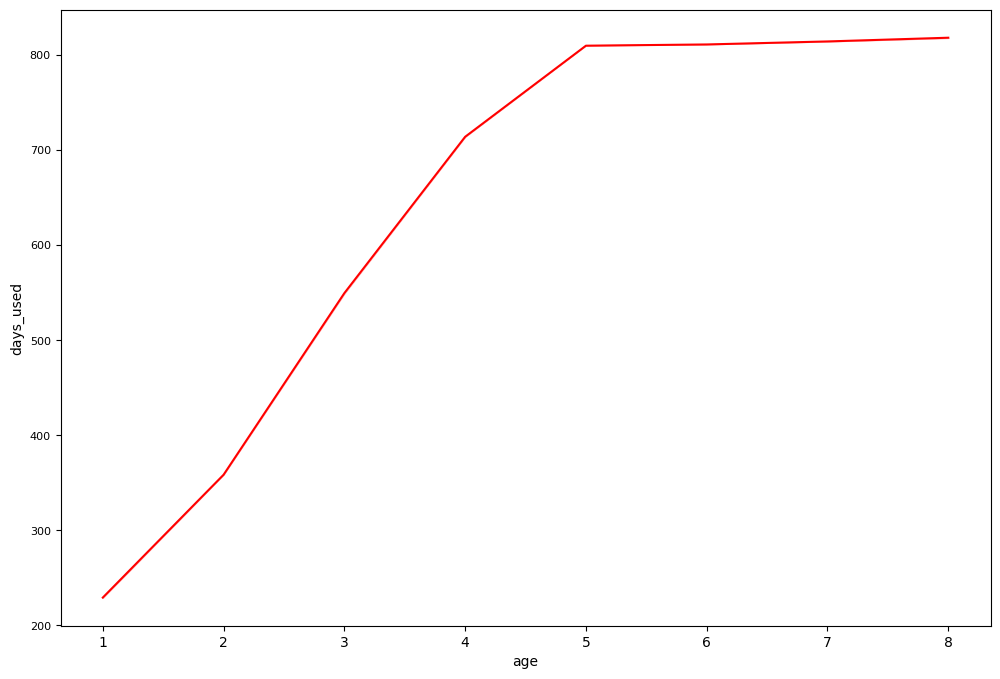

In [223]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df1, x="age", y="days_used", ci=False, color="red");
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

##### Observations
1.  The older the devices the hogher the number of days used

### age vs. normalized_used_price

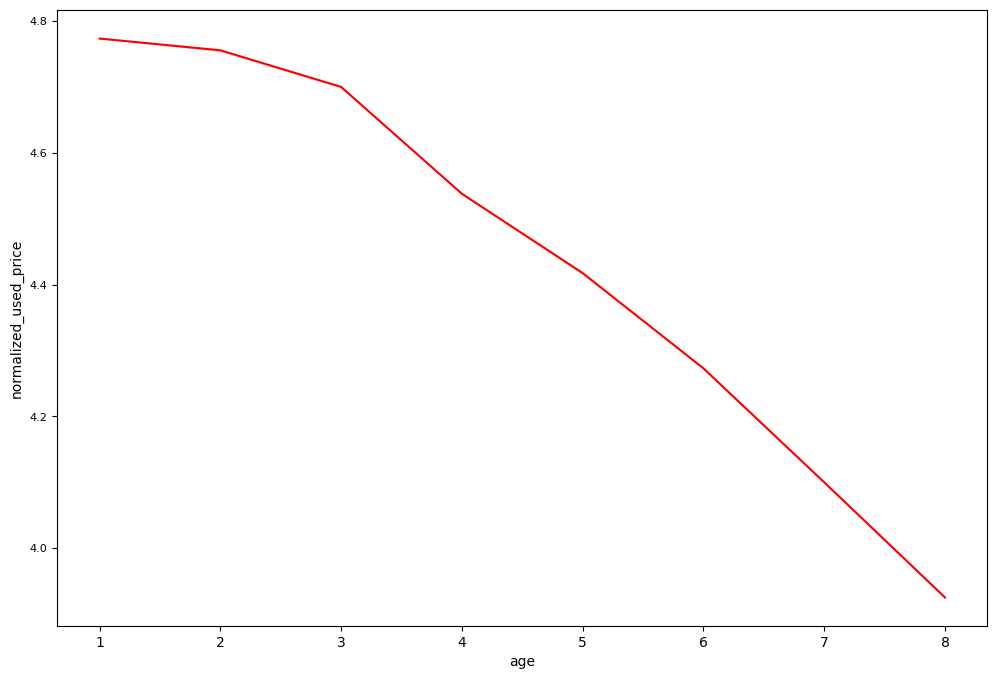

In [224]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df1, x="age", y="normalized_used_price", ci=False, color="red");
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

##### Observations
1.  The price of the devices decreses as the devices gets older

### age vs. normalized_new_price

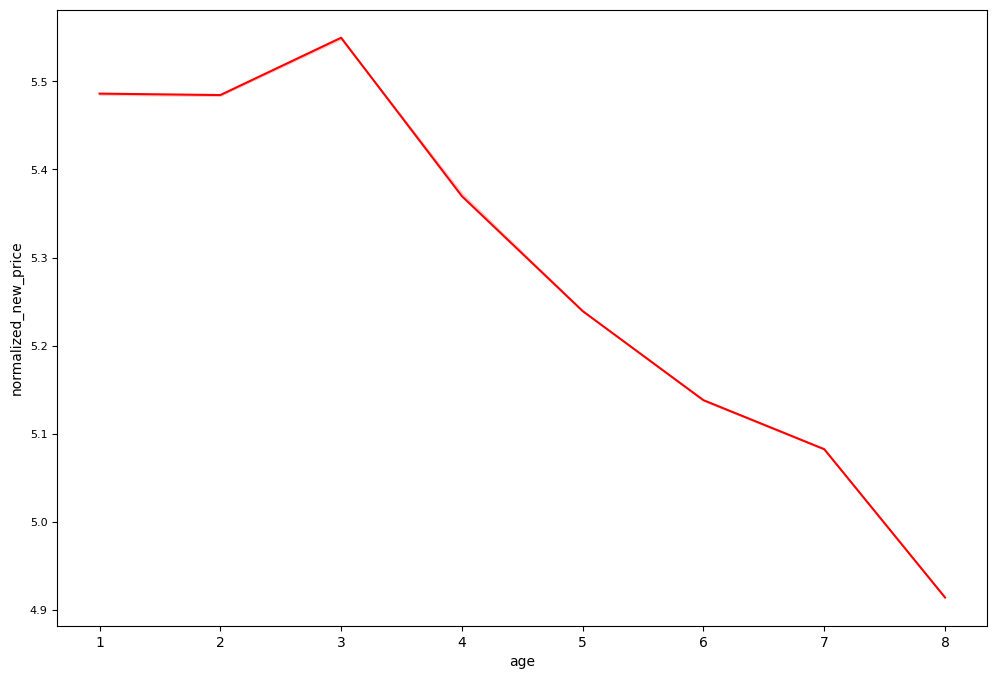

In [225]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df1, x="age", y="normalized_new_price", ci=False, color="red");
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

##### Oservations
1.  In general, the normalized_new_price deccreases as the devices gets older, however there is an increase in price for devices between 2-3 years old

## Model Building - Linear Regression

In [226]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.8
Date:                   Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                           09:29:55   Log-Likelihood:                 124.15
No. Observations:                   2417   AIC:                            -150.3
Df Residuals:                       2368   BIC:                             133.4
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Interpreting the Regression Results:

1. **R-squared** The R-squared value tells us that our model can explain 84.5% of the variance in the training set.

2. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.842**, which is good.


3. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **1.3158**


4. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, one example is the coefficient of `int_memory` is **0.0001**.

## Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [227]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [228]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



RMSE    MAE  R-squared  Adj. R-squared   MAPE
0 0.2299 0.1803     0.8449          0.8417 4.3262

In [229]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



RMSE    MAE  R-squared  Adj. R-squared   MAPE
0 0.2385 0.1849     0.8423          0.8345 4.5057

**Observations**

- The training $R^2$ is 0.84, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict the price of a used phone/tablet within a mean error of 0.18 on the test data

- MAPE of 4.51 on the test data means that we are able to predict within 4.51% of the used phone/tablet prices

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [230]:
# function to test for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [231]:
# checking VIF values for x-train dataset
checking_vif(x_train)

feature      VIF
0                   const 227.6786
1             screen_size   7.6771
2          main_camera_mp   2.2878
3        selfie_camera_mp   2.8107
4              int_memory   1.3641
5                     ram   2.2552
6                 battery   4.0817
7                  weight   6.3972
8               days_used   2.6600
9    normalized_new_price   3.1196
10                    age   4.8984
11     brand_name_Alcatel   3.4057
12       brand_name_Apple  13.0548
13        brand_name_Asus   3.3320
14  brand_name_BlackBerry   1.6322
15      brand_name_Celkon   1.7748
16     brand_name_Coolpad   1.4680
17      brand_name_Gionee   1.9512
18      brand_name_Google   1.3218
19         brand_name_HTC   3.4103
20       brand_name_Honor   3.3406
21      brand_name_Huawei   5.9839
22     brand_name_Infinix   1.2878
23     brand_name_Karbonn   1.5737
24          brand_name_LG   4.8496
25        brand_name_Lava   1.7113
26      brand_name_Lenovo   4.5588
27       brand_name_Meizu   2.1796
28    brand_name_Micromax   3.3635
29   brand_name_Microsoft   1.8696
30    brand_name_Motorola   3.2745
31       brand_name_Nokia   3.4731
32     brand_name_OnePlus   1.4370
33        brand_name_Oppo   3.9711
34      brand_name_Others   9.7109
35   brand_name_Panasonic   2.1057
36      brand_name_Realme   1.9467
37     brand_name_Samsung   7.5398
38        brand_name_Sony   2.9431
39       brand_name_Spice   1.6889
40        brand_name_Vivo   3.6513
41        brand_name_XOLO   2.1381
42      brand_name_Xiaomi   3.7197
43         brand_name_ZTE   3.7975
44              os_Others   1.8541
45             os_Windows   1.5953
46                 os_iOS  11.7808
47                 4g_yes   2.4684
48                 5g_yes   1.8110

##### Observations

* There are multiple columns with slightly high VIF values, indicating presence of moderate multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [232]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [233]:
col_list = [ "screen_size","weight" ]

res = treating_multicollinearity(x_train, y_train, col_list)
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0  screen_size                             0.8384                   0.2347
1       weight                             0.8381                   0.2349

**Both screen_size and weight have very little no changes to the Adj. R-Squared values.  We will start by dropping screen_size as the table above is sorted in ascending Adj. R-Square values**

In [234]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


feature      VIF
0                   const 202.6292
1          main_camera_mp   2.2845
2        selfie_camera_mp   2.8073
3              int_memory   1.3620
4                     ram   2.2552
5                 battery   3.8429
6                  weight   2.9938
7               days_used   2.6487
8    normalized_new_price   3.0781
9                     age   4.7297
10     brand_name_Alcatel   3.4055
11       brand_name_Apple  12.9977
12        brand_name_Asus   3.3267
13  brand_name_BlackBerry   1.6309
14      brand_name_Celkon   1.7746
15     brand_name_Coolpad   1.4677
16      brand_name_Gionee   1.9414
17      brand_name_Google   1.3193
18         brand_name_HTC   3.3999
19       brand_name_Honor   3.3403
20      brand_name_Huawei   5.9810
21     brand_name_Infinix   1.2872
22     brand_name_Karbonn   1.5735
23          brand_name_LG   4.8323
24        brand_name_Lava   1.7111
25      brand_name_Lenovo   4.5537
26       brand_name_Meizu   2.1764
27    brand_name_Micromax   3.3586
28   brand_name_Microsoft   1.8681
29    brand_name_Motorola   3.2623
30       brand_name_Nokia   3.4580
31     brand_name_OnePlus   1.4370
32        brand_name_Oppo   3.9653
33      brand_name_Others   9.6525
34   brand_name_Panasonic   2.1049
35      brand_name_Realme   1.9437
36     brand_name_Samsung   7.5234
37        brand_name_Sony   2.9373
38       brand_name_Spice   1.6833
39        brand_name_Vivo   3.6505
40        brand_name_XOLO   2.1378
41      brand_name_Xiaomi   3.7140
42         brand_name_ZTE   3.7889
43              os_Others   1.6199
44             os_Windows   1.5952
45                 os_iOS  11.6753
46                 4g_yes   2.4676
47                 5g_yes   1.8073

##### Observations

1. After dropping screen_size, the VIF value for weight dropped to below 5
2. We are finished with the multicollinearity in the dataset.
3. We will now rebuild the model with the updated predictors

In [235]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                           09:30:02   Log-Likelihood:                 98.289
No. Observations:                   2417   AIC:                            -100.6
Df Residuals:                       2369   BIC:                             177.4
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations**

- We can see that adj. R-squared has dropped from 0.842 to 0.838, while the R-Squared changed from 0.845 to 0.842 which shows that the dropped columns did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

### Dealing with high p-value variables

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

In [236]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'age', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [237]:
# building a new list for training and test datasets with the variables with p-values <0.05
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [238]:
#rebiliding the model after removing high p-values
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     897.2
Date:                   Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                           09:30:05   Log-Likelihood:                 82.411
No. Observations:                   2417   AIC:                            -134.8
Df Residuals:                       2402   BIC:                            -47.97
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [239]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



RMSE    MAE  R-squared  Adj. R-squared   MAPE
0 0.2339 0.1826     0.8395          0.8385 4.3904

In [240]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



RMSE    MAE  R-squared  Adj. R-squared   MAPE
0 0.2414 0.1866     0.8384          0.8360 4.5560

**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmod2* as the final model to move forward with
* Now adjusted R-squared is 0.836, i.e., our model is able to explain ~83% of the variance
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was 0.842
    * The difference between the two Adj. R-Squared is very small, 0.006. This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [241]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
3026         4.0875         3.8677     0.2198
1525         4.4484         4.6020    -0.1536
1128         4.3154         4.2874     0.0279
3003         4.2821         4.1948     0.0872
2907         4.4564         4.4897    -0.0332

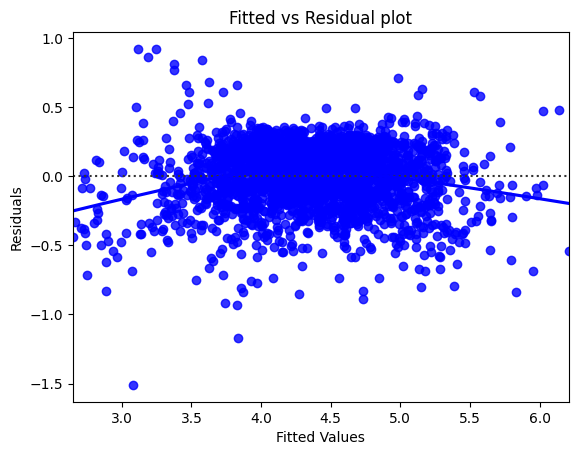

In [242]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="blue", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

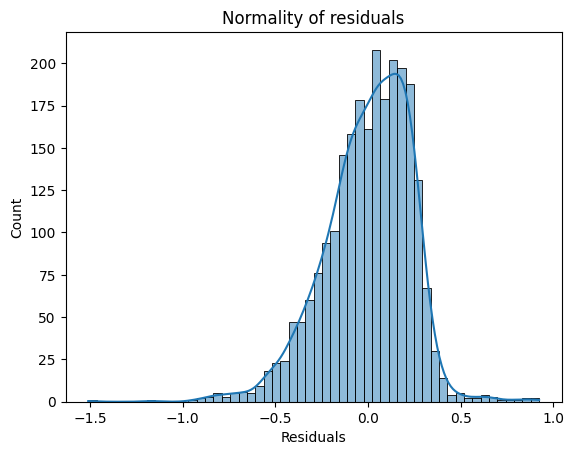

In [243]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

** The histogram plot does have a bell curve, however there is slight skewness to the left.  Let us do a Q-Q plot

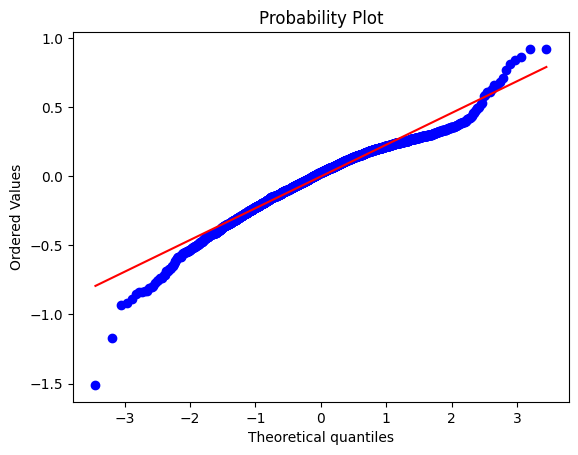

In [244]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The Shapiro-Wilk test can also be used for checking the normality. The null and alternate hypotheses of the test are as follows:

* Null hypothesis - Data is normally distributed.
* Alternate hypothesis - Data is not normally distributed.
  

In [245]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9677574634552002, pvalue=7.333805701923077e-23)

##### Observations
- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [246]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0088452876616931), ('p-value', 0.43955652917445925)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [247]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

Actual  Predicted
1995  4.5667     4.3859
2341  3.6961     4.0043
1913  3.5921     3.6441
688   4.3065     4.1036
650   4.5221     5.1131
2291  4.2593     4.3987
40    4.9977     5.4604
1884  3.8754     4.0531
2538  4.2066     4.0361
45    5.3805     5.2271

- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

Let's recreate the final model and print it's summary to gain insights.

In [248]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [249]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     897.2
Date:                   Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                           09:30:16   Log-Likelihood:                 82.411
No. Observations:                   2417   AIC:                            -134.8
Df Residuals:                       2402   BIC:                            -47.97
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [250]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



RMSE    MAE  R-squared  Adj. R-squared   MAPE
0 0.2339 0.1826     0.8395          0.8385 4.3904

In [251]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



RMSE    MAE  R-squared  Adj. R-squared   MAPE
0 0.2414 0.1866     0.8384          0.8360 4.5560

* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.6% of the normalized_used_price

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

In [252]:
# Let us write the equation of linear regression
Equation = "normalized_used_price ="
print(Equation, end=" ")
for i in range(len(x_train_final.columns)):
    if i == 0:
        print(olsmodel_final.params[i], "+", end=" ")
    elif i != len(x_train_final.columns) - 1:
        print(
            olsmodel_final.params[i],
            "* (",
            x_train_final.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmodel_final.params[i], "* (", x_train_final.columns[i], ")")

normalized_used_price = 1.4935128990518398 + 0.02108285262565844 * ( main_camera_mp ) +  0.013786421769680663 * ( selfie_camera_mp ) +  0.021500833371770882 * ( ram ) +  0.001662041721565286 * ( weight ) +  0.4415505586596362 * ( normalized_new_price ) +  -0.028834253622064394 * ( age ) +  0.11561021616869673 * ( brand_name_Karbonn ) +  -0.03725641598719961 * ( brand_name_Samsung ) +  -0.06733382846073212 * ( brand_name_Sony ) +  0.08058936039639644 * ( brand_name_Xiaomi ) +  -0.12651489865224957 * ( os_Others ) +  -0.08948268428569034 * ( os_iOS ) +  0.0499903774577514 * ( 4g_yes ) +  -0.068240217727109 * ( 5g_yes )


## Actionable Insights and Recommendations

The main objective of ReCell is to develop a pricing strategy for used phones and tablets to sell on the used devices market.  A detailed univariate, bivariate and multivariate analysis was conducted, probelms in the dataset was corrected and the model was developed using the odinary least squares regression method with normalized_used_price as the target variable.  The assumtions of the ordinary least squares method was verified before the final model was produced
### The final model
>1. The model is able to explain ~84% of the variation in the data and within 4.6% of the normalized_used_price on the test data
>2. The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting
>3. This indicated that the model is good for prediction as well as for inference. 

### Analysis and Interpretating Data
> 1. Significance of the predictors:  The predictors in the final model were: main_camera_mp, selfie_camera_mp, ram, weight, normalized_new_price, age, brand_name_karbonn, brand_name_Samsung, brand_name_Sony, brand_name_Xiaomi, os_Others, os_iOS, 4g_yes, 5g_yes
> 2. If the main_camera_mp increases by one megapixel, then the normalized_used_price increases by 0.0211 euros, with all other variables held constant
> 3. If the selfie_camera_mp increases by one megapixel, then the normalized_used_price increases by 0.0138 euros, with all other variables held constant
> 4. If the ram increases by one GB, then the normalized_used_price increases by 0.0215 euros, with all other variables held constant
> 5. If the weight increases by one gram, then the normalized_used_price increases by 0.0017 euros, with all other variables held constant
> 6. If the normalized_new_price increases by one euros, then the normalized_used_price increases by 0.4416 euros, with all other variables held constant
> 7. If the age increases by one year, then the normalized_used_price decreases by 0.0288 euros, with all other variables held constant
> 8. The normalized_used_price for brand_name for the Karbonn brand will be 0.1156 euros more than for the brand Acer
> 9. The normalized_used_price for brand_name for the Samsung brand will be 0.0373 euros less than for the brand Acer
> 10. The normalized_used_price for brand_name for the Sony brand will be 0.0673 euros less than for the brand Acer
> 11. The normalized_used_price for brand_name for the Xiaomi brand will be 0.0806 euros more than for the brand Acer
> 12. The normalized_used_price for the operating system Others will be 0.0.1265 euros less than for  Android
> 13. The normalized_used_price for the operating system iOS will be 0.0.0895 euros less than for Android
> 14. The normalized_used_price for the phones with 4g will be 0.0.0500 euros more than for phones without 4g
> 15. The normalized_used_price for the phones with 5g will be 0.0.0682 euros less than for phones without 5g

#### Recommendation

>1.  As tablets and phones have very different features, it will be better to divde the dataset into tablets and phones and to create a regression model for eachces.
>2. There are a lanumberount of devices with a weight ranging 100 to 250g.  When looking at the normalized used prices there appears to be 2 groups in the pricing, those whose weight is less than 250g and greater 250g.  This can be investigated further
>3. Only Android devices had 5g, this could be why the final model indicated that the presence of 5g decreased the price of the devices.  It would be advisable to include more 5g devices or to do analysis for Android devices only.
>4. Androind devices makes up a large portion of the operating systems, this can influence the final model.  It may be better to treat the Android devices as a seperate dataset and create a seperate model for predicitng the prices of these devices
>5. More information would help in better addressing the outliers in the dataset.
>4. Implement a feature based pricing strategy which focuses on those predictors which increases the used price.  For example devices with a higher normalized new price, or devices with 4g.
>5. ReCell can focus on the brands which increases the normalized used prices, in this model this would be Karbonn and Xiaomi
>6. ReCell can implement customer segmentation to its clients by offering/advertising lower budget devices to markets with financial constraints and premium devices to customers who can afford higher prices
>7. As the age of the phone decreases the used price, ReCell can consider to have warranty for the older devices to encourse/boost sales of these dev.     





___